In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
QB = pd.read_csv('QB/QB.csv')
QB.describe()

,Rank,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,288.430052,8.746114,17.630397,28.300518,56.411917,199.186528,6.402073,1.212435,0.687392,79.565803,2.668394,11.571675,3.210363,0.108808,14.327288,14.327392
std,165.257343,4.706926,8.905978,13.579429,21.061035,106.898343,3.124038,1.142805,0.902148,35.882400,2.402540,16.516416,4.836814,0.338287,9.287007,9.286509
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-5.000000,0.000000,-2.200000,-2.160000
25%,145.500000,4.000000,14.000000,23.000000,52.800000,139.500000,5.100000,0.000000,0.000000,59.950000,1.000000,0.000000,0.000000,0.000000,7.800000,7.800000
50%,290.000000,9.000000,20.000000,31.000000,60.000000,220.000000,6.700000,1.000000,0.000000,84.140000,2.000000,5.000000,2.000000,0.000000,14.500000,14.520000
75%,434.500000,13.000000,24.000000,37.000000,68.150000,270.500000,7.900000,2.000000,1.000000,105.170000,4.000000,19.000000,5.400000,0.000000,20.050000,20.050000
max,579.000000,16.000000,44.000000,66.000000,100.000000,506.000000,35.000000,5.000000,5.000000,150.690000,14.000000,95.000000,70.000000,2.000000,40.600000,40.640000


In [3]:
QB = QB.set_index(['Name', 'Team'])
QB.head()

,,Rank,Position,Week,Opponent,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,
Alex Smith,KC,1,QB,13,NYJ,19,33,57.6,366,11.1,4,0,135.86,1,70,70.0,0,40.6,40.64
Tom Brady,NE,2,QB,3,HOU,25,35,71.4,378,10.8,5,0,146.19,1,6,6.0,0,39.7,39.72
Russell Wilson,SEA,3,QB,8,HOU,26,41,63.4,452,11.0,4,1,123.22,4,30,7.5,0,39.1,39.08
Deshaun Watson,HOU,4,QB,8,SEA,19,30,63.3,402,13.4,4,3,106.94,8,67,8.4,0,38.8,38.78
Cam Newton,CAR,5,QB,4,NE,22,29,75.9,316,10.9,3,1,130.82,8,44,5.5,1,37.0,37.04


In [4]:
QBscore = pd.DataFrame()
QBscore = QB.query('Week == 2')
QB2 = QB[QB.Week < 2]
QB2 = QB2.groupby(['Name', 'Team']).mean()
QB2 = QB2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw2 = pd.DataFrame()
QBw2['Opponent'] = QBscore.Opponent
QBw2['Score'] = QBscore.FantasyPointsDraftKings
QBw2['Week'] = QBscore.Week
QBw2 = QBw2.join(QB2)
QBw2 = QBw2.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 3')
QB3 = QB[QB.Week < 3]
QB3 = QB3.groupby(['Name', 'Team']).mean()
QB3 = QB3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw3 = pd.DataFrame()
QBw3['Opponent'] = QBscore.Opponent
QBw3['Score'] = QBscore.FantasyPointsDraftKings
QBw3['Week'] = QBscore.Week
QBw3 = QBw3.join(QB3)
QBw3 = QBw3.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 4')
QB4 = QB[QB.Week < 4]
QB4 = QB4.groupby(['Name', 'Team']).mean()
QB4 = QB4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw4 = pd.DataFrame()
QBw4['Opponent'] = QBscore.Opponent
QBw4['Score'] = QBscore.FantasyPointsDraftKings
QBw4['Week'] = QBscore.Week
QBw4 = QBw4.join(QB4)
QBw4 = QBw4.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 5')
QB5 = QB[QB.Week < 5]
QB5 = QB5.groupby(['Name', 'Team']).mean()
QB5 = QB5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw5 = pd.DataFrame()
QBw5['Opponent'] = QBscore.Opponent
QBw5['Score'] = QBscore.FantasyPointsDraftKings
QBw5['Week'] = QBscore.Week
QBw5 = QBw5.join(QB5)
QBw5 = QBw5.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 6')
QB6 = QB[QB.Week < 6]
QB6 = QB6.groupby(['Name', 'Team']).mean()
QB6 = QB6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw6 = pd.DataFrame()
QBw6['Opponent'] = QBscore.Opponent
QBw6['Score'] = QBscore.FantasyPointsDraftKings
QBw6['Week'] = QBscore.Week
QBw6 = QBw6.join(QB6)
QBw6 = QBw6.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 7')
QB7 = QB[QB.Week < 7]
QB7 = QB7.groupby(['Name', 'Team']).mean()
QB7 = QB7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw7 = pd.DataFrame()
QBw7['Opponent'] = QBscore.Opponent
QBw7['Score'] = QBscore.FantasyPointsDraftKings
QBw7['Week'] = QBscore.Week
QBw7 = QBw7.join(QB7)
QBw7 = QBw7.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 8')
QB8 = QB[QB.Week < 8]
QB8 = QB8.groupby(['Name', 'Team']).mean()
QB8 = QB8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw8 = pd.DataFrame()
QBw8['Opponent'] = QBscore.Opponent
QBw8['Score'] = QBscore.FantasyPointsDraftKings
QBw8['Week'] = QBscore.Week
QBw8 = QBw8.join(QB8)
QBw8 = QBw8.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 9')
QB9 = QB[QB.Week < 9]
QB9 = QB9.groupby(['Name', 'Team']).mean()
QB9 = QB9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw9 = pd.DataFrame()
QBw9['Opponent'] = QBscore.Opponent
QBw9['Score'] = QBscore.FantasyPointsDraftKings
QBw9['Week'] = QBscore.Week
QBw9 = QBw9.join(QB9)
QBw9 = QBw9.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 10')
QB10 = QB[QB.Week < 10]
QB10 = QB10.groupby(['Name', 'Team']).mean()
QB10 = QB10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw10 = pd.DataFrame()
QBw10['Opponent'] = QBscore.Opponent
QBw10['Score'] = QBscore.FantasyPointsDraftKings
QBw10['Week'] = QBscore.Week
QBw10 = QBw10.join(QB10)
QBw10 = QBw10.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 11')
QB11 = QB[QB.Week < 11]
QB11 = QB11.groupby(['Name', 'Team']).mean()
QB11 = QB11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw11 = pd.DataFrame()
QBw11['Opponent'] = QBscore.Opponent
QBw11['Score'] = QBscore.FantasyPointsDraftKings
QBw11['Week'] = QBscore.Week
QBw11 = QBw11.join(QB11)
QBw11 = QBw11.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 12')
QB12 = QB[QB.Week < 12]
QB12 = QB12.groupby(['Name', 'Team']).mean()
QB12 = QB12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw12 = pd.DataFrame()
QBw12['Opponent'] = QBscore.Opponent
QBw12['Score'] = QBscore.FantasyPointsDraftKings
QBw12['Week'] = QBscore.Week
QBw12 = QBw12.join(QB12)
QBw12 = QBw12.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 13')
QB13 = QB[QB.Week < 13]
QB13 = QB13.groupby(['Name', 'Team']).mean()
QB13 = QB13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw13 = pd.DataFrame()
QBw13['Opponent'] = QBscore.Opponent
QBw13['Score'] = QBscore.FantasyPointsDraftKings
QBw13['Week'] = QBscore.Week
QBw13 = QBw13.join(QB13)
QBw13 = QBw13.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 14')
QB14 = QB[QB.Week < 14]
QB14 = QB14.groupby(['Name', 'Team']).mean()
QB14 = QB14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw14 = pd.DataFrame()
QBw14['Opponent'] = QBscore.Opponent
QBw14['Score'] = QBscore.FantasyPointsDraftKings
QBw14['Week'] = QBscore.Week
QBw14 = QBw14.join(QB14)
QBw14 = QBw14.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 15')
QB15 = QB[QB.Week < 15]
QB15 = QB15.groupby(['Name', 'Team']).mean()
QB15 = QB15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw15 = pd.DataFrame()
QBw15['Opponent'] = QBscore.Opponent
QBw15['Score'] = QBscore.FantasyPointsDraftKings
QBw15['Week'] = QBscore.Week
QBw15 = QBw15.join(QB15)
QBw15 = QBw15.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 16')
QB16 = QB[QB.Week < 16]
QB16 = QB16.groupby(['Name', 'Team']).mean()
QB16 = QB16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw16 = pd.DataFrame()
QBw16['Opponent'] = QBscore.Opponent
QBw16['Score'] = QBscore.FantasyPointsDraftKings
QBw16['Week'] = QBscore.Week
QBw16 = QBw16.join(QB16)
QBw16 = QBw16.reset_index()

In [5]:
QBws = QBw2.append(QBw3, ignore_index=True, sort=False).append(QBw4, ignore_index=True, sort=False)\
.append(QBw5, ignore_index=True, sort=False).append(QBw6, ignore_index=True, sort=False)\
.append(QBw7, ignore_index=True, sort=False).append(QBw8, ignore_index=True, sort=False)\
.append(QBw9, ignore_index=True, sort=False).append(QBw10, ignore_index=True, sort=False)\
.append(QBw11, ignore_index=True, sort=False)\
.append(QBw12, ignore_index=True, sort=False).append(QBw13, ignore_index=True, sort=False)\
.append(QBw14, ignore_index=True, sort=False).append(QBw15, ignore_index=True, sort=False)\
.append(QBw16, ignore_index=True, sort=False)

In [6]:
QBws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,544.000000,544.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,14.377610,9.244485,17.785862,28.296202,57.932355,200.380683,6.613391,1.202545,0.664599,81.610534,2.550383,10.808312,3.124533,0.108104,14.285127
std,9.315927,4.412122,7.374270,11.057545,17.565306,85.893584,2.401224,0.725596,0.494569,27.582170,1.830965,11.274091,2.783370,0.181073,6.889137
min,-2.160000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-5.000000,0.000000,-2.200000
25%,7.975000,5.000000,16.166667,27.250000,58.540000,171.000000,5.991667,0.700000,0.333333,75.157143,1.125000,1.153846,0.709091,0.000000,11.000000
50%,14.580000,10.000000,20.000000,31.714286,62.688889,221.555556,7.150000,1.285714,0.666667,88.086000,2.000000,7.285714,3.085714,0.000000,15.628571
75%,20.240000,13.000000,22.500000,35.000000,66.285714,261.500000,7.811111,1.692308,1.000000,98.563750,3.642857,19.363636,4.900000,0.166667,18.850000
max,40.640000,16.000000,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,20.000000,1.000000,34.000000


In [7]:
QBws = QBws.dropna().drop_duplicates()
QBws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,15.218218,9.340594,17.785862,28.296202,57.932355,200.380683,6.613391,1.202545,0.664599,81.610534,2.550383,10.808312,3.124533,0.108104,14.285127
std,9.008071,4.403601,7.374270,11.057545,17.565306,85.893584,2.401224,0.725596,0.494569,27.582170,1.830965,11.274091,2.783370,0.181073,6.889137
min,-1.960000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-5.000000,0.000000,-2.200000
25%,9.280000,5.000000,16.166667,27.250000,58.540000,171.000000,5.991667,0.700000,0.333333,75.157143,1.125000,1.153846,0.709091,0.000000,11.000000
50%,15.280000,10.000000,20.000000,31.714286,62.688889,221.555556,7.150000,1.285714,0.666667,88.086000,2.000000,7.285714,3.085714,0.000000,15.628571
75%,20.600000,13.000000,22.500000,35.000000,66.285714,261.500000,7.811111,1.692308,1.000000,98.563750,3.642857,19.363636,4.900000,0.166667,18.850000
max,40.640000,16.000000,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,20.000000,1.000000,34.000000


In [8]:
QBavg = pd.DataFrame()

QBavg['Name'] = QBws['Name']
QBavg['Team'] = QBws['Team']
QBavg['Week'] = QBws['Week']
QBavg['Opponent'] = QBws['Opponent']
QBavg['CompletionsGame'] = QBws['PassingCompletions']
QBavg['AttemptsGame'] = QBws['PassingAttempts']
QBavg['PassingCompletionPercentage'] = QBws['PassingCompletionPercentage']
QBavg['YardsGame'] = QBws['PassingYards']
QBavg['PassingYardsPerAttempt'] = QBws['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QBws['PassingTouchdowns']
QBavg['InterceptionsGame'] = QBws['PassingInterceptions']
QBavg['PassingRating'] = QBws['PassingRating']
QBavg['RushingAttemptsGame'] = QBws['RushingAttempts']
QBavg['RushingYardsGame'] = QBws['RushingYards']
QBavg['RushingYardsPerAttempt'] = QBws['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QBws['RushingTouchdowns']
QBavg['PointsGame'] = QBws['FantasyPointsPerGameDraftKings']
QBavg['Score'] = QBws['Score']

In [9]:
QBavg.describe()

,Week,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame,Score
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,9.340594,17.785862,28.296202,57.932355,200.380683,6.613391,1.202545,0.664599,81.610534,2.550383,10.808312,3.124533,0.108104,14.285127,15.218218
std,4.403601,7.374270,11.057545,17.565306,85.893584,2.401224,0.725596,0.494569,27.582170,1.830965,11.274091,2.783370,0.181073,6.889137,9.008071
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-5.000000,0.000000,-2.200000,-1.960000
25%,5.000000,16.166667,27.250000,58.540000,171.000000,5.991667,0.700000,0.333333,75.157143,1.125000,1.153846,0.709091,0.000000,11.000000,9.280000
50%,10.000000,20.000000,31.714286,62.688889,221.555556,7.150000,1.285714,0.666667,88.086000,2.000000,7.285714,3.085714,0.000000,15.628571,15.280000
75%,13.000000,22.500000,35.000000,66.285714,261.500000,7.811111,1.692308,1.000000,98.563750,3.642857,19.363636,4.900000,0.166667,18.850000,20.600000
max,16.000000,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,20.000000,1.000000,34.000000,40.640000


In [10]:
QBRZ = pd.read_csv('QB/QBRZ.csv')
QBRZ.head()

,Rank,Name,Team,Position,Week,Opponent,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Deshaun Watson,HOU,QB,4,TEN,4,6,66.7,42,7.0,4,1,86.81,2,5,2.5,1,23.2,23.18
1,2,Dak Prescott,DAL,QB,5,GB,4,6,66.7,23,3.8,3,0,113.19,1,11,11.0,1,20.0,20.02
2,3,Trevor Siemian,DEN,QB,2,DAL,6,8,75.0,47,5.9,4,0,128.65,1,6,6.0,0,18.5,18.48
3,4,Carson Wentz,PHI,QB,14,LAR,6,10,60.0,49,4.9,4,0,112.08,1,5,5.0,0,18.5,18.46
4,5,Nick Foles,PHI,QB,15,NYG,9,12,75.0,56,4.7,4,0,123.61,0,0,0.0,0,18.2,18.24


In [11]:
QBRZ.describe()

,Rank,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,274.385147,8.746114,1.901554,3.582038,44.546114,12.749568,3.109326,0.830743,0.077720,71.884439,0.490501,1.440415,1.114162,0.103627,4.589119,4.589085
std,150.787122,4.706926,1.742700,2.911870,35.027319,12.963396,3.275412,0.944308,0.274343,49.525970,0.840886,3.744129,2.818489,0.326940,4.779404,4.778955
min,1.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,-1.500000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-1.800000,-1.800000
25%,145.500000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,290.000000,9.000000,2.000000,3.000000,50.000000,10.000000,2.700000,1.000000,0.000000,81.250000,0.000000,0.000000,0.000000,0.000000,4.400000,4.360000
75%,414.000000,13.000000,3.000000,6.000000,68.350000,21.000000,4.800000,1.000000,0.000000,114.840000,1.000000,1.000000,0.500000,0.000000,8.100000,8.090000
max,579.000000,16.000000,9.000000,13.000000,100.000000,70.000000,20.000000,4.000000,2.000000,158.330000,7.000000,27.000000,18.000000,2.000000,23.200000,23.180000


In [12]:
QBRZ = QBRZ.set_index(['Name', 'Team'])
QBRZ.head()

,,Rank,Position,Week,Opponent,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,
Deshaun Watson,HOU,1,QB,4,TEN,4,6,66.7,42,7.0,4,1,86.81,2,5,2.5,1,23.2,23.18
Dak Prescott,DAL,2,QB,5,GB,4,6,66.7,23,3.8,3,0,113.19,1,11,11.0,1,20.0,20.02
Trevor Siemian,DEN,3,QB,2,DAL,6,8,75.0,47,5.9,4,0,128.65,1,6,6.0,0,18.5,18.48
Carson Wentz,PHI,4,QB,14,LAR,6,10,60.0,49,4.9,4,0,112.08,1,5,5.0,0,18.5,18.46
Nick Foles,PHI,5,QB,15,NYG,9,12,75.0,56,4.7,4,0,123.61,0,0,0.0,0,18.2,18.24


In [13]:
QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 2')
QBRZ2 = QBRZ[QBRZ.Week < 2]
QBRZ2 = QBRZ2.groupby(['Name', 'Team']).mean()
QBRZ2 = QBRZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw2 = pd.DataFrame()
QBRZw2['Opponent'] = QBRZscore.Opponent
QBRZw2['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw2['Week'] = QBRZscore.Week
QBRZw2 = QBRZw2.join(QBRZ2)
QBRZw2 = QBRZw2.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 3')
QBRZ3 = QBRZ[QBRZ.Week < 3]
QBRZ3 = QBRZ3.groupby(['Name', 'Team']).mean()
QBRZ3 = QBRZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw3 = pd.DataFrame()
QBRZw3['Opponent'] = QBRZscore.Opponent
QBRZw3['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw3['Week'] = QBRZscore.Week
QBRZw3 = QBRZw3.join(QBRZ3)
QBRZw3 = QBRZw3.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 4')
QBRZ4 = QBRZ[QBRZ.Week < 4]
QBRZ4 = QBRZ4.groupby(['Name', 'Team']).mean()
QBRZ4 = QBRZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw4 = pd.DataFrame()
QBRZw4['Opponent'] = QBRZscore.Opponent
QBRZw4['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw4['Week'] = QBRZscore.Week
QBRZw4 = QBRZw4.join(QBRZ4)
QBRZw4 = QBRZw4.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 5')
QBRZ5 = QBRZ[QBRZ.Week < 5]
QBRZ5 = QBRZ5.groupby(['Name', 'Team']).mean()
QBRZ5 = QBRZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw5 = pd.DataFrame()
QBRZw5['Opponent'] = QBRZscore.Opponent
QBRZw5['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw5['Week'] = QBRZscore.Week
QBRZw5 = QBRZw5.join(QBRZ5)
QBRZw5 = QBRZw5.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 6')
QBRZ6 = QBRZ[QBRZ.Week < 6]
QBRZ6 = QBRZ6.groupby(['Name', 'Team']).mean()
QBRZ6 = QBRZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw6 = pd.DataFrame()
QBRZw6['Opponent'] = QBRZscore.Opponent
QBRZw6['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw6['Week'] = QBRZscore.Week
QBRZw6 = QBRZw6.join(QBRZ6)
QBRZw6 = QBRZw6.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 7')
QBRZ7 = QBRZ[QBRZ.Week < 7]
QBRZ7 = QBRZ7.groupby(['Name', 'Team']).mean()
QBRZ7 = QBRZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw7 = pd.DataFrame()
QBRZw7['Opponent'] = QBRZscore.Opponent
QBRZw7['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw7['Week'] = QBRZscore.Week
QBRZw7 = QBRZw7.join(QBRZ7)
QBRZw7 = QBRZw7.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 8')
QBRZ8 = QBRZ[QBRZ.Week < 8]
QBRZ8 = QBRZ8.groupby(['Name', 'Team']).mean()
QBRZ8 = QBRZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw8 = pd.DataFrame()
QBRZw8['Opponent'] = QBRZscore.Opponent
QBRZw8['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw8['Week'] = QBRZscore.Week
QBRZw8 = QBRZw8.join(QBRZ8)
QBRZw8 = QBRZw8.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 9')
QBRZ9 = QBRZ[QBRZ.Week < 9]
QBRZ9 = QBRZ9.groupby(['Name', 'Team']).mean()
QBRZ9 = QBRZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw9 = pd.DataFrame()
QBRZw9['Opponent'] = QBRZscore.Opponent
QBRZw9['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw9['Week'] = QBRZscore.Week
QBRZw9 = QBRZw9.join(QBRZ9)
QBRZw9 = QBRZw9.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 10')
QBRZ10 = QBRZ[QBRZ.Week < 10]
QBRZ10 = QBRZ10.groupby(['Name', 'Team']).mean()
QBRZ10 = QBRZ10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw10 = pd.DataFrame()
QBRZw10['Opponent'] = QBRZscore.Opponent
QBRZw10['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw10['Week'] = QBRZscore.Week
QBRZw10 = QBRZw10.join(QBRZ10)
QBRZw10 = QBRZw10.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 11')
QBRZ11 = QBRZ[QBRZ.Week < 11]
QBRZ11 = QBRZ11.groupby(['Name', 'Team']).mean()
QBRZ11 = QBRZ11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw11 = pd.DataFrame()
QBRZw11['Opponent'] = QBRZscore.Opponent
QBRZw11['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw11['Week'] = QBRZscore.Week
QBRZw11 = QBRZw11.join(QBRZ11)
QBRZw11 = QBRZw11.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 12')
QBRZ12 = QBRZ[QBRZ.Week < 12]
QBRZ12 = QBRZ12.groupby(['Name', 'Team']).mean()
QBRZ12 = QBRZ12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw12 = pd.DataFrame()
QBRZw12['Opponent'] = QBRZscore.Opponent
QBRZw12['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw12['Week'] = QBRZscore.Week
QBRZw12 = QBRZw12.join(QBRZ12)
QBRZw12 = QBRZw12.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 13')
QBRZ13 = QBRZ[QBRZ.Week < 13]
QBRZ13 = QBRZ13.groupby(['Name', 'Team']).mean()
QBRZ13 = QBRZ13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw13 = pd.DataFrame()
QBRZw13['Opponent'] = QBRZscore.Opponent
QBRZw13['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw13['Week'] = QBRZscore.Week
QBRZw13 = QBRZw13.join(QBRZ13)
QBRZw13 = QBRZw13.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 14')
QBRZ14 = QBRZ[QBRZ.Week < 14]
QBRZ14 = QBRZ14.groupby(['Name', 'Team']).mean()
QBRZ14 = QBRZ14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw14 = pd.DataFrame()
QBRZw14['Opponent'] = QBRZscore.Opponent
QBRZw14['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw14['Week'] = QBRZscore.Week
QBRZw14 = QBRZw14.join(QBRZ14)
QBRZw14 = QBRZw14.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 15')
QBRZ15 = QBRZ[QBRZ.Week < 15]
QBRZ15 = QBRZ15.groupby(['Name', 'Team']).mean()
QBRZ15 = QBRZ15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw15 = pd.DataFrame()
QBRZw15['Opponent'] = QBRZscore.Opponent
QBRZw15['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw15['Week'] = QBRZscore.Week
QBRZw15 = QBRZw15.join(QBRZ15)
QBRZw15 = QBRZw15.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 16')
QBRZ16 = QBRZ[QBRZ.Week < 16]
QBRZ16 = QBRZ16.groupby(['Name', 'Team']).mean()
QBRZ16 = QBRZ16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw16 = pd.DataFrame()
QBRZw16['Opponent'] = QBRZscore.Opponent
QBRZw16['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw16['Week'] = QBRZscore.Week
QBRZw16 = QBRZw16.join(QBRZ16)
QBRZw16 = QBRZw16.reset_index()

In [14]:
QBRZws = QBRZw2.append(QBRZw3, ignore_index=True, sort=False).append(QBRZw4, ignore_index=True, sort=False)\
.append(QBRZw5, ignore_index=True, sort=False).append(QBRZw6, ignore_index=True, sort=False)\
.append(QBRZw7, ignore_index=True, sort=False).append(QBRZw8, ignore_index=True, sort=False)\
.append(QBRZw9, ignore_index=True, sort=False).append(QBRZw10, ignore_index=True, sort=False)\
.append(QBRZw11, ignore_index=True, sort=False)\
.append(QBRZw12, ignore_index=True, sort=False).append(QBRZw13, ignore_index=True, sort=False)\
.append(QBRZw14, ignore_index=True, sort=False).append(QBRZw15, ignore_index=True, sort=False)\
.append(QBRZw16, ignore_index=True, sort=False)

In [15]:
QBRZws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,544.000000,544.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,4.595919,9.244485,1.892011,3.540088,45.287450,12.772385,3.221588,0.822411,0.083513,72.628519,0.461844,1.513991,1.125397,0.099757,4.518727
std,4.785851,4.412122,1.081624,1.842783,23.485454,7.717220,2.084435,0.560987,0.163924,36.117926,0.463395,2.223251,1.586230,0.173269,2.791035
min,-1.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-1.500000
25%,0.000000,5.000000,1.166667,2.600000,33.300000,7.600000,2.000000,0.363636,0.000000,54.181111,0.000000,0.000000,0.000000,0.000000,3.000000
50%,4.380000,10.000000,2.000000,3.666667,50.000000,13.363636,3.300000,0.923077,0.000000,81.804000,0.428571,0.857143,0.750000,0.000000,4.714286
75%,8.055000,13.000000,2.600000,4.800000,60.790909,18.000000,4.250000,1.166667,0.125000,96.941250,0.666667,2.200000,1.700000,0.166667,6.290909
max,23.180000,16.000000,6.000000,9.000000,100.000000,46.000000,15.500000,3.000000,1.000000,158.330000,3.000000,14.000000,14.000000,1.000000,17.350000


In [16]:
QBRZws = QBRZws.dropna().drop_duplicates()
QBRZws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,4.867604,9.340594,1.892011,3.540088,45.287450,12.772385,3.221588,0.822411,0.083513,72.628519,0.461844,1.513991,1.125397,0.099757,4.518727
std,4.821121,4.403601,1.081624,1.842783,23.485454,7.717220,2.084435,0.560987,0.163924,36.117926,0.463395,2.223251,1.586230,0.173269,2.791035
min,-1.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-1.500000
25%,0.040000,5.000000,1.166667,2.600000,33.300000,7.600000,2.000000,0.363636,0.000000,54.181111,0.000000,0.000000,0.000000,0.000000,3.000000
50%,4.520000,10.000000,2.000000,3.666667,50.000000,13.363636,3.300000,0.923077,0.000000,81.804000,0.428571,0.857143,0.750000,0.000000,4.714286
75%,8.420000,13.000000,2.600000,4.800000,60.790909,18.000000,4.250000,1.166667,0.125000,96.941250,0.666667,2.200000,1.700000,0.166667,6.290909
max,23.180000,16.000000,6.000000,9.000000,100.000000,46.000000,15.500000,3.000000,1.000000,158.330000,3.000000,14.000000,14.000000,1.000000,17.350000


In [17]:
QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZws['Name']
QBRZavg['RZCompletionsGame'] = QBRZws['PassingCompletions']
QBRZavg['Week'] = QBRZws['Week']
QBRZavg['RZAttemptsGame'] = QBRZws['PassingAttempts']
QBRZavg['RZPassingCompletionPercentage'] = QBRZws['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZws['PassingYards']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZws['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZws['PassingTouchdowns']
QBRZavg['RZInterceptionsGame'] = QBRZws['PassingInterceptions']
QBRZavg['RZPassingRating'] = QBRZws['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZws['RushingAttempts']
QBRZavg['RZRushingYardsGame'] = QBRZws['RushingYards']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZws['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZws['RushingTouchdowns']
QBRZavg['RZPointsGame'] = QBRZws['FantasyPointsPerGameDraftKings']

In [18]:
QBRZavg.describe()

,RZCompletionsGame,Week,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1.892011,9.340594,3.540088,45.287450,12.772385,3.221588,0.822411,0.083513,72.628519,0.461844,1.513991,1.125397,0.099757,4.518727
std,1.081624,4.403601,1.842783,23.485454,7.717220,2.084435,0.560987,0.163924,36.117926,0.463395,2.223251,1.586230,0.173269,2.791035
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-1.500000
25%,1.166667,5.000000,2.600000,33.300000,7.600000,2.000000,0.363636,0.000000,54.181111,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.000000,10.000000,3.666667,50.000000,13.363636,3.300000,0.923077,0.000000,81.804000,0.428571,0.857143,0.750000,0.000000,4.714286
75%,2.600000,13.000000,4.800000,60.790909,18.000000,4.250000,1.166667,0.125000,96.941250,0.666667,2.200000,1.700000,0.166667,6.290909
max,6.000000,16.000000,9.000000,100.000000,46.000000,15.500000,3.000000,1.000000,158.330000,3.000000,14.000000,14.000000,1.000000,17.350000


In [19]:
QBsnaps = pd.read_csv('QB/QBsnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Week,Opponent,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jimmy Garoppolo,SF,QB,12,SEA,3,4.2,33.3,0.0,100.0,100.0,5.12,170.7
1,2,Alex Smith,KC,QB,13,NYJ,46,100.0,2.2,0.0,73.9,73.9,40.64,88.3
2,3,Marcus Mariota,TEN,QB,4,HOU,23,56.1,17.4,0.0,60.9,60.9,17.74,77.1
3,4,Nathan Peterman,BUF,QB,10,NO,11,22.9,0.0,0.0,90.9,90.9,7.16,65.1
4,5,Trevor Siemian,DEN,QB,12,OAK,26,44.1,7.7,0.0,88.5,88.5,14.86,57.2


In [20]:
QBsnaps = QBsnaps.set_index(['Name', 'Team'])
QBsnaps.head()

,,Rank,Position,Week,Opponent,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
Name,Team,,,,,,,,,,,,
Jimmy Garoppolo,SF,1,QB,12,SEA,3,4.2,33.3,0.0,100.0,100.0,5.12,170.7
Alex Smith,KC,2,QB,13,NYJ,46,100.0,2.2,0.0,73.9,73.9,40.64,88.3
Marcus Mariota,TEN,3,QB,4,HOU,23,56.1,17.4,0.0,60.9,60.9,17.74,77.1
Nathan Peterman,BUF,4,QB,10,NO,11,22.9,0.0,0.0,90.9,90.9,7.16,65.1
Trevor Siemian,DEN,5,QB,12,OAK,26,44.1,7.7,0.0,88.5,88.5,14.86,57.2


In [21]:
QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 2')
QBsnaps2 = QBsnaps[QBsnaps.Week < 2]
QBsnaps2 = QBsnaps2.groupby(['Name', 'Team']).mean()
QBsnaps2 = QBsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw2 = pd.DataFrame()
QBsnapsw2['Opponent'] = QBsnapsscore.Opponent
QBsnapsw2['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw2['Week'] = QBsnapsscore.Week
QBsnapsw2 = QBsnapsw2.join(QBsnaps2)
QBsnapsw2 = QBsnapsw2.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 3')
QBsnaps3 = QBsnaps[QBsnaps.Week < 3]
QBsnaps3 = QBsnaps3.groupby(['Name', 'Team']).mean()
QBsnaps3 = QBsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw3 = pd.DataFrame()
QBsnapsw3['Opponent'] = QBsnapsscore.Opponent
QBsnapsw3['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw3['Week'] = QBsnapsscore.Week
QBsnapsw3 = QBsnapsw3.join(QBsnaps3)
QBsnapsw3 = QBsnapsw3.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 4')
QBsnaps4 = QBsnaps[QBsnaps.Week < 4]
QBsnaps4 = QBsnaps4.groupby(['Name', 'Team']).mean()
QBsnaps4 = QBsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw4 = pd.DataFrame()
QBsnapsw4['Opponent'] = QBsnapsscore.Opponent
QBsnapsw4['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw4['Week'] = QBsnapsscore.Week
QBsnapsw4 = QBsnapsw4.join(QBsnaps4)
QBsnapsw4 = QBsnapsw4.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 5')
QBsnaps5 = QBsnaps[QBsnaps.Week < 5]
QBsnaps5 = QBsnaps5.groupby(['Name', 'Team']).mean()
QBsnaps5 = QBsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw5 = pd.DataFrame()
QBsnapsw5['Opponent'] = QBsnapsscore.Opponent
QBsnapsw5['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw5['Week'] = QBsnapsscore.Week
QBsnapsw5 = QBsnapsw5.join(QBsnaps5)
QBsnapsw5 = QBsnapsw5.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 6')
QBsnaps6 = QBsnaps[QBsnaps.Week < 6]
QBsnaps6 = QBsnaps6.groupby(['Name', 'Team']).mean()
QBsnaps6 = QBsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw6 = pd.DataFrame()
QBsnapsw6['Opponent'] = QBsnapsscore.Opponent
QBsnapsw6['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw6['Week'] = QBsnapsscore.Week
QBsnapsw6 = QBsnapsw6.join(QBsnaps6)
QBsnapsw6 = QBsnapsw6.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 7')
QBsnaps7 = QBsnaps[QBsnaps.Week < 7]
QBsnaps7 = QBsnaps7.groupby(['Name', 'Team']).mean()
QBsnaps7 = QBsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw7 = pd.DataFrame()
QBsnapsw7['Opponent'] = QBsnapsscore.Opponent
QBsnapsw7['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw7['Week'] = QBsnapsscore.Week
QBsnapsw7 = QBsnapsw7.join(QBsnaps7)
QBsnapsw7 = QBsnapsw7.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 8')
QBsnaps8 = QBsnaps[QBsnaps.Week < 8]
QBsnaps8 = QBsnaps8.groupby(['Name', 'Team']).mean()
QBsnaps8 = QBsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw8 = pd.DataFrame()
QBsnapsw8['Opponent'] = QBsnapsscore.Opponent
QBsnapsw8['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw8['Week'] = QBsnapsscore.Week
QBsnapsw8 = QBsnapsw8.join(QBsnaps8)
QBsnapsw8 = QBsnapsw8.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 9')
QBsnaps9 = QBsnaps[QBsnaps.Week < 9]
QBsnaps9 = QBsnaps9.groupby(['Name', 'Team']).mean()
QBsnaps9 = QBsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw9 = pd.DataFrame()
QBsnapsw9['Opponent'] = QBsnapsscore.Opponent
QBsnapsw9['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw9['Week'] = QBsnapsscore.Week
QBsnapsw9 = QBsnapsw9.join(QBsnaps9)
QBsnapsw9 = QBsnapsw9.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 10')
QBsnaps10 = QBsnaps[QBsnaps.Week < 10]
QBsnaps10 = QBsnaps10.groupby(['Name', 'Team']).mean()
QBsnaps10 = QBsnaps10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw10 = pd.DataFrame()
QBsnapsw10['Opponent'] = QBsnapsscore.Opponent
QBsnapsw10['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw10['Week'] = QBsnapsscore.Week
QBsnapsw10 = QBsnapsw10.join(QBsnaps10)
QBsnapsw10 = QBsnapsw10.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 11')
QBsnaps11 = QBsnaps[QBsnaps.Week < 11]
QBsnaps11 = QBsnaps11.groupby(['Name', 'Team']).mean()
QBsnaps11 = QBsnaps11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw11 = pd.DataFrame()
QBsnapsw11['Opponent'] = QBsnapsscore.Opponent
QBsnapsw11['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw11['Week'] = QBsnapsscore.Week
QBsnapsw11 = QBsnapsw11.join(QBsnaps11)
QBsnapsw11 = QBsnapsw11.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 12')
QBsnaps12 = QBsnaps[QBsnaps.Week < 12]
QBsnaps12 = QBsnaps12.groupby(['Name', 'Team']).mean()
QBsnaps12 = QBsnaps12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw12 = pd.DataFrame()
QBsnapsw12['Opponent'] = QBsnapsscore.Opponent
QBsnapsw12['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw12['Week'] = QBsnapsscore.Week
QBsnapsw12 = QBsnapsw12.join(QBsnaps12)
QBsnapsw12 = QBsnapsw12.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 13')
QBsnaps13 = QBsnaps[QBsnaps.Week < 13]
QBsnaps13 = QBsnaps13.groupby(['Name', 'Team']).mean()
QBsnaps13 = QBsnaps13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw13 = pd.DataFrame()
QBsnapsw13['Opponent'] = QBsnapsscore.Opponent
QBsnapsw13['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw13['Week'] = QBsnapsscore.Week
QBsnapsw13 = QBsnapsw13.join(QBsnaps13)
QBsnapsw13 = QBsnapsw13.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 14')
QBsnaps14 = QBsnaps[QBsnaps.Week < 14]
QBsnaps14 = QBsnaps14.groupby(['Name', 'Team']).mean()
QBsnaps14 = QBsnaps14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw14 = pd.DataFrame()
QBsnapsw14['Opponent'] = QBsnapsscore.Opponent
QBsnapsw14['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw14['Week'] = QBsnapsscore.Week
QBsnapsw14 = QBsnapsw14.join(QBsnaps14)
QBsnapsw14 = QBsnapsw14.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 15')
QBsnaps15 = QBsnaps[QBsnaps.Week < 15]
QBsnaps15 = QBsnaps15.groupby(['Name', 'Team']).mean()
QBsnaps15 = QBsnaps15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw15 = pd.DataFrame()
QBsnapsw15['Opponent'] = QBsnapsscore.Opponent
QBsnapsw15['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw15['Week'] = QBsnapsscore.Week
QBsnapsw15 = QBsnapsw15.join(QBsnaps15)
QBsnapsw15 = QBsnapsw15.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 16')
QBsnaps16 = QBsnaps[QBsnaps.Week < 16]
QBsnaps16 = QBsnaps16.groupby(['Name', 'Team']).mean()
QBsnaps16 = QBsnaps16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw16 = pd.DataFrame()
QBsnapsw16['Opponent'] = QBsnapsscore.Opponent
QBsnapsw16['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw16['Week'] = QBsnapsscore.Week
QBsnapsw16 = QBsnapsw16.join(QBsnaps16)
QBsnapsw16 = QBsnapsw16.reset_index()

In [22]:
QBsnapsws = QBsnapsw2.append(QBsnapsw3, ignore_index=True, sort=False).append(QBsnapsw4, ignore_index=True, sort=False)\
.append(QBsnapsw5, ignore_index=True, sort=False).append(QBsnapsw6, ignore_index=True, sort=False)\
.append(QBsnapsw7, ignore_index=True, sort=False).append(QBsnapsw8, ignore_index=True, sort=False)\
.append(QBsnapsw9, ignore_index=True, sort=False).append(QBsnapsw10, ignore_index=True, sort=False)\
.append(QBsnapsw11, ignore_index=True, sort=False)\
.append(QBsnapsw12, ignore_index=True, sort=False).append(QBsnapsw13, ignore_index=True, sort=False)\
.append(QBsnapsw14, ignore_index=True, sort=False).append(QBsnapsw15, ignore_index=True, sort=False)\
.append(QBsnapsw16, ignore_index=True, sort=False)

In [23]:
QBsnapsws.describe()

,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,544.000000,544.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,14.377610,9.244485,55.174350,83.331648,5.445245,0.000693,52.551778,52.551778,23.570479
std,9.315927,4.412122,20.257132,30.210235,7.805734,0.015575,14.670242,14.670242,13.001867
min,-2.160000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000
25%,7.975000,5.000000,56.571429,86.766667,2.233333,0.000000,51.954545,51.954545,19.000000
50%,14.580000,10.000000,62.750000,98.266667,4.100000,0.000000,55.400000,55.400000,25.154545
75%,20.240000,13.000000,66.307692,100.000000,6.422222,0.000000,58.700000,58.700000,29.700000
max,40.640000,16.000000,82.000000,100.000000,100.000000,0.350000,100.000000,100.000000,170.700000


In [24]:
QBsnapsws = QBsnapsws.dropna().drop_duplicates()

In [25]:
QBsnapsws.head()

,Name,Team,Opponent,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
0,Tom Brady,NE,NO,33.78,2,81.0,100.0,2.5,0.0,46.9,46.9,13.2
2,Derek Carr,OAK,NYJ,21.20,2,66.0,100.0,3.0,0.0,51.5,51.5,28.3
3,Carson Wentz,PHI,KC,28.82,2,68.0,100.0,5.9,0.0,63.2,63.2,35.1
4,Drew Brees,NO,NE,25.24,2,62.0,100.0,0.0,0.0,59.7,59.7,25.2
5,Alex Smith,KC,PHI,16.14,2,69.0,100.0,7.2,0.0,58.0,58.0,49.3


In [26]:
QBsnaps = QBsnapsws.drop(['Team', 'Opponent', 'Score'], axis=1)

In [27]:
QBsnaps.head()

,Name,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
0,Tom Brady,2,81.0,100.0,2.5,0.0,46.9,46.9,13.2
2,Derek Carr,2,66.0,100.0,3.0,0.0,51.5,51.5,28.3
3,Carson Wentz,2,68.0,100.0,5.9,0.0,63.2,63.2,35.1
4,Drew Brees,2,62.0,100.0,0.0,0.0,59.7,59.7,25.2
5,Alex Smith,2,69.0,100.0,7.2,0.0,58.0,58.0,49.3


In [28]:
Defense = pd.read_csv('Defense/Defense.csv')
Defense = Defense.drop(['Name', 'Rank', 'Position', 'DraftKingsFantasyPointsAllowedAverage', \
                       'DraftKingsKickerFantasyPointsAllowedAverage'], axis=1)
Defense.head()

,Team,Week,Opponent,DraftKingsQuarterbackFantasyPointsAllowedAverage,DraftKingsRunningbackFantasyPointsAllowedAverage,DraftKingsWideReceiverFantasyPointsAllowedAverage,DraftKingsTightEndFantasyPointsAllowedAverage
0,DEN,14,NYJ,1.80,10.3,7.1,1.1
1,CAR,7,CHI,4.58,14.5,1.8,4.9
2,PHI,12,CHI,5.08,7.4,21.9,1.8
3,WAS,12,NYG,3.42,14.9,11.2,6.7
4,JAX,9,CIN,5.34,14.0,8.7,9.9


In [29]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
QBd2 = pd.DataFrame()
QBd2['Opponent'] = Defense2['Team']
QBd2['Week'] = 2
QBd2['DPointsAllowed'] = Defense2.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
QBd3 = pd.DataFrame()
QBd3['Opponent'] = Defense3['Team']
QBd3['Week'] = 3
QBd3['DPointsAllowed'] = Defense3.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
QBd4 = pd.DataFrame()
QBd4['Opponent'] = Defense4['Team']
QBd4['Week'] = 4
QBd4['DPointsAllowed'] = Defense4.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
QBd5 = pd.DataFrame()
QBd5['Opponent'] = Defense5['Team']
QBd5['Week'] = 5
QBd5['DPointsAllowed'] = Defense5.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
QBd6 = pd.DataFrame()
QBd6['Opponent'] = Defense6['Team']
QBd6['Week'] = 6
QBd6['DPointsAllowed'] = Defense6.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
QBd7 = pd.DataFrame()
QBd7['Opponent'] = Defense7['Team']
QBd7['Week'] = 7
QBd7['DPointsAllowed'] = Defense7.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
QBd8 = pd.DataFrame()
QBd8['Opponent'] = Defense8['Team']
QBd8['Week'] = 8
QBd8['DPointsAllowed'] = Defense8.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
QBd9 = pd.DataFrame()
QBd9['Opponent'] = Defense9['Team']
QBd9['Week'] = 9
QBd9['DPointsAllowed'] = Defense9.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense10 = Defense[Defense.Week < 10]
Defense10 = Defense10.groupby('Team').mean()
Defense10 = Defense10.drop('Week', axis = 1)
Defense10 = Defense10.reset_index()
QBd10 = pd.DataFrame()
QBd10['Opponent'] = Defense10['Team']
QBd10['Week'] = 10
QBd10['DPointsAllowed'] = Defense10.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense11 = Defense[Defense.Week < 11]
Defense11 = Defense11.groupby('Team').mean()
Defense11 = Defense11.drop('Week', axis = 1)
Defense11 = Defense11.reset_index()
QBd11 = pd.DataFrame()
QBd11['Opponent'] = Defense11['Team']
QBd11['Week'] = 11
QBd11['DPointsAllowed'] = Defense11.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense12 = Defense[Defense.Week < 12]
Defense12 = Defense12.groupby('Team').mean()
Defense12 = Defense12.drop('Week', axis = 1)
Defense12 = Defense12.reset_index()
QBd12 = pd.DataFrame()
QBd12['Opponent'] = Defense12['Team']
QBd12['Week'] = 12
QBd12['DPointsAllowed'] = Defense12.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense13 = Defense[Defense.Week < 13]
Defense13 = Defense13.groupby('Team').mean()
Defense13 = Defense13.drop('Week', axis = 1)
Defense13 = Defense13.reset_index()
QBd13 = pd.DataFrame()
QBd13['Opponent'] = Defense13['Team']
QBd13['Week'] = 13
QBd13['DPointsAllowed'] = Defense13.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense14 = Defense[Defense.Week < 14]
Defense14 = Defense14.groupby('Team').mean()
Defense14 = Defense14.drop('Week', axis = 1)
Defense14 = Defense14.reset_index()
QBd14 = pd.DataFrame()
QBd14['Opponent'] = Defense14['Team']
QBd14['Week'] = 14
QBd14['DPointsAllowed'] = Defense14.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense15 = Defense[Defense.Week < 15]
Defense15 = Defense15.groupby('Team').mean()
Defense15 = Defense15.drop('Week', axis = 1)
Defense15 = Defense15.reset_index()
QBd15 = pd.DataFrame()
QBd15['Opponent'] = Defense15['Team']
QBd15['Week'] = 15
QBd15['DPointsAllowed'] = Defense15.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense16 = Defense[Defense.Week < 16]
Defense16 = Defense16.groupby('Team').mean()
Defense16 = Defense16.drop('Week', axis = 1)
Defense16 = Defense16.reset_index()
QBd16 = pd.DataFrame()
QBd16['Opponent'] = Defense16['Team']
QBd16['Week'] = 16
QBd16['DPointsAllowed'] = Defense16.DraftKingsQuarterbackFantasyPointsAllowedAverage

In [30]:
QBds = QBd2.append(QBd3, ignore_index=True, sort=False).append(QBd4, ignore_index=True, sort=False)\
.append(QBd5, ignore_index=True, sort=False).append(QBd6, ignore_index=True, sort=False)\
.append(QBd7, ignore_index=True, sort=False).append(QBd8, ignore_index=True, sort=False)\
.append(QBd9, ignore_index=True, sort=False).append(QBd10, ignore_index=True, sort=False)\
.append(QBd11, ignore_index=True, sort=False)\
.append(QBd12, ignore_index=True, sort=False).append(QBd13, ignore_index=True, sort=False)\
.append(QBd14, ignore_index=True, sort=False).append(QBd15, ignore_index=True, sort=False)\
.append(QBd16, ignore_index=True, sort=False)

In [31]:
QBds.head()

,Opponent,Week,DPointsAllowed
0,ARI,2,28.08
1,ATL,2,12.52
2,BAL,2,2.00
3,BUF,2,11.48
4,CAR,2,5.22


In [32]:
QBds.describe()

,Week,DPointsAllowed
count,478.000000,478.000000
mean,9.029289,17.285296
std,4.310192,3.967486
min,2.000000,2.000000
25%,5.000000,15.001923
50%,9.000000,17.605000
75%,13.000000,19.735682
max,16.000000,34.020000


In [33]:
QBavg = QBavg.set_index(['Name', 'Week'])
QBRZavg = QBRZavg.set_index(['Name', 'Week'])
QBs = QBavg.join(QBRZavg, lsuffix='avg', rsuffix='rzavg')
QBs = QBs.drop_duplicates().dropna()
QBs.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,17.821151,28.352345,58.047300,200.778263,6.626513,1.204931,0.665917,81.772459,2.555443,10.829757,...,12.797727,3.227980,0.824043,0.083678,72.772623,0.462760,1.516995,1.127629,0.099955,4.527693
std,7.338789,10.996246,17.391603,85.512519,2.385417,0.724331,0.494171,27.368252,1.829246,11.274978,...,7.703825,2.081545,0.560344,0.164045,36.008198,0.463397,2.224434,1.587011,0.173384,2.786519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-1.500000
25%,16.191667,27.293269,58.560000,171.300000,5.997917,0.710714,0.333333,75.268036,1.138393,1.188462,...,7.712500,2.000000,0.372159,0.000000,54.378278,0.000000,0.000000,0.000000,0.000000,3.000000
50%,20.000000,31.720779,62.694444,221.652778,7.150000,1.285714,0.666667,88.199250,2.000000,7.309524,...,13.412587,3.300000,0.923077,0.000000,81.888429,0.428571,0.857143,0.750000,0.000000,4.719643
75%,22.500000,35.000000,66.301786,261.625000,7.817708,1.692308,1.000000,98.581562,3.642857,19.397727,...,18.000000,4.252500,1.166667,0.125000,96.941875,0.666667,2.212500,1.700000,0.166667,6.291098
max,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,...,46.000000,15.500000,3.000000,1.000000,158.330000,3.000000,14.000000,14.000000,1.000000,17.350000


In [34]:
QBsnaps = QBsnaps.set_index(['Name', 'Week'])
QBs = QBs.join(QBsnaps, lsuffix='avg', rsuffix='rzavg')
QBs = QBs.drop_duplicates().dropna()
QBs.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,17.821151,28.352345,58.047300,200.778263,6.626513,1.204931,0.665917,81.772459,2.555443,10.829757,...,1.127629,0.099955,4.527693,55.283823,83.496988,5.456049,0.000694,52.656048,52.656048,23.617246
std,7.338789,10.996246,17.391603,85.512519,2.385417,0.724331,0.494171,27.368252,1.829246,11.274978,...,1.587011,0.173384,2.786519,20.127173,30.010662,7.809709,0.015590,14.496294,14.496294,12.972198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,-5.000000,0.000000,-1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000
25%,16.191667,27.293269,58.560000,171.300000,5.997917,0.710714,0.333333,75.268036,1.138393,1.188462,...,0.000000,0.000000,3.000000,56.642857,86.816667,2.245833,0.000000,51.988636,51.988636,19.015000
50%,20.000000,31.720779,62.694444,221.652778,7.150000,1.285714,0.666667,88.199250,2.000000,7.309524,...,0.750000,0.000000,4.719643,62.763889,98.273333,4.104545,0.000000,55.409091,55.409091,25.160606
75%,22.500000,35.000000,66.301786,261.625000,7.817708,1.692308,1.000000,98.581562,3.642857,19.397727,...,1.700000,0.166667,6.291098,66.341880,100.000000,6.422917,0.000000,58.710714,58.710714,29.712500
max,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,...,14.000000,1.000000,17.350000,82.000000,100.000000,100.000000,0.350000,100.000000,100.000000,170.700000


In [35]:
QBs.columns

Index(['Team', 'Opponent', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage',
       'FantasyPointSnapPercentageDraftKings'],
      dtype='object')

In [36]:
QBs = QBs.reset_index()

In [37]:
QBtest = QBs.set_index(['Week', 'Opponent'])
QBdtest = QBds.set_index(['Week', 'Opponent'])
QBho = QBtest.join(QBdtest, lsuffix='norm', rsuffix='d')
QBho = QBho.reset_index()
QBhope = QBho.dropna().drop_duplicates()
QBhope.describe()

,Week,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,RZRushingTouchdownsGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DPointsAllowed
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,9.356574,17.796534,28.319885,58.016213,200.771404,6.630802,1.201763,0.666578,81.727071,2.565624,...,0.100353,4.517245,55.253082,83.431239,5.477787,0.000697,52.635554,52.635554,23.610940,17.294402
std,4.382230,7.341923,11.003870,17.419197,85.680395,2.389149,0.721266,0.494036,27.410361,1.825740,...,0.173614,2.784411,20.159806,30.052349,7.817655,0.015621,14.521053,14.521053,12.991189,3.899254
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,2.000000
25%,5.250000,16.175000,27.264423,58.546667,171.100000,6.000000,0.703571,0.333333,75.194107,1.148810,...,0.000000,3.000000,56.595238,86.783333,2.270000,0.000000,51.965909,51.965909,19.040000,15.170357
50%,10.000000,20.000000,31.714286,62.675694,221.775000,7.150000,1.285714,0.666667,88.199250,2.000000,...,0.000000,4.713393,62.763889,98.266667,4.129545,0.000000,55.387500,55.387500,25.160606,17.605000
75%,13.000000,22.500000,35.000000,66.278571,261.875000,7.830903,1.685897,1.000000,98.530312,3.642857,...,0.166667,6.286932,66.302198,100.000000,6.424306,0.000000,58.687500,58.687500,29.693750,19.673929
max,16.000000,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,...,1.000000,17.350000,82.000000,100.000000,100.000000,0.350000,100.000000,100.000000,170.700000,34.020000


In [38]:
Vegas = pd.read_csv('Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas.head()

,Week,Team,Home,PointSpread,OverUnder,total
0,2,CIN,True,-5.5,38.5,22.0
1,2,BAL,True,-7.5,39.5,23.5
2,2,CAR,True,-6.5,43.5,25.0
3,2,ARI,False,-6.5,43.5,25.0
4,2,TEN,False,-1.5,41.5,21.5


In [39]:
QBhope1 = QBhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
QBfi = QBhope1.join(Vegashope)

In [40]:
QBfi.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DPointsAllowed,PointSpread,OverUnder,total
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,17.796534,28.319885,58.016213,200.771404,6.630802,1.201763,0.666578,81.727071,2.565624,10.872903,...,83.431239,5.477787,0.000697,52.635554,52.635554,23.610940,17.294402,-0.090637,44.188247,22.139442
std,7.341923,11.003870,17.419197,85.680395,2.389149,0.721266,0.494036,27.410361,1.825740,11.276637,...,30.052349,7.817655,0.015621,14.521053,14.521053,12.991189,3.899254,6.336320,4.060166,3.744521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,2.000000,-16.500000,36.500000,12.000000
25%,16.175000,27.264423,58.546667,171.100000,6.000000,0.703571,0.333333,75.194107,1.148810,1.270833,...,86.783333,2.270000,0.000000,51.965909,51.965909,19.040000,15.170357,-4.000000,41.000000,19.500000
50%,20.000000,31.714286,62.675694,221.775000,7.150000,1.285714,0.666667,88.199250,2.000000,7.416667,...,98.266667,4.129545,0.000000,55.387500,55.387500,25.160606,17.605000,-1.000000,43.500000,22.000000
75%,22.500000,35.000000,66.278571,261.875000,7.830903,1.685897,1.000000,98.530312,3.642857,19.465909,...,100.000000,6.424306,0.000000,58.687500,58.687500,29.693750,19.673929,4.000000,46.500000,24.750000
max,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,...,100.000000,100.000000,0.350000,100.000000,100.000000,170.700000,34.020000,16.500000,56.500000,32.750000


In [41]:
QBs = QBfi.reset_index()
QBs.columns

Index(['Week', 'Team', 'Opponent', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage',
       'FantasyPointSnapPercentageDraftKings', 'DPointsAllowed', 'Home',
       'PointSpread', 'OverUnder', 'total'],
      dtype='object')

In [42]:
Offense = pd.read_csv('Offense/Offense.csv')
Offense.head()

,Team,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownConversions,ThirdDownAttempts,ThirdDownPercentage,RedZoneConversions,...,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,FirstDownsByPassing,PasserRating,RushingAttempts,RushingTouchdowns,FirstDownsByRushing
0,SF,20.7,1058,5589,5.3,321,91,234,38.9,24,...,3925,6.5,10.8,15,15,206,77,408,15,88
1,CHI,16.5,934,4599,4.9,267,71,205,34.6,20,...,2811,5.9,9.7,13,12,144,77,422,13,93
2,CIN,18.1,927,4488,4.8,267,67,199,33.7,24,...,3122,6.1,10.3,25,12,165,84,377,6,72
3,BUF,18.9,1010,4842,4.8,278,101,241,41.9,23,...,2825,5.9,9.8,16,10,149,80,487,12,105
4,DEN,18.1,1075,5185,4.8,297,94,241,39.0,19,...,3331,5.9,10.0,19,22,180,70,456,8,92


In [43]:
Offense.columns

Index(['Team', 'PointsPerGame', 'OffensivePlays', 'OffensiveYards',
       'OffensiveYardsPerPlay', 'FirstDowns', 'ThirdDownConversions',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneConversions',
       'RedZoneAttempts', 'RedZonePercentage', 'Penalties', 'PenaltyYards',
       'TurnoverDifferential', 'RushingYards', 'TeamRushingYardsPerAttempt',
       'OpponentTacklesForLoss', 'OpponentTacklesForLossPercentage',
       'TimesSacked', 'TimesSackedPercentage', 'OpponentQuarterbackHits',
       'OpponentQuarterbackHitsPercentage', 'PassingCompletions',
       'PassingAttempts', 'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsPerCompletion', 'PassingTouchdowns',
       'PassingInterceptions', 'FirstDownsByPassing', 'PasserRating',
       'RushingAttempts', 'RushingTouchdowns', 'FirstDownsByRushing'],
      dtype='object')

In [44]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / 16
Offense['OffensiveYards'] = Offense['OffensiveYards'] / 16
Offense['FirstDowns'] = Offense['FirstDowns'] / 16
Offense['ThirdDownConversions'] = Offense['ThirdDownConversions'] / 16
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / 16
Offense['RedZoneConversions'] = Offense['RedZoneConversions'] / 16
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / 16
Offense['Penalties'] = Offense['Penalties'] / 16
Offense['PenaltyYards'] = Offense['PenaltyYards'] / 16
Offense['RushingYards'] = Offense['RushingYards'] / 16
Offense['OpponentTacklesForLoss'] = Offense['OpponentTacklesForLoss'] / 16
Offense['TimesSacked'] = Offense['TimesSacked'] / 16
Offense['OpponentQuarterbackHits'] = Offense['OpponentQuarterbackHits'] / 16
Offense['PassingCompletions'] = Offense['PassingCompletions'] / 16
Offense['PassingAttempts'] = Offense['PassingAttempts'] / 16
Offense['PassingYards'] = Offense['PassingYards'] / 16
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / 16
Offense['PassingInterceptions'] = Offense['PassingInterceptions'] / 16
Offense['FirstDownsByPassing'] = Offense['FirstDownsByPassing'] / 16
Offense['RushingAttempts'] = Offense['RushingAttempts'] / 16
Offense['RushingTouchdowns'] = Offense['RushingTouchdowns'] / 16
Offense['FirstDownsByRushing'] = Offense['FirstDownsByRushing'] / 16

In [45]:
QBs = QBs.set_index('Team')
Offense = Offense.set_index('Team')
QBs = QBs.join(Offense)
QBs.columns

Index(['Week', 'Opponent', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage',
       'FantasyPointSnapPercentageDraftKings', 'DPointsAllowed', 'Home',
       'PointSpread', 'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'O

In [46]:
QBs = QBs.reset_index()

In [47]:
Def = pd.read_csv('Defense/def.csv')
Def.columns

Index(['Team', 'OpponentPointsPerGame', 'OpponentScore',
       'OpponentOffensivePlays', 'OpponentOffensiveYards',
       'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns',
       'OpponentThirdDownConversions', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZoneConversions',
       'OpponentRedZoneAttempts', 'OpponentRedZonePercentage',
       'OpponentPenalties', 'OpponentPenaltyYards',
       'OpponentTurnoverDifferential', 'OpponentRushingYards',
       'OpponentRushingYardsPerAttempt', 'TacklesForLoss',
       'TacklesForLossPercentage', 'OpponentTimesSacked',
       'OpponentTimesSackedPercentage', 'QuarterbackHits',
       'QuarterbackHitsPercentage', 'OpponentRushingAttempts',
       'OpponentRushingTouchdowns', 'OpponentFirstDownsByRushing',
       'OpponentPassingCompletions', 'OpponentPassingAttempts',
       'OpponentCompletionPercentage', 'OpponentPassingYards',
       'OpponentPassingYardsPerAttempt', 'OpponentPassingYardsPerCompletion

In [48]:
Def['Opponent'] = Def['Team']
Def['OpponentScore'] = Def['OpponentScore'] / 16
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / 16
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / 16
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / 16
Def['OpponentThirdDownConversions'] = Def['OpponentThirdDownConversions'] / 16
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / 16
Def['OpponentRedZoneConversions'] = Def['OpponentRedZoneConversions'] / 16
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / 16
Def['OpponentPenalties'] = Def['OpponentPenalties'] / 16
Def['OpponentPenaltyYards'] = Def['OpponentPenaltyYards'] / 16
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / 16
Def['TacklesForLoss'] = Def['TacklesForLoss'] / 16
Def['OpponentTimesSacked'] = Def['OpponentTimesSacked'] / 16
Def['QuarterbackHits'] = Def['QuarterbackHits'] / 16
Def['OpponentPassingCompletions'] = Def['OpponentPassingCompletions'] / 16
Def['OpponentPassingAttempts'] = Def['OpponentPassingAttempts'] / 16
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / 16
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / 16
Def['OpponentPassingInterceptions'] = Def['OpponentPassingInterceptions'] / 16
Def['OpponentFirstDownsByPassing'] = Def['OpponentFirstDownsByPassing'] / 16
Def['OpponentRushingAttempts'] = Def['OpponentRushingAttempts'] / 16
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / 16
Def['OpponentFirstDownsByRushing'] = Def['OpponentFirstDownsByRushing'] / 16

In [49]:
Def = Def.drop('Team', axis=1)

In [50]:
QBs = QBs.set_index('Opponent')
Def = Def.set_index('Opponent')
QBs = QBs.join(Def)
QBs.columns

Index(['Team', 'Week', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame',
       ...
       'OpponentPassingAttempts', 'OpponentCompletionPercentage',
       'OpponentPassingYards', 'OpponentPassingYardsPerAttempt',
       'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns',
       'OpponentPassingInterceptions', 'OpponentFirstDownsByPassing',
       'OpponentTimesSackedYards', 'OpponentTimesSackedYards.1'],
      dtype='object', length=113)

In [51]:
QBs = QBs.reset_index()

In [52]:
QBs.head()

,Opponent,Team,Week,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
0,ARI,DAL,3,Dak Prescott,27.0,44.500000,60.750000,253.000000,5.850,1.500000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
1,ARI,HOU,11,Tom Savage,11.0,23.250000,36.750000,125.500000,3.975,0.500000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
2,ARI,IND,2,Jacoby Brissett,2.0,3.000000,66.700000,51.000000,17.000,0.000000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
3,ARI,JAX,12,Blake Bortles,18.4,31.500000,58.540000,208.400000,6.820,1.200000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
4,ARI,LAR,7,Jared Goff,18.5,30.833333,61.133333,247.333333,8.200,1.333333,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255


In [53]:
QBs = QBs.drop(['Opponent', 'Team', 'Week'], axis=1)

In [54]:
QBs.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,17.796534,28.319885,58.016213,200.771404,6.630802,1.201763,0.666578,81.727071,2.565624,10.872903,...,34.183142,62.102988,224.631350,6.568526,10.591235,1.446215,0.837649,11.577440,242.143426,242.143426
std,7.341923,11.003870,17.419197,85.680395,2.389149,0.721266,0.494036,27.410361,1.825740,11.276637,...,1.739240,3.381075,19.465457,0.571273,0.765944,0.294296,0.267226,1.079110,62.762768,62.762768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,30.687500,56.800000,169.875000,5.300000,9.200000,0.812500,0.312500,8.937500,137.000000,137.000000
25%,16.175000,27.264423,58.546667,171.100000,6.000000,0.703571,0.333333,75.194107,1.148810,1.270833,...,33.000000,59.100000,213.750000,6.200000,10.100000,1.250000,0.625000,11.000000,179.000000,179.000000
50%,20.000000,31.714286,62.675694,221.775000,7.150000,1.285714,0.666667,88.199250,2.000000,7.416667,...,34.625000,62.050000,226.250000,6.500000,10.600000,1.437500,0.812500,11.687500,252.000000,252.000000
75%,22.500000,35.000000,66.278571,261.875000,7.830903,1.685897,1.000000,98.530312,3.642857,19.465909,...,35.250000,64.600000,239.250000,6.900000,11.000000,1.687500,1.000000,12.359375,280.000000,280.000000
max,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,...,37.812500,68.600000,260.562500,7.700000,12.300000,2.000000,1.375000,14.437500,393.000000,393.000000


In [55]:
QBtrain = QBs.dropna().drop_duplicates()
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,17.796534,28.319885,58.016213,200.771404,6.630802,1.201763,0.666578,81.727071,2.565624,10.872903,...,34.183142,62.102988,224.631350,6.568526,10.591235,1.446215,0.837649,11.577440,242.143426,242.143426
std,7.341923,11.003870,17.419197,85.680395,2.389149,0.721266,0.494036,27.410361,1.825740,11.276637,...,1.739240,3.381075,19.465457,0.571273,0.765944,0.294296,0.267226,1.079110,62.762768,62.762768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,30.687500,56.800000,169.875000,5.300000,9.200000,0.812500,0.312500,8.937500,137.000000,137.000000
25%,16.175000,27.264423,58.546667,171.100000,6.000000,0.703571,0.333333,75.194107,1.148810,1.270833,...,33.000000,59.100000,213.750000,6.200000,10.100000,1.250000,0.625000,11.000000,179.000000,179.000000
50%,20.000000,31.714286,62.675694,221.775000,7.150000,1.285714,0.666667,88.199250,2.000000,7.416667,...,34.625000,62.050000,226.250000,6.500000,10.600000,1.437500,0.812500,11.687500,252.000000,252.000000
75%,22.500000,35.000000,66.278571,261.875000,7.830903,1.685897,1.000000,98.530312,3.642857,19.465909,...,35.250000,64.600000,239.250000,6.900000,11.000000,1.687500,1.000000,12.359375,280.000000,280.000000
max,30.500000,48.000000,100.000000,368.000000,17.500000,4.000000,4.000000,148.570000,8.142857,46.500000,...,37.812500,68.600000,260.562500,7.700000,12.300000,2.000000,1.375000,14.437500,393.000000,393.000000


In [56]:
QBtrain.to_csv('2015QB.csv')

In [57]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score

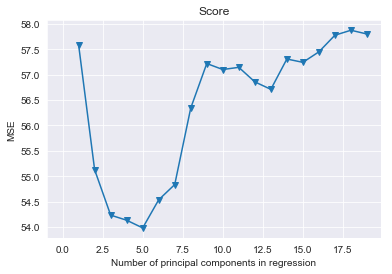

In [58]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [59]:
regr2 = RandomForestRegressor(max_features=11, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

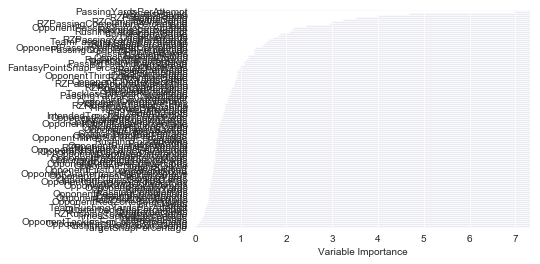

In [60]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [61]:
RB = pd.read_csv('RB/RB.csv')
RB.describe()

,Rank,Week,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,842.037179,8.477310,6.017496,24.272827,2.596501,0.158010,1.899945,1.415528,11.558775,0.056315,0.070530,0.042100,6.411372,6.411394
std,441.895736,4.703129,7.095297,33.069558,3.268688,0.429579,2.405397,1.900449,18.707570,0.242163,0.280572,0.208881,8.004092,8.004100
min,1.000000,1.000000,0.000000,-11.000000,-10.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,-1.600000,-1.600000
25%,457.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,914.000000,8.000000,3.000000,10.000000,2.400000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.500000,3.500000
75%,1304.000000,13.000000,10.000000,39.000000,4.100000,0.000000,3.000000,2.000000,16.000000,0.000000,0.000000,0.000000,9.800000,9.800000
max,1829.000000,16.000000,37.000000,181.000000,56.000000,3.000000,14.000000,12.000000,158.000000,2.000000,3.000000,2.000000,55.600000,55.600000


In [62]:
RB = RB.set_index(['Name', 'Team'])
RB.head()

,,Rank,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,
Todd Gurley,LAR,1,RB,16,TEN,22,118,5.4,0,13,10,158,2,0,0,55.6,55.6
Kareem Hunt,KC,2,RB,1,NE,17,148,8.7,1,5,5,98,2,1,1,49.6,49.6
Todd Gurley,LAR,3,RB,15,SEA,21,152,7.2,3,3,3,28,1,0,0,48.0,48.0
Ezekiel Elliott,DAL,4,RB,7,SF,26,147,5.7,2,3,1,72,1,0,0,43.9,43.9
Kareem Hunt,KC,5,RB,15,LAC,24,155,6.5,1,9,7,51,1,0,0,42.6,42.6


In [63]:
RBscore = pd.DataFrame()
RBscore = RB.query('Week == 2')
RB2 = RB[RB.Week < 2]
RB2 = RB2.groupby(['Name', 'Team']).mean()
RB2 = RB2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw2 = pd.DataFrame()
RBw2['Opponent'] = RBscore.Opponent
RBw2['Score'] = RBscore.FantasyPointsDraftKings
RBw2['Week'] = RBscore.Week
RBw2 = RBw2.join(RB2)
RBw2 = RBw2.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 3')
RB3 = RB[RB.Week < 3]
RB3 = RB3.groupby(['Name', 'Team']).mean()
RB3 = RB3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw3 = pd.DataFrame()
RBw3['Opponent'] = RBscore.Opponent
RBw3['Score'] = RBscore.FantasyPointsDraftKings
RBw3['Week'] = RBscore.Week
RBw3 = RBw3.join(RB3)
RBw3 = RBw3.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 4')
RB4 = RB[RB.Week < 4]
RB4 = RB4.groupby(['Name', 'Team']).mean()
RB4 = RB4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw4 = pd.DataFrame()
RBw4['Opponent'] = RBscore.Opponent
RBw4['Score'] = RBscore.FantasyPointsDraftKings
RBw4['Week'] = RBscore.Week
RBw4 = RBw4.join(RB4)
RBw4 = RBw4.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 5')
RB5 = RB[RB.Week < 5]
RB5 = RB5.groupby(['Name', 'Team']).mean()
RB5 = RB5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw5 = pd.DataFrame()
RBw5['Opponent'] = RBscore.Opponent
RBw5['Score'] = RBscore.FantasyPointsDraftKings
RBw5['Week'] = RBscore.Week
RBw5 = RBw5.join(RB5)
RBw5 = RBw5.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 6')
RB6 = RB[RB.Week < 6]
RB6 = RB6.groupby(['Name', 'Team']).mean()
RB6 = RB6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw6 = pd.DataFrame()
RBw6['Opponent'] = RBscore.Opponent
RBw6['Score'] = RBscore.FantasyPointsDraftKings
RBw6['Week'] = RBscore.Week
RBw6 = RBw6.join(RB6)
RBw6 = RBw6.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 7')
RB7 = RB[RB.Week < 7]
RB7 = RB7.groupby(['Name', 'Team']).mean()
RB7 = RB7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw7 = pd.DataFrame()
RBw7['Opponent'] = RBscore.Opponent
RBw7['Score'] = RBscore.FantasyPointsDraftKings
RBw7['Week'] = RBscore.Week
RBw7 = RBw7.join(RB7)
RBw7 = RBw7.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 8')
RB8 = RB[RB.Week < 8]
RB8 = RB8.groupby(['Name', 'Team']).mean()
RB8 = RB8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw8 = pd.DataFrame()
RBw8['Opponent'] = RBscore.Opponent
RBw8['Score'] = RBscore.FantasyPointsDraftKings
RBw8['Week'] = RBscore.Week
RBw8 = RBw8.join(RB8)
RBw8 = RBw8.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 9')
RB9 = RB[RB.Week < 9]
RB9 = RB9.groupby(['Name', 'Team']).mean()
RB9 = RB9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw9 = pd.DataFrame()
RBw9['Opponent'] = RBscore.Opponent
RBw9['Score'] = RBscore.FantasyPointsDraftKings
RBw9['Week'] = RBscore.Week
RBw9 = RBw9.join(RB9)
RBw9 = RBw9.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 10')
RB10 = RB[RB.Week < 10]
RB10 = RB10.groupby(['Name', 'Team']).mean()
RB10 = RB10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw10 = pd.DataFrame()
RBw10['Opponent'] = RBscore.Opponent
RBw10['Score'] = RBscore.FantasyPointsDraftKings
RBw10['Week'] = RBscore.Week
RBw10 = RBw10.join(RB10)
RBw10 = RBw10.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 11')
RB11 = RB[RB.Week < 11]
RB11 = RB11.groupby(['Name', 'Team']).mean()
RB11 = RB11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw11 = pd.DataFrame()
RBw11['Opponent'] = RBscore.Opponent
RBw11['Score'] = RBscore.FantasyPointsDraftKings
RBw11['Week'] = RBscore.Week
RBw11 = RBw11.join(RB11)
RBw11 = RBw11.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 12')
RB12 = RB[RB.Week < 12]
RB12 = RB12.groupby(['Name', 'Team']).mean()
RB12 = RB12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw12 = pd.DataFrame()
RBw12['Opponent'] = RBscore.Opponent
RBw12['Score'] = RBscore.FantasyPointsDraftKings
RBw12['Week'] = RBscore.Week
RBw12 = RBw12.join(RB12)
RBw12 = RBw12.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 13')
RB13 = RB[RB.Week < 13]
RB13 = RB13.groupby(['Name', 'Team']).mean()
RB13 = RB13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw13 = pd.DataFrame()
RBw13['Opponent'] = RBscore.Opponent
RBw13['Score'] = RBscore.FantasyPointsDraftKings
RBw13['Week'] = RBscore.Week
RBw13 = RBw13.join(RB13)
RBw13 = RBw13.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 14')
RB14 = RB[RB.Week < 14]
RB14 = RB14.groupby(['Name', 'Team']).mean()
RB14 = RB14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw14 = pd.DataFrame()
RBw14['Opponent'] = RBscore.Opponent
RBw14['Score'] = RBscore.FantasyPointsDraftKings
RBw14['Week'] = RBscore.Week
RBw14 = RBw14.join(RB14)
RBw14 = RBw14.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 15')
RB15 = RB[RB.Week < 15]
RB15 = RB15.groupby(['Name', 'Team']).mean()
RB15 = RB15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw15 = pd.DataFrame()
RBw15['Opponent'] = RBscore.Opponent
RBw15['Score'] = RBscore.FantasyPointsDraftKings
RBw15['Week'] = RBscore.Week
RBw15 = RBw15.join(RB15)
RBw15 = RBw15.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 16')
RB16 = RB[RB.Week < 16]
RB16 = RB16.groupby(['Name', 'Team']).mean()
RB16 = RB16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw16 = pd.DataFrame()
RBw16['Opponent'] = RBscore.Opponent
RBw16['Score'] = RBscore.FantasyPointsDraftKings
RBw16['Week'] = RBscore.Week
RBw16 = RBw16.join(RB16)
RBw16 = RBw16.reset_index()

In [64]:
RBws = RBw2.append(RBw3, ignore_index=True, sort=False).append(RBw4, ignore_index=True, sort=False)\
.append(RBw5, ignore_index=True, sort=False).append(RBw6, ignore_index=True, sort=False)\
.append(RBw7, ignore_index=True, sort=False).append(RBw8, ignore_index=True, sort=False)\
.append(RBw9, ignore_index=True, sort=False).append(RBw10, ignore_index=True, sort=False)\
.append(RBw11, ignore_index=True, sort=False)\
.append(RBw12, ignore_index=True, sort=False).append(RBw13, ignore_index=True, sort=False)\
.append(RBw14, ignore_index=True, sort=False).append(RBw15, ignore_index=True, sort=False)\
.append(RBw16, ignore_index=True, sort=False)
RBws = RBws.dropna().drop_duplicates()
RBws.describe()

,Score,Week,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,6.522556,9.059964,5.720094,23.282576,2.625489,0.145666,1.845030,1.385232,11.182020,0.058597,0.071680,0.038251,6.177290
std,8.051696,4.399522,6.066961,25.964977,2.173322,0.253494,1.980630,1.533612,13.388416,0.141748,0.153334,0.098825,6.309982
min,-1.600000,2.000000,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,-0.300000
25%,0.000000,5.000000,0.333333,0.833333,0.537981,0.000000,0.226496,0.111111,0.333333,0.000000,0.000000,0.000000,0.655000
50%,3.700000,9.000000,3.666667,14.250000,2.892308,0.000000,1.000000,0.800000,5.500000,0.000000,0.000000,0.000000,4.620000
75%,9.900000,13.000000,9.571429,39.500000,3.900000,0.200000,2.954545,2.190909,18.139423,0.071429,0.100000,0.000000,9.774603
max,55.600000,16.000000,28.000000,148.000000,21.000000,3.000000,12.000000,9.000000,98.000000,2.000000,1.500000,1.000000,49.600000


In [65]:
RBavg = pd.DataFrame()
RBavg['Name'] = RBws['Name']
RBavg['Team'] = RBws['Team']
RBavg['Week'] = RBws['Week']
RBavg['Opponent'] = RBws['Opponent']
RBavg['RushesGame'] = RBws['RushingAttempts']
RBavg['RushYardGame'] = RBws['RushingYards']
RBavg['YardAttempt'] = RBws['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RBws['RushingTouchdowns']
RBavg['TargetsGame'] = RBws['ReceivingTargets']
RBavg['RecGame'] = RBws['Receptions']
RBavg['RecYardsGame'] = RBws['ReceivingYards']
RBavg['RecTdGame'] = RBws['ReceivingTouchdowns']
RBavg['PointsGame'] = RBws['FantasyPointsPerGameDraftKings']
RBavg['Score'] = RBws['Score']
RBavg.describe()

,Week,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,9.059964,5.720094,23.282576,2.625489,0.145666,1.845030,1.385232,11.182020,0.058597,6.177290,6.522556
std,4.399522,6.066961,25.964977,2.173322,0.253494,1.980630,1.533612,13.388416,0.141748,6.309982,8.051696
min,2.000000,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-0.300000,-1.600000
25%,5.000000,0.333333,0.833333,0.537981,0.000000,0.226496,0.111111,0.333333,0.000000,0.655000,0.000000
50%,9.000000,3.666667,14.250000,2.892308,0.000000,1.000000,0.800000,5.500000,0.000000,4.620000,3.700000
75%,13.000000,9.571429,39.500000,3.900000,0.200000,2.954545,2.190909,18.139423,0.071429,9.774603,9.900000
max,16.000000,28.000000,148.000000,21.000000,3.000000,12.000000,9.000000,98.000000,2.000000,49.600000,55.600000


In [66]:
RBRZ = pd.read_csv('RB/RBRZ.csv')
RBRZ.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Le'Veon Bell,PIT,RB,14,BAL,2,12,6.0,2,3,2,25,1,0,0,23.7,23.7
1,2,Todd Gurley,LAR,RB,3,SF,8,12,1.5,2,2,2,10,1,0,0,22.2,22.2
2,3,Todd Gurley,LAR,RB,15,SEA,6,11,1.8,2,1,1,14,1,0,0,21.5,21.5
3,4,Corey Clement,PHI,RB,9,DEN,3,6,2.0,2,1,1,15,1,0,0,21.1,21.1
4,5,DeMarco Murray,TEN,RB,10,CIN,3,12,4.0,2,1,1,7,1,0,0,20.9,20.9


In [67]:
RBRZ = RBRZ.set_index(['Name', 'Team'])
RBRZ.head()

Rank Position  Week Opponent  RushingAttempts  \
Name           Team                                                  
Le'Veon Bell   PIT      1       RB    14      BAL                2   
Todd Gurley    LAR      2       RB     3       SF                8   
               LAR      3       RB    15      SEA                6   
Corey Clement  PHI      4       RB     9      DEN                3   
DeMarco Murray TEN      5       RB    10      CIN                3   

                     RushingYards  RushingYardsPerAttempt  RushingTouchdowns  \
Name           Team                                                            
Le'Veon Bell   PIT             12                     6.0                  2   
Todd Gurley    LAR             12                     1.5                  2   
               LAR             11                     1.8                  2   
Corey Clement  PHI              6                     2.0                  2   
DeMarco Murray TEN             12                     4.0                  2   

                     ReceivingTargets  Receptions  ReceivingYards  \
Name           Team                                                 
Le'Veon Bell   PIT                  3           2              25   
Todd Gurley    LAR                  2           2              10   
               LAR                  1           1              14   
Corey Clement  PHI                  1           1              15   
DeMarco Murray TEN                  1           1               7   

                     ReceivingTouchdowns  Fumbles  FumblesLost  \
Name           Team                                              
Le'Veon Bell   PIT                     1        0            0   
Todd Gurley    LAR                     1        0            0   
               LAR                     1        0            0   
Corey Clement  PHI                     1        0            0   
DeMarco Murray TEN                     1        0            0   

                     FantasyPointsPerGameDraftKings  FantasyPointsDraftKings  
Name           Team                                                           
Le'Veon Bell   PIT                             23.7                     23.7  
Todd Gurley    LAR                             22.2                     22.2  
               LAR                             21.5                     21.5  
Corey Clement  PHI                             21.1                     21.1  
DeMarco Murray TEN                             20.9                     20.9

In [68]:
RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 2')
RBRZ2 = RBRZ[RBRZ.Week < 2]
RBRZ2 = RBRZ2.groupby(['Name', 'Team']).mean()
RBRZ2 = RBRZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw2 = pd.DataFrame()
RBRZw2['Opponent'] = RBRZscore.Opponent
RBRZw2['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw2['Week'] = RBRZscore.Week
RBRZw2 = RBRZw2.join(RBRZ2)
RBRZw2 = RBRZw2.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 3')
RBRZ3 = RBRZ[RBRZ.Week < 3]
RBRZ3 = RBRZ3.groupby(['Name', 'Team']).mean()
RBRZ3 = RBRZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw3 = pd.DataFrame()
RBRZw3['Opponent'] = RBRZscore.Opponent
RBRZw3['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw3['Week'] = RBRZscore.Week
RBRZw3 = RBRZw3.join(RBRZ3)
RBRZw3 = RBRZw3.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 4')
RBRZ4 = RBRZ[RBRZ.Week < 4]
RBRZ4 = RBRZ4.groupby(['Name', 'Team']).mean()
RBRZ4 = RBRZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw4 = pd.DataFrame()
RBRZw4['Opponent'] = RBRZscore.Opponent
RBRZw4['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw4['Week'] = RBRZscore.Week
RBRZw4 = RBRZw4.join(RBRZ4)
RBRZw4 = RBRZw4.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 5')
RBRZ5 = RBRZ[RBRZ.Week < 5]
RBRZ5 = RBRZ5.groupby(['Name', 'Team']).mean()
RBRZ5 = RBRZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw5 = pd.DataFrame()
RBRZw5['Opponent'] = RBRZscore.Opponent
RBRZw5['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw5['Week'] = RBRZscore.Week
RBRZw5 = RBRZw5.join(RBRZ5)
RBRZw5 = RBRZw5.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 6')
RBRZ6 = RBRZ[RBRZ.Week < 6]
RBRZ6 = RBRZ6.groupby(['Name', 'Team']).mean()
RBRZ6 = RBRZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw6 = pd.DataFrame()
RBRZw6['Opponent'] = RBRZscore.Opponent
RBRZw6['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw6['Week'] = RBRZscore.Week
RBRZw6 = RBRZw6.join(RBRZ6)
RBRZw6 = RBRZw6.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 7')
RBRZ7 = RBRZ[RBRZ.Week < 7]
RBRZ7 = RBRZ7.groupby(['Name', 'Team']).mean()
RBRZ7 = RBRZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw7 = pd.DataFrame()
RBRZw7['Opponent'] = RBRZscore.Opponent
RBRZw7['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw7['Week'] = RBRZscore.Week
RBRZw7 = RBRZw7.join(RBRZ7)
RBRZw7 = RBRZw7.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 8')
RBRZ8 = RBRZ[RBRZ.Week < 8]
RBRZ8 = RBRZ8.groupby(['Name', 'Team']).mean()
RBRZ8 = RBRZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw8 = pd.DataFrame()
RBRZw8['Opponent'] = RBRZscore.Opponent
RBRZw8['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw8['Week'] = RBRZscore.Week
RBRZw8 = RBRZw8.join(RBRZ8)
RBRZw8 = RBRZw8.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 9')
RBRZ9 = RBRZ[RBRZ.Week < 9]
RBRZ9 = RBRZ9.groupby(['Name', 'Team']).mean()
RBRZ9 = RBRZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw9 = pd.DataFrame()
RBRZw9['Opponent'] = RBRZscore.Opponent
RBRZw9['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw9['Week'] = RBRZscore.Week
RBRZw9 = RBRZw9.join(RBRZ9)
RBRZw9 = RBRZw9.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 10')
RBRZ10 = RBRZ[RBRZ.Week < 10]
RBRZ10 = RBRZ10.groupby(['Name', 'Team']).mean()
RBRZ10 = RBRZ10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw10 = pd.DataFrame()
RBRZw10['Opponent'] = RBRZscore.Opponent
RBRZw10['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw10['Week'] = RBRZscore.Week
RBRZw10 = RBRZw10.join(RBRZ10)
RBRZw10 = RBRZw10.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 11')
RBRZ11 = RBRZ[RBRZ.Week < 11]
RBRZ11 = RBRZ11.groupby(['Name', 'Team']).mean()
RBRZ11 = RBRZ11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw11 = pd.DataFrame()
RBRZw11['Opponent'] = RBRZscore.Opponent
RBRZw11['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw11['Week'] = RBRZscore.Week
RBRZw11 = RBRZw11.join(RBRZ11)
RBRZw11 = RBRZw11.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 12')
RBRZ12 = RBRZ[RBRZ.Week < 12]
RBRZ12 = RBRZ12.groupby(['Name', 'Team']).mean()
RBRZ12 = RBRZ12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw12 = pd.DataFrame()
RBRZw12['Opponent'] = RBRZscore.Opponent
RBRZw12['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw12['Week'] = RBRZscore.Week
RBRZw12 = RBRZw12.join(RBRZ12)
RBRZw12 = RBRZw12.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 13')
RBRZ13 = RBRZ[RBRZ.Week < 13]
RBRZ13 = RBRZ13.groupby(['Name', 'Team']).mean()
RBRZ13 = RBRZ13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw13 = pd.DataFrame()
RBRZw13['Opponent'] = RBRZscore.Opponent
RBRZw13['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw13['Week'] = RBRZscore.Week
RBRZw13 = RBRZw13.join(RBRZ13)
RBRZw13 = RBRZw13.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 14')
RBRZ14 = RBRZ[RBRZ.Week < 14]
RBRZ14 = RBRZ14.groupby(['Name', 'Team']).mean()
RBRZ14 = RBRZ14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw14 = pd.DataFrame()
RBRZw14['Opponent'] = RBRZscore.Opponent
RBRZw14['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw14['Week'] = RBRZscore.Week
RBRZw14 = RBRZw14.join(RBRZ14)
RBRZw14 = RBRZw14.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 15')
RBRZ15 = RBRZ[RBRZ.Week < 15]
RBRZ15 = RBRZ15.groupby(['Name', 'Team']).mean()
RBRZ15 = RBRZ15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw15 = pd.DataFrame()
RBRZw15['Opponent'] = RBRZscore.Opponent
RBRZw15['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw15['Week'] = RBRZscore.Week
RBRZw15 = RBRZw15.join(RBRZ15)
RBRZw15 = RBRZw15.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 16')
RBRZ16 = RBRZ[RBRZ.Week < 16]
RBRZ16 = RBRZ16.groupby(['Name', 'Team']).mean()
RBRZ16 = RBRZ16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw16 = pd.DataFrame()
RBRZw16['Opponent'] = RBRZscore.Opponent
RBRZw16['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw16['Week'] = RBRZscore.Week
RBRZw16 = RBRZw16.join(RBRZ16)
RBRZw16 = RBRZw16.reset_index()


In [69]:
RBRZws = RBRZw2.append(RBRZw3, ignore_index=True, sort=False).append(RBRZw4, ignore_index=True, sort=False)\
.append(RBRZw5, ignore_index=True, sort=False).append(RBRZw6, ignore_index=True, sort=False)\
.append(RBRZw7, ignore_index=True, sort=False).append(RBRZw8, ignore_index=True, sort=False)\
.append(RBRZw9, ignore_index=True, sort=False).append(RBRZw10, ignore_index=True, sort=False)\
.append(RBRZw11, ignore_index=True, sort=False)\
.append(RBRZw12, ignore_index=True, sort=False).append(RBRZw13, ignore_index=True, sort=False)\
.append(RBRZw14, ignore_index=True, sort=False).append(RBRZw15, ignore_index=True, sort=False)\
.append(RBRZw16, ignore_index=True, sort=False)
RBRZws = RBRZws.dropna().drop_duplicates()
RBRZws.describe()


,Score,Week,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,1.550556,9.068519,0.869216,2.108986,0.922724,0.118704,0.204833,0.145079,0.845291,0.044052,0.008805,0.005034,1.420857
std,3.441215,4.403898,1.067812,2.999373,1.233637,0.230879,0.313142,0.248205,1.809210,0.115296,0.052053,0.039250,2.084696
min,-1.300000,2.000000,0.000000,-7.000000,-3.500000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,-0.400000
25%,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,0.500000,0.777778,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667
75%,0.725000,13.000000,1.444444,3.500000,1.572802,0.166667,0.285714,0.200000,1.000000,0.000000,0.000000,0.000000,2.200000
max,23.700000,16.000000,8.000000,22.000000,11.666667,3.000000,2.000000,2.000000,19.000000,1.000000,1.000000,1.000000,20.000000


In [70]:
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RBRZws['Name']
RBRZavg['Week'] = RBRZws['Week']
RBRZavg['RZattemptsGame'] = RBRZws['RushingAttempts']
RBRZavg['RZyardsGame'] = RBRZws['RushingYards']
RBRZavg['RZYardAtt'] = RBRZws['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RBRZws['RushingTouchdowns']
RBRZavg['RZTarGame'] = RBRZws['ReceivingTargets']
RBRZavg['RZRecGame'] = RBRZws['Receptions']
RBRZavg['RZRecYarGame'] = RBRZws['ReceivingYards']
RBRZavg['RZRecTDGame'] = RBRZws['ReceivingTouchdowns']
RBRZavg['RZPointsGame'] = RBRZws['FantasyPointsPerGameDraftKings']
RBRZavg.describe()

,Week,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,9.068519,0.869216,2.108986,0.922724,0.118704,0.204833,0.145079,0.845291,0.044052,1.420857
std,4.403898,1.067812,2.999373,1.233637,0.230879,0.313142,0.248205,1.809210,0.115296,2.084696
min,2.000000,0.000000,-7.000000,-3.500000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.400000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.500000,0.777778,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667
75%,13.000000,1.444444,3.500000,1.572802,0.166667,0.285714,0.200000,1.000000,0.000000,2.200000
max,16.000000,8.000000,22.000000,11.666667,3.000000,2.000000,2.000000,19.000000,1.000000,20.000000


In [71]:
RBsnaps = pd.read_csv('RB/RBsnaps.csv')

RBsnaps = RBsnaps.set_index(['Name', 'Team'])

In [72]:
RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 2')
RBsnaps2 = RBsnaps[RBsnaps.Week < 2]
RBsnaps2 = RBsnaps2.groupby(['Name', 'Team']).mean()
RBsnaps2 = RBsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw2 = pd.DataFrame()
RBsnapsw2['Opponent'] = RBsnapsscore.Opponent
RBsnapsw2['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw2['Week'] = RBsnapsscore.Week
RBsnapsw2 = RBsnapsw2.join(RBsnaps2)
RBsnapsw2 = RBsnapsw2.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 3')
RBsnaps3 = RBsnaps[RBsnaps.Week < 3]
RBsnaps3 = RBsnaps3.groupby(['Name', 'Team']).mean()
RBsnaps3 = RBsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw3 = pd.DataFrame()
RBsnapsw3['Opponent'] = RBsnapsscore.Opponent
RBsnapsw3['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw3['Week'] = RBsnapsscore.Week
RBsnapsw3 = RBsnapsw3.join(RBsnaps3)
RBsnapsw3 = RBsnapsw3.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 4')
RBsnaps4 = RBsnaps[RBsnaps.Week < 4]
RBsnaps4 = RBsnaps4.groupby(['Name', 'Team']).mean()
RBsnaps4 = RBsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw4 = pd.DataFrame()
RBsnapsw4['Opponent'] = RBsnapsscore.Opponent
RBsnapsw4['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw4['Week'] = RBsnapsscore.Week
RBsnapsw4 = RBsnapsw4.join(RBsnaps4)
RBsnapsw4 = RBsnapsw4.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 5')
RBsnaps5 = RBsnaps[RBsnaps.Week < 5]
RBsnaps5 = RBsnaps5.groupby(['Name', 'Team']).mean()
RBsnaps5 = RBsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw5 = pd.DataFrame()
RBsnapsw5['Opponent'] = RBsnapsscore.Opponent
RBsnapsw5['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw5['Week'] = RBsnapsscore.Week
RBsnapsw5 = RBsnapsw5.join(RBsnaps5)
RBsnapsw5 = RBsnapsw5.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 6')
RBsnaps6 = RBsnaps[RBsnaps.Week < 6]
RBsnaps6 = RBsnaps6.groupby(['Name', 'Team']).mean()
RBsnaps6 = RBsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw6 = pd.DataFrame()
RBsnapsw6['Opponent'] = RBsnapsscore.Opponent
RBsnapsw6['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw6['Week'] = RBsnapsscore.Week
RBsnapsw6 = RBsnapsw6.join(RBsnaps6)
RBsnapsw6 = RBsnapsw6.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 7')
RBsnaps7 = RBsnaps[RBsnaps.Week < 7]
RBsnaps7 = RBsnaps7.groupby(['Name', 'Team']).mean()
RBsnaps7 = RBsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw7 = pd.DataFrame()
RBsnapsw7['Opponent'] = RBsnapsscore.Opponent
RBsnapsw7['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw7['Week'] = RBsnapsscore.Week
RBsnapsw7 = RBsnapsw7.join(RBsnaps7)
RBsnapsw7 = RBsnapsw7.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 8')
RBsnaps8 = RBsnaps[RBsnaps.Week < 8]
RBsnaps8 = RBsnaps8.groupby(['Name', 'Team']).mean()
RBsnaps8 = RBsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw8 = pd.DataFrame()
RBsnapsw8['Opponent'] = RBsnapsscore.Opponent
RBsnapsw8['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw8['Week'] = RBsnapsscore.Week
RBsnapsw8 = RBsnapsw8.join(RBsnaps8)
RBsnapsw8 = RBsnapsw8.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 9')
RBsnaps9 = RBsnaps[RBsnaps.Week < 9]
RBsnaps9 = RBsnaps9.groupby(['Name', 'Team']).mean()
RBsnaps9 = RBsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw9 = pd.DataFrame()
RBsnapsw9['Opponent'] = RBsnapsscore.Opponent
RBsnapsw9['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw9['Week'] = RBsnapsscore.Week
RBsnapsw9 = RBsnapsw9.join(RBsnaps9)
RBsnapsw9 = RBsnapsw9.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 10')
RBsnaps10 = RBsnaps[RBsnaps.Week < 10]
RBsnaps10 = RBsnaps10.groupby(['Name', 'Team']).mean()
RBsnaps10 = RBsnaps10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw10 = pd.DataFrame()
RBsnapsw10['Opponent'] = RBsnapsscore.Opponent
RBsnapsw10['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw10['Week'] = RBsnapsscore.Week
RBsnapsw10 = RBsnapsw10.join(RBsnaps10)
RBsnapsw10 = RBsnapsw10.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 11')
RBsnaps11 = RBsnaps[RBsnaps.Week < 11]
RBsnaps11 = RBsnaps11.groupby(['Name', 'Team']).mean()
RBsnaps11 = RBsnaps11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw11 = pd.DataFrame()
RBsnapsw11['Opponent'] = RBsnapsscore.Opponent
RBsnapsw11['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw11['Week'] = RBsnapsscore.Week
RBsnapsw11 = RBsnapsw11.join(RBsnaps11)
RBsnapsw11 = RBsnapsw11.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 12')
RBsnaps12 = RBsnaps[RBsnaps.Week < 12]
RBsnaps12 = RBsnaps12.groupby(['Name', 'Team']).mean()
RBsnaps12 = RBsnaps12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw12 = pd.DataFrame()
RBsnapsw12['Opponent'] = RBsnapsscore.Opponent
RBsnapsw12['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw12['Week'] = RBsnapsscore.Week
RBsnapsw12 = RBsnapsw12.join(RBsnaps12)
RBsnapsw12 = RBsnapsw12.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 13')
RBsnaps13 = RBsnaps[RBsnaps.Week < 13]
RBsnaps13 = RBsnaps13.groupby(['Name', 'Team']).mean()
RBsnaps13 = RBsnaps13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw13 = pd.DataFrame()
RBsnapsw13['Opponent'] = RBsnapsscore.Opponent
RBsnapsw13['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw13['Week'] = RBsnapsscore.Week
RBsnapsw13 = RBsnapsw13.join(RBsnaps13)
RBsnapsw13 = RBsnapsw13.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 14')
RBsnaps14 = RBsnaps[RBsnaps.Week < 14]
RBsnaps14 = RBsnaps14.groupby(['Name', 'Team']).mean()
RBsnaps14 = RBsnaps14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw14 = pd.DataFrame()
RBsnapsw14['Opponent'] = RBsnapsscore.Opponent
RBsnapsw14['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw14['Week'] = RBsnapsscore.Week
RBsnapsw14 = RBsnapsw14.join(RBsnaps14)
RBsnapsw14 = RBsnapsw14.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 15')
RBsnaps15 = RBsnaps[RBsnaps.Week < 15]
RBsnaps15 = RBsnaps15.groupby(['Name', 'Team']).mean()
RBsnaps15 = RBsnaps15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw15 = pd.DataFrame()
RBsnapsw15['Opponent'] = RBsnapsscore.Opponent
RBsnapsw15['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw15['Week'] = RBsnapsscore.Week
RBsnapsw15 = RBsnapsw15.join(RBsnaps15)
RBsnapsw15 = RBsnapsw15.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 16')
RBsnaps16 = RBsnaps[RBsnaps.Week < 16]
RBsnaps16 = RBsnaps16.groupby(['Name', 'Team']).mean()
RBsnaps16 = RBsnaps16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw16 = pd.DataFrame()
RBsnapsw16['Opponent'] = RBsnapsscore.Opponent
RBsnapsw16['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw16['Week'] = RBsnapsscore.Week
RBsnapsw16 = RBsnapsw16.join(RBsnaps16)
RBsnapsw16 = RBsnapsw16.reset_index()

In [73]:
RBsnapsws = RBsnapsw2.append(RBsnapsw3, ignore_index=True, sort=False).append(RBsnapsw4, ignore_index=True, sort=False)\
.append(RBsnapsw5, ignore_index=True, sort=False).append(RBsnapsw6, ignore_index=True, sort=False)\
.append(RBsnapsw7, ignore_index=True, sort=False).append(RBsnapsw8, ignore_index=True, sort=False)\
.append(RBsnapsw9, ignore_index=True, sort=False).append(RBsnapsw10, ignore_index=True, sort=False)\
.append(RBsnapsw11, ignore_index=True, sort=False)\
.append(RBsnapsw12, ignore_index=True, sort=False).append(RBsnapsw13, ignore_index=True, sort=False)\
.append(RBsnapsw14, ignore_index=True, sort=False).append(RBsnapsw15, ignore_index=True, sort=False)\
.append(RBsnapsw16, ignore_index=True, sort=False)
RBsnapsws = RBsnapsws.dropna().drop_duplicates()
RBsnapsws.describe()


,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,6.522556,9.059964,19.040738,28.672994,23.715851,7.840269,29.602701,31.560241,25.596336
std,8.051696,4.399522,14.682040,21.922632,18.984843,7.440065,20.239856,20.829686,21.517330
min,-1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000
25%,0.000000,5.000000,7.788889,11.602273,3.985714,2.108333,8.308333,10.000000,7.462821
50%,3.700000,9.000000,16.400000,24.900000,24.878571,6.300000,33.600000,35.725000,26.184615
75%,9.900000,13.000000,27.208333,41.360227,38.335417,11.800000,45.880455,48.357500,36.293750
max,55.600000,16.000000,74.000000,94.100000,100.000000,66.700000,100.000000,100.000000,227.500000


In [74]:
RBsnaps = RBsnapsws.drop(['Team', 'Opponent', 'Score'], axis=1)


In [75]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
RBd2 = pd.DataFrame()
RBd2['Opponent'] = Defense2['Team']
RBd2['Week'] = 2
RBd2['DPointsAllowed'] = Defense2.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
RBd3 = pd.DataFrame()
RBd3['Opponent'] = Defense3['Team']
RBd3['Week'] = 3
RBd3['DPointsAllowed'] = Defense3.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
RBd4 = pd.DataFrame()
RBd4['Opponent'] = Defense4['Team']
RBd4['Week'] = 4
RBd4['DPointsAllowed'] = Defense4.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
RBd5 = pd.DataFrame()
RBd5['Opponent'] = Defense5['Team']
RBd5['Week'] = 5
RBd5['DPointsAllowed'] = Defense5.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
RBd6 = pd.DataFrame()
RBd6['Opponent'] = Defense6['Team']
RBd6['Week'] = 6
RBd6['DPointsAllowed'] = Defense6.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
RBd7 = pd.DataFrame()
RBd7['Opponent'] = Defense7['Team']
RBd7['Week'] = 7
RBd7['DPointsAllowed'] = Defense7.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
RBd8 = pd.DataFrame()
RBd8['Opponent'] = Defense8['Team']
RBd8['Week'] = 8
RBd8['DPointsAllowed'] = Defense8.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
RBd9 = pd.DataFrame()
RBd9['Opponent'] = Defense9['Team']
RBd9['Week'] = 9
RBd9['DPointsAllowed'] = Defense9.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense10 = Defense[Defense.Week < 10]
Defense10 = Defense10.groupby('Team').mean()
Defense10 = Defense10.drop('Week', axis = 1)
Defense10 = Defense10.reset_index()
RBd10 = pd.DataFrame()
RBd10['Opponent'] = Defense10['Team']
RBd10['Week'] = 10
RBd10['DPointsAllowed'] = Defense10.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense11 = Defense[Defense.Week < 11]
Defense11 = Defense11.groupby('Team').mean()
Defense11 = Defense11.drop('Week', axis = 1)
Defense11 = Defense11.reset_index()
RBd11 = pd.DataFrame()
RBd11['Opponent'] = Defense11['Team']
RBd11['Week'] = 11
RBd11['DPointsAllowed'] = Defense11.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense12 = Defense[Defense.Week < 12]
Defense12 = Defense12.groupby('Team').mean()
Defense12 = Defense12.drop('Week', axis = 1)
Defense12 = Defense12.reset_index()
RBd12 = pd.DataFrame()
RBd12['Opponent'] = Defense12['Team']
RBd12['Week'] = 12
RBd12['DPointsAllowed'] = Defense12.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense13 = Defense[Defense.Week < 13]
Defense13 = Defense13.groupby('Team').mean()
Defense13 = Defense13.drop('Week', axis = 1)
Defense13 = Defense13.reset_index()
RBd13 = pd.DataFrame()
RBd13['Opponent'] = Defense13['Team']
RBd13['Week'] = 13
RBd13['DPointsAllowed'] = Defense13.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense14 = Defense[Defense.Week < 14]
Defense14 = Defense14.groupby('Team').mean()
Defense14 = Defense14.drop('Week', axis = 1)
Defense14 = Defense14.reset_index()
RBd14 = pd.DataFrame()
RBd14['Opponent'] = Defense14['Team']
RBd14['Week'] = 14
RBd14['DPointsAllowed'] = Defense14.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense15 = Defense[Defense.Week < 15]
Defense15 = Defense15.groupby('Team').mean()
Defense15 = Defense15.drop('Week', axis = 1)
Defense15 = Defense15.reset_index()
RBd15 = pd.DataFrame()
RBd15['Opponent'] = Defense15['Team']
RBd15['Week'] = 15
RBd15['DPointsAllowed'] = Defense15.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense16 = Defense[Defense.Week < 16]
Defense16 = Defense16.groupby('Team').mean()
Defense16 = Defense16.drop('Week', axis = 1)
Defense16 = Defense16.reset_index()
RBd16 = pd.DataFrame()
RBd16['Opponent'] = Defense16['Team']
RBd16['Week'] = 16
RBd16['DPointsAllowed'] = Defense16.DraftKingsRunningbackFantasyPointsAllowedAverage

In [76]:
RBds = RBd2.append(RBd3, ignore_index=True, sort=False).append(RBd4, ignore_index=True, sort=False)\
.append(RBd5, ignore_index=True, sort=False).append(RBd6, ignore_index=True, sort=False)\
.append(RBd7, ignore_index=True, sort=False).append(RBd8, ignore_index=True, sort=False)\
.append(RBd9, ignore_index=True, sort=False).append(RBd10, ignore_index=True, sort=False)\
.append(RBd11, ignore_index=True, sort=False)\
.append(RBd12, ignore_index=True, sort=False).append(RBd13, ignore_index=True, sort=False)\
.append(RBd14, ignore_index=True, sort=False).append(RBd15, ignore_index=True, sort=False)\
.append(RBd16, ignore_index=True, sort=False)


In [77]:
RBavg = RBavg.set_index(['Name', 'Week'])
RBRZavg = RBRZavg.set_index(['Name', 'Week'])
RBs = RBavg.join(RBRZavg, lsuffix='avg', rsuffix='rzavg')
RBs = RBs.drop_duplicates().dropna()
RBs.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
count,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,5.895053,23.994715,2.705794,0.150121,1.899562,1.425700,11.507801,0.060033,6.360569,6.703208,0.878982,2.132683,0.933092,0.120037,0.207134,0.146709,0.854788,0.044547,1.436822
std,6.074745,26.032973,2.156493,0.256041,1.985514,1.538929,13.456926,0.143523,6.316486,8.100147,1.069790,3.007793,1.236645,0.231828,0.314139,0.249117,1.817118,0.115847,2.090901
min,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-0.300000,-1.600000,0.000000,-7.000000,-3.500000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.400000
25%,0.500000,1.129464,0.750000,0.000000,0.285714,0.153846,0.918269,0.000000,0.780455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,15.500000,3.000000,0.000000,1.100000,0.875000,6.000000,0.000000,4.990000,3.900000,0.500000,0.800000,0.532500,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,10.000000,40.875000,3.929318,0.220238,3.000000,2.250000,18.650000,0.076923,9.839091,10.200000,1.452020,3.500000,1.588333,0.166667,0.300000,0.200000,1.000000,0.000000,2.211111
max,28.000000,148.000000,21.000000,3.000000,12.000000,9.000000,98.000000,2.000000,49.600000,55.600000,8.000000,22.000000,11.666667,3.000000,2.000000,2.000000,19.000000,1.000000,20.000000


In [78]:
RBsnaps = RBsnaps.set_index(['Name', 'Week'])
RBs = RBs.join(RBsnaps, lsuffix='avg', rsuffix='rzavg')
RBs = RBs.drop_duplicates().dropna()
RBs.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,...,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,5.895053,23.994715,2.705794,0.150121,1.899562,1.425700,11.507801,0.060033,6.360569,6.703208,...,0.854788,0.044547,1.436822,19.488408,29.344884,24.441242,8.064188,30.492261,32.509677,26.319129
std,6.074745,26.032973,2.156493,0.256041,1.985514,1.538929,13.456926,0.143523,6.316486,8.100147,...,1.817118,0.115847,2.090901,14.657144,21.880844,18.807308,7.438254,19.886669,20.414033,21.420412
min,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-0.300000,-1.600000,...,-3.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000
25%,0.500000,1.129464,0.750000,0.000000,0.285714,0.153846,0.918269,0.000000,0.780455,0.000000,...,0.000000,0.000000,0.000000,8.175000,12.308333,5.172222,2.528750,10.000000,12.220556,8.781250
50%,4.000000,15.500000,3.000000,0.000000,1.100000,0.875000,6.000000,0.000000,4.990000,3.900000,...,0.000000,0.000000,0.500000,17.000000,25.639610,25.787500,6.544156,34.541667,36.656923,26.568750
75%,10.000000,40.875000,3.929318,0.220238,3.000000,2.250000,18.650000,0.076923,9.839091,10.200000,...,1.000000,0.000000,2.211111,27.602273,41.900000,38.679167,12.067500,46.095833,48.529643,36.700000
max,28.000000,148.000000,21.000000,3.000000,12.000000,9.000000,98.000000,2.000000,49.600000,55.600000,...,19.000000,1.000000,20.000000,74.000000,94.100000,100.000000,66.700000,100.000000,100.000000,227.500000


In [79]:
RBs = RBs.reset_index()

In [80]:
RBtest = RBs.set_index(['Week', 'Opponent'])
RBdtest = RBds.set_index(['Week', 'Opponent'])
RBho = RBtest.join(RBdtest, lsuffix='norm', rsuffix='d')
RBho = RBho.reset_index()
RBhope = RBho.dropna().drop_duplicates()
RBhope.describe()


,Week,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,...,RZRecTDGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DPointsAllowed
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,...,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,9.114107,5.895219,23.981526,2.699049,0.150153,1.891598,1.420672,11.493101,0.059043,6.347543,...,0.043489,1.426199,19.486790,29.335050,24.457473,8.008545,30.463450,32.470347,26.233383,23.971136
std,4.384960,6.072857,26.028857,2.140062,0.255552,1.968221,1.529039,13.442464,0.139887,6.295092,...,0.111026,2.072750,14.652435,21.864753,18.818942,7.247982,19.878602,20.395916,21.234362,4.690689
min,2.000000,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-0.300000,...,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000,7.300000
25%,5.000000,0.500000,1.133929,0.750000,0.000000,0.285714,0.160256,0.961538,0.000000,0.780909,...,0.000000,0.000000,8.215385,12.316667,5.177778,2.532500,10.000000,12.165000,8.752083,21.366667
50%,9.000000,4.000000,15.500000,3.000000,0.000000,1.100000,0.875000,6.000000,0.000000,5.000000,...,0.000000,0.500000,17.000000,25.642857,25.800000,6.542857,34.500000,36.641667,26.537500,24.018182
75%,13.000000,10.000000,40.458333,3.926136,0.222222,3.000000,2.250000,18.633333,0.076923,9.834848,...,0.000000,2.205556,27.500000,41.900000,38.707143,12.041667,46.041667,48.522619,36.668750,26.136111
max,16.000000,28.000000,148.000000,21.000000,3.000000,10.500000,9.000000,98.000000,2.000000,49.600000,...,1.000000,20.000000,74.000000,94.100000,100.000000,50.000000,100.000000,100.000000,227.500000,59.100000


In [81]:
RBhope1 = RBhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
RBfi = RBhope1.join(Vegashope)


In [82]:
RBs = RBfi.reset_index()

In [83]:
RBs = RBs.set_index('Team')
RBs = RBs.join(Offense)
RBs.columns

Index(['Week', 'Opponent', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayed', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'FantasyPointSnapPercentageDraftKings',
       'DPointsAllowed', 'Home', 'PointSpread', 'OverUnder', 'total',
       'PointsPerGame', 'OffensivePlays', 'OffensiveYards',
       'OffensiveYardsPerPlay', 'FirstDowns', 'ThirdDownConversions',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneConversions',
       'RedZoneAttempts', 'RedZonePercentage', 'Penalties', 'PenaltyYards',
       'TurnoverDifferential', 'RushingYards', 'TeamRushingYardsPerAttempt',
       'OpponentTacklesForLoss', 'OpponentTackles

In [84]:
RBs = RBs.reset_index()

In [85]:
RBs = RBs.set_index('Opponent')
RBs = RBs.join(Def)
RBs = RBs.reset_index()
RBs.columns

Index(['Opponent', 'Team', 'Week', 'Name', 'RushesGame', 'RushYardGame',
       'YardAttempt', 'RushTdGame', 'TargetsGame', 'RecGame',
       ...
       'OpponentPassingAttempts', 'OpponentCompletionPercentage',
       'OpponentPassingYards', 'OpponentPassingYardsPerAttempt',
       'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns',
       'OpponentPassingInterceptions', 'OpponentFirstDownsByPassing',
       'OpponentTimesSackedYards', 'OpponentTimesSackedYards.1'],
      dtype='object', length=106)

In [86]:
RBs.head()

,Opponent,Team,Week,Name,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
0,ARI,DAL,3,Ezekiel Elliott,16.500000,56.000000,2.600000,0.000000,5.000000,4.500000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
1,ARI,DAL,3,Keith Smith,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
2,ARI,DAL,3,Rod Smith,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
3,ARI,HOU,11,D'Onta Foreman,7.555556,29.111111,3.700000,0.000000,0.555556,0.333333,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255
4,ARI,HOU,11,Lamar Miller,15.555556,60.333333,4.055556,0.222222,2.888889,2.444444,...,35.25,60.8,221.3125,6.3,10.3,1.5,0.9375,11.6875,255,255


In [87]:
RBs = RBs.drop(['Opponent', 'Team', 'Week'], axis=1)

In [88]:
RBtrain = RBs.dropna().drop_duplicates()
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,...,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,5.895219,23.981526,2.699049,0.150153,1.891598,1.420672,11.493101,0.059043,6.347543,6.708552,...,34.173393,62.097931,224.730917,6.573668,10.600000,1.449412,0.840909,11.576254,243.510972,243.510972
std,6.072857,26.028857,2.140062,0.255552,1.968221,1.529039,13.442464,0.139887,6.295092,8.101167,...,1.740480,3.380105,19.313508,0.570464,0.765374,0.292130,0.267160,1.080909,63.192356,63.192356
min,0.000000,-4.000000,-3.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-0.300000,-1.600000,...,30.687500,56.800000,169.875000,5.300000,9.200000,0.812500,0.312500,8.937500,137.000000,137.000000
25%,0.500000,1.133929,0.750000,0.000000,0.285714,0.160256,0.961538,0.000000,0.780909,0.000000,...,33.000000,59.200000,213.750000,6.200000,10.100000,1.250000,0.625000,11.000000,179.000000,179.000000
50%,4.000000,15.500000,3.000000,0.000000,1.100000,0.875000,6.000000,0.000000,5.000000,3.900000,...,34.625000,62.200000,227.312500,6.500000,10.600000,1.437500,0.812500,11.687500,252.000000,252.000000
75%,10.000000,40.458333,3.926136,0.222222,3.000000,2.250000,18.633333,0.076923,9.834848,10.200000,...,35.250000,64.200000,239.250000,6.900000,11.000000,1.687500,1.125000,12.375000,287.000000,287.000000
max,28.000000,148.000000,21.000000,3.000000,10.500000,9.000000,98.000000,2.000000,49.600000,55.600000,...,37.812500,68.600000,260.562500,7.700000,12.300000,2.000000,1.375000,14.437500,393.000000,393.000000


In [89]:
RBtrain.to_csv('2015RB.csv')

In [90]:
X_train = RBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = RBtrain.Score

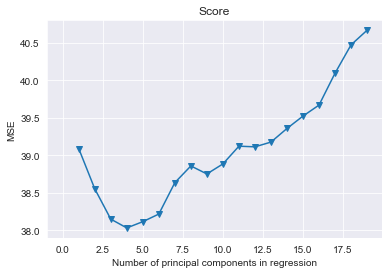

In [91]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [92]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

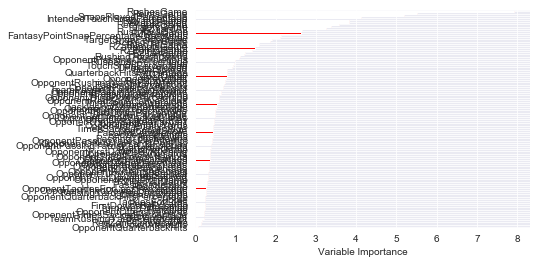

In [93]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [94]:
WR = pd.read_csv('WR/WR.csv')
WR.describe()


,Rank,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,1098.421405,8.577759,3.879599,2.283027,45.448537,29.474080,0.170569,14.567308,5.854222,9.003721,0.119565,0.612876,0.449498,0.002090,0.056438,0.022575,6.473495,6.473528
std,573.713029,4.702151,3.626735,2.362699,35.936040,34.999578,0.429178,15.424797,6.619110,8.860717,0.497507,3.497835,2.457420,0.045682,0.244881,0.151365,7.616771,7.616855
min,1.000000,1.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,-7.000000,-7.000000,-7.000000,0.000000,-14.000000,-14.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,594.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1193.000000,9.000000,3.000000,2.000000,50.000000,18.000000,0.000000,12.000000,4.950000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,3.900000
75%,1706.000000,13.000000,6.000000,4.000000,71.400000,47.000000,0.000000,22.000000,8.700000,13.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.100000,10.100000
max,2384.000000,16.000000,19.000000,13.000000,100.000000,253.000000,3.000000,97.000000,64.000000,83.000000,10.000000,57.000000,33.000000,1.000000,2.000000,2.000000,53.800000,53.800000


In [95]:
WR = WR.set_index(['Name', 'Team'])
WR.head()


Rank Position  Week Opponent  ReceivingTargets  \
Name          Team                                                   
Julio Jones   ATL      1       WR    12       TB                15   
Amari Cooper  OAK      2       WR     7       KC                19   
Antonio Brown PIT      3       WR    11      TEN                13   
              PIT      4       WR    12       GB                12   
Keenan Allen  LAC      5       WR    11      BUF                13   

                    Receptions  ReceptionPercentage  ReceivingYards  \
Name          Team                                                    
Julio Jones   ATL           12                 80.0             253   
Amari Cooper  OAK           11                 57.9             210   
Antonio Brown PIT           10                 76.9             144   
              PIT           10                 83.3             169   
Keenan Allen  LAC           12                 92.3             159   

                    ReceivingTouchdowns  ReceivingLong  \
Name          Team                                       
Julio Jones   ATL                     2             51   
Amari Cooper  OAK                     2             45   
Antonio Brown PIT                     3             41   
              PIT                     2             39   
Keenan Allen  LAC                     2             29   

                    ReceivingYardsPerTarget  ReceivingYardsPerReception  \
Name          Team                                                        
Julio Jones   ATL                      16.9                        21.1   
Amari Cooper  OAK                      11.1                        19.1   
Antonio Brown PIT                      11.1                        14.4   
              PIT                      14.1                        16.9   
Keenan Allen  LAC                      12.2                        13.2   

                    RushingAttempts  RushingYards  RushingYardsPerAttempt  \
Name          Team                                                          
Julio Jones   ATL                 1            15                    15.0   
Amari Cooper  OAK                 0             0                     0.0   
Antonio Brown PIT                 0             0                     0.0   
              PIT                 0             0                     0.0   
Keenan Allen  LAC                 1             3                     3.0   

                    RushingTouchdowns  Fumbles  FumblesLost  \
Name          Team                                            
Julio Jones   ATL                   0        0            0   
Amari Cooper  OAK                   0        0            0   
Antonio Brown PIT                   0        1            0   
              PIT                   0        0            0   
Keenan Allen  LAC                   0        0            0   

                    FantasyPointsPerGameDraftKings  FantasyPointsDraftKings  
Name          Team                                                           
Julio Jones   ATL                             53.8                     53.8  
Amari Cooper  OAK                             47.0                     47.0  
Antonio Brown PIT                             45.4                     45.4  
              PIT                             43.9                     43.9  
Keenan Allen  LAC                             43.2                     43.2

In [96]:
WRscore = pd.DataFrame()
WRscore = WR.query('Week == 2')
WR2 = WR[WR.Week < 2]
WR2 = WR2.groupby(['Name', 'Team']).mean()
WR2 = WR2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw2 = pd.DataFrame()
WRw2['Opponent'] = WRscore.Opponent
WRw2['Score'] = WRscore.FantasyPointsDraftKings
WRw2['Week'] = WRscore.Week
WRw2 = WRw2.join(WR2)
WRw2 = WRw2.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 3')
WR3 = WR[WR.Week < 3]
WR3 = WR3.groupby(['Name', 'Team']).mean()
WR3 = WR3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw3 = pd.DataFrame()
WRw3['Opponent'] = WRscore.Opponent
WRw3['Score'] = WRscore.FantasyPointsDraftKings
WRw3['Week'] = WRscore.Week
WRw3 = WRw3.join(WR3)
WRw3 = WRw3.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 4')
WR4 = WR[WR.Week < 4]
WR4 = WR4.groupby(['Name', 'Team']).mean()
WR4 = WR4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw4 = pd.DataFrame()
WRw4['Opponent'] = WRscore.Opponent
WRw4['Score'] = WRscore.FantasyPointsDraftKings
WRw4['Week'] = WRscore.Week
WRw4 = WRw4.join(WR4)
WRw4 = WRw4.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 5')
WR5 = WR[WR.Week < 5]
WR5 = WR5.groupby(['Name', 'Team']).mean()
WR5 = WR5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw5 = pd.DataFrame()
WRw5['Opponent'] = WRscore.Opponent
WRw5['Score'] = WRscore.FantasyPointsDraftKings
WRw5['Week'] = WRscore.Week
WRw5 = WRw5.join(WR5)
WRw5 = WRw5.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 6')
WR6 = WR[WR.Week < 6]
WR6 = WR6.groupby(['Name', 'Team']).mean()
WR6 = WR6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw6 = pd.DataFrame()
WRw6['Opponent'] = WRscore.Opponent
WRw6['Score'] = WRscore.FantasyPointsDraftKings
WRw6['Week'] = WRscore.Week
WRw6 = WRw6.join(WR6)
WRw6 = WRw6.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 7')
WR7 = WR[WR.Week < 7]
WR7 = WR7.groupby(['Name', 'Team']).mean()
WR7 = WR7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw7 = pd.DataFrame()
WRw7['Opponent'] = WRscore.Opponent
WRw7['Score'] = WRscore.FantasyPointsDraftKings
WRw7['Week'] = WRscore.Week
WRw7 = WRw7.join(WR7)
WRw7 = WRw7.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 8')
WR8 = WR[WR.Week < 8]
WR8 = WR8.groupby(['Name', 'Team']).mean()
WR8 = WR8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw8 = pd.DataFrame()
WRw8['Opponent'] = WRscore.Opponent
WRw8['Score'] = WRscore.FantasyPointsDraftKings
WRw8['Week'] = WRscore.Week
WRw8 = WRw8.join(WR8)
WRw8 = WRw8.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 9')
WR9 = WR[WR.Week < 9]
WR9 = WR9.groupby(['Name', 'Team']).mean()
WR9 = WR9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw9 = pd.DataFrame()
WRw9['Opponent'] = WRscore.Opponent
WRw9['Score'] = WRscore.FantasyPointsDraftKings
WRw9['Week'] = WRscore.Week
WRw9 = WRw9.join(WR9)
WRw9 = WRw9.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 10')
WR10 = WR[WR.Week < 10]
WR10 = WR10.groupby(['Name', 'Team']).mean()
WR10 = WR10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw10 = pd.DataFrame()
WRw10['Opponent'] = WRscore.Opponent
WRw10['Score'] = WRscore.FantasyPointsDraftKings
WRw10['Week'] = WRscore.Week
WRw10 = WRw10.join(WR10)
WRw10 = WRw10.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 11')
WR11 = WR[WR.Week < 11]
WR11 = WR11.groupby(['Name', 'Team']).mean()
WR11 = WR11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw11 = pd.DataFrame()
WRw11['Opponent'] = WRscore.Opponent
WRw11['Score'] = WRscore.FantasyPointsDraftKings
WRw11['Week'] = WRscore.Week
WRw11 = WRw11.join(WR11)
WRw11 = WRw11.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 12')
WR12 = WR[WR.Week < 12]
WR12 = WR12.groupby(['Name', 'Team']).mean()
WR12 = WR12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw12 = pd.DataFrame()
WRw12['Opponent'] = WRscore.Opponent
WRw12['Score'] = WRscore.FantasyPointsDraftKings
WRw12['Week'] = WRscore.Week
WRw12 = WRw12.join(WR12)
WRw12 = WRw12.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 13')
WR13 = WR[WR.Week < 13]
WR13 = WR13.groupby(['Name', 'Team']).mean()
WR13 = WR13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw13 = pd.DataFrame()
WRw13['Opponent'] = WRscore.Opponent
WRw13['Score'] = WRscore.FantasyPointsDraftKings
WRw13['Week'] = WRscore.Week
WRw13 = WRw13.join(WR13)
WRw13 = WRw13.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 14')
WR14 = WR[WR.Week < 14]
WR14 = WR14.groupby(['Name', 'Team']).mean()
WR14 = WR14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw14 = pd.DataFrame()
WRw14['Opponent'] = WRscore.Opponent
WRw14['Score'] = WRscore.FantasyPointsDraftKings
WRw14['Week'] = WRscore.Week
WRw14 = WRw14.join(WR14)
WRw14 = WRw14.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 15')
WR15 = WR[WR.Week < 15]
WR15 = WR15.groupby(['Name', 'Team']).mean()
WR15 = WR15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw15 = pd.DataFrame()
WRw15['Opponent'] = WRscore.Opponent
WRw15['Score'] = WRscore.FantasyPointsDraftKings
WRw15['Week'] = WRscore.Week
WRw15 = WRw15.join(WR15)
WRw15 = WRw15.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 16')
WR16 = WR[WR.Week < 16]
WR16 = WR16.groupby(['Name', 'Team']).mean()
WR16 = WR16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw16 = pd.DataFrame()
WRw16['Opponent'] = WRscore.Opponent
WRw16['Score'] = WRscore.FantasyPointsDraftKings
WRw16['Week'] = WRscore.Week
WRw16 = WRw16.join(WR16)
WRw16 = WRw16.reset_index()

In [97]:
WRws = WRw2.append(WRw3, ignore_index=True, sort=False).append(WRw4, ignore_index=True, sort=False)\
.append(WRw5, ignore_index=True, sort=False).append(WRw6, ignore_index=True, sort=False)\
.append(WRw7, ignore_index=True, sort=False).append(WRw8, ignore_index=True, sort=False)\
.append(WRw9, ignore_index=True, sort=False).append(WRw10, ignore_index=True, sort=False)\
.append(WRw11, ignore_index=True, sort=False)\
.append(WRw12, ignore_index=True, sort=False).append(WRw13, ignore_index=True, sort=False)\
.append(WRw14, ignore_index=True, sort=False).append(WRw15, ignore_index=True, sort=False)\
.append(WRw16, ignore_index=True, sort=False)
WRws = WRws.dropna().drop_duplicates()
WRws.describe()


,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,6.607491,9.162500,3.916773,2.317063,46.013943,29.700833,0.174977,14.613081,5.901428,9.092385,0.127727,0.643313,0.433632,0.002722,0.056774,0.020680,6.550531
std,7.698116,4.385117,3.040778,1.950383,24.564204,25.761345,0.256140,10.484068,3.768117,5.820481,0.372945,2.279774,1.274461,0.023851,0.143950,0.077507,5.611953
min,-1.000000,2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,0.000000,0.000000,0.000000,-0.200000
25%,0.000000,5.000000,1.163462,0.611538,29.092308,7.000000,0.000000,5.500000,3.115278,4.554167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000
50%,4.100000,9.000000,3.777778,2.000000,50.623077,25.000000,0.000000,14.333333,6.200000,9.626111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000
75%,10.200000,13.000000,6.000000,3.587500,63.889583,48.196429,0.285714,22.250000,8.217500,13.075694,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,10.450000
max,53.800000,16.000000,16.000000,13.000000,100.000000,182.000000,2.000000,75.000000,26.800000,50.000000,4.000000,31.000000,12.000000,0.500000,2.000000,1.000000,32.200000


In [98]:
WRavg = pd.DataFrame()
WRavg['Name'] = WRws['Name']
WRavg['Week'] = WRws['Week']
WRavg['Team'] = WRws['Team']
WRavg['Opponent'] = WRws['Opponent']
WRavg['TargetsGame'] = WRws['ReceivingTargets']
WRavg['RecGame'] = WRws['Receptions']
WRavg['RecPercentage'] = WRws['ReceptionPercentage']
WRavg['RecYardsGame'] = WRws['ReceivingYards']
WRavg['RecTdGame'] = WRws['ReceivingTouchdowns']
WRavg['YardsTarget'] = WRws['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WRws['ReceivingYardsPerReception']
WRavg['RushesGame'] = WRws['RushingAttempts']
WRavg['RushYardsGame'] = WRws['RushingYards']
WRavg['YardAttempt'] = WRws['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WRws['RushingTouchdowns']
WRavg['PointsGame'] = WRws['FantasyPointsPerGameDraftKings']
WRavg['Score'] = WRws['Score']

In [99]:
WRRZ = pd.read_csv('WR/WRRZ.csv')
WRRZ.head()

,Rank,Name,Team,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,...,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Paul Richardson,SEA,WR,8,HOU,3,3,100.0,36,...,12.0,12.0,0,0,0.0,0,0,0,18.6,18.6
1,2,Jordy Nelson,GB,WR,3,CIN,4,4,100.0,19,...,4.8,4.8,0,0,0.0,0,0,0,17.9,17.9
2,3,Stefon Diggs,MIN,WR,1,NO,3,3,100.0,22,...,7.3,7.3,0,0,0.0,0,0,0,17.2,17.2
3,3,Odell Beckham Jr,NYG,WR,3,PHI,3,3,100.0,22,...,7.3,7.3,0,0,0.0,0,0,0,17.2,17.2
4,5,Emmanuel Sanders,DEN,WR,2,DAL,3,3,100.0,21,...,7.0,7.0,0,0,0.0,0,0,0,17.1,17.1


In [100]:
WRRZ = WRRZ.set_index(['Name', 'Team'])
WRRZ.head()

,,Rank,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,,,
Paul Richardson,SEA,1,WR,8,HOU,3,3,100.0,36,2,20.0,12.0,12.0,0,0,0.0,0,0,0,18.6,18.6
Jordy Nelson,GB,2,WR,3,CIN,4,4,100.0,19,2,9.0,4.8,4.8,0,0,0.0,0,0,0,17.9,17.9
Stefon Diggs,MIN,3,WR,1,NO,3,3,100.0,22,2,18.0,7.3,7.3,0,0,0.0,0,0,0,17.2,17.2
Odell Beckham Jr,NYG,3,WR,3,PHI,3,3,100.0,22,2,10.0,7.3,7.3,0,0,0.0,0,0,0,17.2,17.2
Emmanuel Sanders,DEN,5,WR,2,DAL,3,3,100.0,21,2,10.0,7.0,7.0,0,0,0.0,0,0,0,17.1,17.1


In [101]:
WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 2')
WRRZ2 = WRRZ[WRRZ.Week < 2]
WRRZ2 = WRRZ2.groupby(['Name', 'Team']).mean()
WRRZ2 = WRRZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw2 = pd.DataFrame()
WRRZw2['Opponent'] = WRRZscore.Opponent
WRRZw2['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw2['Week'] = WRRZscore.Week
WRRZw2 = WRRZw2.join(WRRZ2)
WRRZw2 = WRRZw2.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 3')
WRRZ3 = WRRZ[WRRZ.Week < 3]
WRRZ3 = WRRZ3.groupby(['Name', 'Team']).mean()
WRRZ3 = WRRZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw3 = pd.DataFrame()
WRRZw3['Opponent'] = WRRZscore.Opponent
WRRZw3['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw3['Week'] = WRRZscore.Week
WRRZw3 = WRRZw3.join(WRRZ3)
WRRZw3 = WRRZw3.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 4')
WRRZ4 = WRRZ[WRRZ.Week < 4]
WRRZ4 = WRRZ4.groupby(['Name', 'Team']).mean()
WRRZ4 = WRRZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw4 = pd.DataFrame()
WRRZw4['Opponent'] = WRRZscore.Opponent
WRRZw4['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw4['Week'] = WRRZscore.Week
WRRZw4 = WRRZw4.join(WRRZ4)
WRRZw4 = WRRZw4.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 5')
WRRZ5 = WRRZ[WRRZ.Week < 5]
WRRZ5 = WRRZ5.groupby(['Name', 'Team']).mean()
WRRZ5 = WRRZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw5 = pd.DataFrame()
WRRZw5['Opponent'] = WRRZscore.Opponent
WRRZw5['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw5['Week'] = WRRZscore.Week
WRRZw5 = WRRZw5.join(WRRZ5)
WRRZw5 = WRRZw5.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 6')
WRRZ6 = WRRZ[WRRZ.Week < 6]
WRRZ6 = WRRZ6.groupby(['Name', 'Team']).mean()
WRRZ6 = WRRZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw6 = pd.DataFrame()
WRRZw6['Opponent'] = WRRZscore.Opponent
WRRZw6['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw6['Week'] = WRRZscore.Week
WRRZw6 = WRRZw6.join(WRRZ6)
WRRZw6 = WRRZw6.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 7')
WRRZ7 = WRRZ[WRRZ.Week < 7]
WRRZ7 = WRRZ7.groupby(['Name', 'Team']).mean()
WRRZ7 = WRRZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw7 = pd.DataFrame()
WRRZw7['Opponent'] = WRRZscore.Opponent
WRRZw7['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw7['Week'] = WRRZscore.Week
WRRZw7 = WRRZw7.join(WRRZ7)
WRRZw7 = WRRZw7.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 8')
WRRZ8 = WRRZ[WRRZ.Week < 8]
WRRZ8 = WRRZ8.groupby(['Name', 'Team']).mean()
WRRZ8 = WRRZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw8 = pd.DataFrame()
WRRZw8['Opponent'] = WRRZscore.Opponent
WRRZw8['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw8['Week'] = WRRZscore.Week
WRRZw8 = WRRZw8.join(WRRZ8)
WRRZw8 = WRRZw8.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 9')
WRRZ9 = WRRZ[WRRZ.Week < 9]
WRRZ9 = WRRZ9.groupby(['Name', 'Team']).mean()
WRRZ9 = WRRZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw9 = pd.DataFrame()
WRRZw9['Opponent'] = WRRZscore.Opponent
WRRZw9['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw9['Week'] = WRRZscore.Week
WRRZw9 = WRRZw9.join(WRRZ9)
WRRZw9 = WRRZw9.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 10')
WRRZ10 = WRRZ[WRRZ.Week < 10]
WRRZ10 = WRRZ10.groupby(['Name', 'Team']).mean()
WRRZ10 = WRRZ10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw10 = pd.DataFrame()
WRRZw10['Opponent'] = WRRZscore.Opponent
WRRZw10['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw10['Week'] = WRRZscore.Week
WRRZw10 = WRRZw10.join(WRRZ10)
WRRZw10 = WRRZw10.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 11')
WRRZ11 = WRRZ[WRRZ.Week < 11]
WRRZ11 = WRRZ11.groupby(['Name', 'Team']).mean()
WRRZ11 = WRRZ11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw11 = pd.DataFrame()
WRRZw11['Opponent'] = WRRZscore.Opponent
WRRZw11['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw11['Week'] = WRRZscore.Week
WRRZw11 = WRRZw11.join(WRRZ11)
WRRZw11 = WRRZw11.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 12')
WRRZ12 = WRRZ[WRRZ.Week < 12]
WRRZ12 = WRRZ12.groupby(['Name', 'Team']).mean()
WRRZ12 = WRRZ12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw12 = pd.DataFrame()
WRRZw12['Opponent'] = WRRZscore.Opponent
WRRZw12['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw12['Week'] = WRRZscore.Week
WRRZw12 = WRRZw12.join(WRRZ12)
WRRZw12 = WRRZw12.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 13')
WRRZ13 = WRRZ[WRRZ.Week < 13]
WRRZ13 = WRRZ13.groupby(['Name', 'Team']).mean()
WRRZ13 = WRRZ13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw13 = pd.DataFrame()
WRRZw13['Opponent'] = WRRZscore.Opponent
WRRZw13['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw13['Week'] = WRRZscore.Week
WRRZw13 = WRRZw13.join(WRRZ13)
WRRZw13 = WRRZw13.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 14')
WRRZ14 = WRRZ[WRRZ.Week < 14]
WRRZ14 = WRRZ14.groupby(['Name', 'Team']).mean()
WRRZ14 = WRRZ14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw14 = pd.DataFrame()
WRRZw14['Opponent'] = WRRZscore.Opponent
WRRZw14['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw14['Week'] = WRRZscore.Week
WRRZw14 = WRRZw14.join(WRRZ14)
WRRZw14 = WRRZw14.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 15')
WRRZ15 = WRRZ[WRRZ.Week < 15]
WRRZ15 = WRRZ15.groupby(['Name', 'Team']).mean()
WRRZ15 = WRRZ15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw15 = pd.DataFrame()
WRRZw15['Opponent'] = WRRZscore.Opponent
WRRZw15['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw15['Week'] = WRRZscore.Week
WRRZw15 = WRRZw15.join(WRRZ15)
WRRZw15 = WRRZw15.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 16')
WRRZ16 = WRRZ[WRRZ.Week < 16]
WRRZ16 = WRRZ16.groupby(['Name', 'Team']).mean()
WRRZ16 = WRRZ16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw16 = pd.DataFrame()
WRRZw16['Opponent'] = WRRZscore.Opponent
WRRZw16['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw16['Week'] = WRRZscore.Week
WRRZw16 = WRRZw16.join(WRRZ16)
WRRZw16 = WRRZw16.reset_index()


In [102]:
WRRZws = WRRZw2.append(WRRZw3, ignore_index=True, sort=False).append(WRRZw4, ignore_index=True, sort=False)\
.append(WRRZw5, ignore_index=True, sort=False).append(WRRZw6, ignore_index=True, sort=False)\
.append(WRRZw7, ignore_index=True, sort=False).append(WRRZw8, ignore_index=True, sort=False)\
.append(WRRZw9, ignore_index=True, sort=False).append(WRRZw10, ignore_index=True, sort=False)\
.append(WRRZw11, ignore_index=True, sort=False)\
.append(WRRZw12, ignore_index=True, sort=False).append(WRRZw13, ignore_index=True, sort=False)\
.append(WRRZw14, ignore_index=True, sort=False).append(WRRZw15, ignore_index=True, sort=False)\
.append(WRRZw16, ignore_index=True, sort=False)
WRRZws = WRRZws.dropna().drop_duplicates()
WRRZws.describe()

,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000
mean,1.191838,9.588373,0.597497,0.300967,20.523575,2.098367,0.141080,3.457619,1.456868,1.735197,0.019004,0.078309,0.063321,0.000686,0.006420,0.002671,1.379131
std,2.877317,4.233106,0.493902,0.329079,21.312770,2.637214,0.214205,3.435935,1.829419,2.048060,0.083573,0.442509,0.382206,0.009437,0.042998,0.019539,1.769203
min,-1.000000,2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-4.000000,-2.000000,-2.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-0.333333
25%,0.000000,6.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,10.000000,0.500000,0.214286,16.666667,1.333333,0.000000,3.000000,0.944444,1.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
75%,0.000000,13.000000,0.900000,0.461538,32.142857,3.105556,0.222222,5.500000,2.250000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000
max,18.600000,16.000000,4.000000,3.000000,100.000000,26.000000,2.000000,19.000000,19.000000,19.000000,1.000000,6.666667,6.666667,0.200000,1.000000,0.333333,17.200000


In [103]:
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZws['Name']
WRRZavg['Week'] = WRRZws['Week']
WRRZavg['RZTargetsGame'] = WRRZws['ReceivingTargets']
WRRZavg['RZRecGame'] = WRRZws['Receptions']
WRRZavg['RZRecPercentage'] = WRRZws['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZws['ReceivingYards']
WRRZavg['RZRecTdGame'] = WRRZws['ReceivingTouchdowns']
WRRZavg['RZYardsTarget'] = WRRZws['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZws['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZws['RushingAttempts']
WRRZavg['RZRushYardsGame'] = WRRZws['RushingYards']
WRRZavg['RZYardAttempt'] = WRRZws['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZws['RushingTouchdowns']
WRRZavg['RZPointsGame'] = WRRZws['FantasyPointsPerGameDraftKings']

In [104]:
WRsnaps = pd.read_csv('WR/WRsnaps.csv')

WRsnaps = WRsnaps.set_index(['Name', 'Team'])

In [105]:
WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 2')
WRsnaps2 = WRsnaps[WRsnaps.Week < 2]
WRsnaps2 = WRsnaps2.groupby(['Name', 'Team']).mean()
WRsnaps2 = WRsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw2 = pd.DataFrame()
WRsnapsw2['Opponent'] = WRsnapsscore.Opponent
WRsnapsw2['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw2['Week'] = WRsnapsscore.Week
WRsnapsw2 = WRsnapsw2.join(WRsnaps2)
WRsnapsw2 = WRsnapsw2.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 3')
WRsnaps3 = WRsnaps[WRsnaps.Week < 3]
WRsnaps3 = WRsnaps3.groupby(['Name', 'Team']).mean()
WRsnaps3 = WRsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw3 = pd.DataFrame()
WRsnapsw3['Opponent'] = WRsnapsscore.Opponent
WRsnapsw3['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw3['Week'] = WRsnapsscore.Week
WRsnapsw3 = WRsnapsw3.join(WRsnaps3)
WRsnapsw3 = WRsnapsw3.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 4')
WRsnaps4 = WRsnaps[WRsnaps.Week < 4]
WRsnaps4 = WRsnaps4.groupby(['Name', 'Team']).mean()
WRsnaps4 = WRsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw4 = pd.DataFrame()
WRsnapsw4['Opponent'] = WRsnapsscore.Opponent
WRsnapsw4['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw4['Week'] = WRsnapsscore.Week
WRsnapsw4 = WRsnapsw4.join(WRsnaps4)
WRsnapsw4 = WRsnapsw4.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 5')
WRsnaps5 = WRsnaps[WRsnaps.Week < 5]
WRsnaps5 = WRsnaps5.groupby(['Name', 'Team']).mean()
WRsnaps5 = WRsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw5 = pd.DataFrame()
WRsnapsw5['Opponent'] = WRsnapsscore.Opponent
WRsnapsw5['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw5['Week'] = WRsnapsscore.Week
WRsnapsw5 = WRsnapsw5.join(WRsnaps5)
WRsnapsw5 = WRsnapsw5.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 6')
WRsnaps6 = WRsnaps[WRsnaps.Week < 6]
WRsnaps6 = WRsnaps6.groupby(['Name', 'Team']).mean()
WRsnaps6 = WRsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw6 = pd.DataFrame()
WRsnapsw6['Opponent'] = WRsnapsscore.Opponent
WRsnapsw6['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw6['Week'] = WRsnapsscore.Week
WRsnapsw6 = WRsnapsw6.join(WRsnaps6)
WRsnapsw6 = WRsnapsw6.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 7')
WRsnaps7 = WRsnaps[WRsnaps.Week < 7]
WRsnaps7 = WRsnaps7.groupby(['Name', 'Team']).mean()
WRsnaps7 = WRsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw7 = pd.DataFrame()
WRsnapsw7['Opponent'] = WRsnapsscore.Opponent
WRsnapsw7['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw7['Week'] = WRsnapsscore.Week
WRsnapsw7 = WRsnapsw7.join(WRsnaps7)
WRsnapsw7 = WRsnapsw7.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 8')
WRsnaps8 = WRsnaps[WRsnaps.Week < 8]
WRsnaps8 = WRsnaps8.groupby(['Name', 'Team']).mean()
WRsnaps8 = WRsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw8 = pd.DataFrame()
WRsnapsw8['Opponent'] = WRsnapsscore.Opponent
WRsnapsw8['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw8['Week'] = WRsnapsscore.Week
WRsnapsw8 = WRsnapsw8.join(WRsnaps8)
WRsnapsw8 = WRsnapsw8.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 9')
WRsnaps9 = WRsnaps[WRsnaps.Week < 9]
WRsnaps9 = WRsnaps9.groupby(['Name', 'Team']).mean()
WRsnaps9 = WRsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw9 = pd.DataFrame()
WRsnapsw9['Opponent'] = WRsnapsscore.Opponent
WRsnapsw9['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw9['Week'] = WRsnapsscore.Week
WRsnapsw9 = WRsnapsw9.join(WRsnaps9)
WRsnapsw9 = WRsnapsw9.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 10')
WRsnaps10 = WRsnaps[WRsnaps.Week < 10]
WRsnaps10 = WRsnaps10.groupby(['Name', 'Team']).mean()
WRsnaps10 = WRsnaps10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw10 = pd.DataFrame()
WRsnapsw10['Opponent'] = WRsnapsscore.Opponent
WRsnapsw10['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw10['Week'] = WRsnapsscore.Week
WRsnapsw10 = WRsnapsw10.join(WRsnaps10)
WRsnapsw10 = WRsnapsw10.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 11')
WRsnaps11 = WRsnaps[WRsnaps.Week < 11]
WRsnaps11 = WRsnaps11.groupby(['Name', 'Team']).mean()
WRsnaps11 = WRsnaps11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw11 = pd.DataFrame()
WRsnapsw11['Opponent'] = WRsnapsscore.Opponent
WRsnapsw11['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw11['Week'] = WRsnapsscore.Week
WRsnapsw11 = WRsnapsw11.join(WRsnaps11)
WRsnapsw11 = WRsnapsw11.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 12')
WRsnaps12 = WRsnaps[WRsnaps.Week < 12]
WRsnaps12 = WRsnaps12.groupby(['Name', 'Team']).mean()
WRsnaps12 = WRsnaps12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw12 = pd.DataFrame()
WRsnapsw12['Opponent'] = WRsnapsscore.Opponent
WRsnapsw12['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw12['Week'] = WRsnapsscore.Week
WRsnapsw12 = WRsnapsw12.join(WRsnaps12)
WRsnapsw12 = WRsnapsw12.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 13')
WRsnaps13 = WRsnaps[WRsnaps.Week < 13]
WRsnaps13 = WRsnaps13.groupby(['Name', 'Team']).mean()
WRsnaps13 = WRsnaps13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw13 = pd.DataFrame()
WRsnapsw13['Opponent'] = WRsnapsscore.Opponent
WRsnapsw13['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw13['Week'] = WRsnapsscore.Week
WRsnapsw13 = WRsnapsw13.join(WRsnaps13)
WRsnapsw13 = WRsnapsw13.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 14')
WRsnaps14 = WRsnaps[WRsnaps.Week < 14]
WRsnaps14 = WRsnaps14.groupby(['Name', 'Team']).mean()
WRsnaps14 = WRsnaps14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw14 = pd.DataFrame()
WRsnapsw14['Opponent'] = WRsnapsscore.Opponent
WRsnapsw14['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw14['Week'] = WRsnapsscore.Week
WRsnapsw14 = WRsnapsw14.join(WRsnaps14)
WRsnapsw14 = WRsnapsw14.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 15')
WRsnaps15 = WRsnaps[WRsnaps.Week < 15]
WRsnaps15 = WRsnaps15.groupby(['Name', 'Team']).mean()
WRsnaps15 = WRsnaps15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw15 = pd.DataFrame()
WRsnapsw15['Opponent'] = WRsnapsscore.Opponent
WRsnapsw15['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw15['Week'] = WRsnapsscore.Week
WRsnapsw15 = WRsnapsw15.join(WRsnaps15)
WRsnapsw15 = WRsnapsw15.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 16')
WRsnaps16 = WRsnaps[WRsnaps.Week < 16]
WRsnaps16 = WRsnaps16.groupby(['Name', 'Team']).mean()
WRsnaps16 = WRsnaps16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw16 = pd.DataFrame()
WRsnapsw16['Opponent'] = WRsnapsscore.Opponent
WRsnapsw16['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw16['Week'] = WRsnapsscore.Week
WRsnapsw16 = WRsnapsw16.join(WRsnaps16)
WRsnapsw16 = WRsnapsw16.reset_index()

In [106]:
WRsnapsws = WRsnapsw2.append(WRsnapsw3, ignore_index=True, sort=False).append(WRsnapsw4, ignore_index=True, sort=False)\
.append(WRsnapsw5, ignore_index=True, sort=False).append(WRsnapsw6, ignore_index=True, sort=False)\
.append(WRsnapsw7, ignore_index=True, sort=False).append(WRsnapsw8, ignore_index=True, sort=False)\
.append(WRsnapsw9, ignore_index=True, sort=False).append(WRsnapsw10, ignore_index=True, sort=False)\
.append(WRsnapsw11, ignore_index=True, sort=False)\
.append(WRsnapsw12, ignore_index=True, sort=False).append(WRsnapsw13, ignore_index=True, sort=False)\
.append(WRsnapsw14, ignore_index=True, sort=False).append(WRsnapsw15, ignore_index=True, sort=False)\
.append(WRsnapsw16, ignore_index=True, sort=False)
WRsnapsws = WRsnapsws.dropna().drop_duplicates()
WRsnapsws.describe()

,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,6.607491,9.162500,33.554332,50.728370,0.745638,10.357294,6.907454,11.112309,17.266243
std,7.698116,4.385117,20.156137,30.257571,3.150986,6.152039,5.534383,6.953034,11.779180
min,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.562500
25%,0.000000,5.000000,13.770833,21.269697,0.000000,7.032143,3.971429,7.431250,9.297222
50%,4.100000,9.000000,37.000000,56.850000,0.000000,10.400000,6.500000,11.000000,17.125000
75%,10.200000,13.000000,50.600000,77.924351,0.200000,13.515714,8.927083,14.027381,23.735000
max,53.800000,16.000000,79.000000,100.000000,50.000000,100.000000,100.000000,100.000000,105.000000


In [107]:
WRsnaps = WRsnapsws.drop(['Team', 'Opponent', 'Score'], axis=1)

In [108]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
WRd2 = pd.DataFrame()
WRd2['Opponent'] = Defense2['Team']
WRd2['Week'] = 2
WRd2['DPointsAllowed'] = Defense2.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
WRd3 = pd.DataFrame()
WRd3['Opponent'] = Defense3['Team']
WRd3['Week'] = 3
WRd3['DPointsAllowed'] = Defense3.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
WRd4 = pd.DataFrame()
WRd4['Opponent'] = Defense4['Team']
WRd4['Week'] = 4
WRd4['DPointsAllowed'] = Defense4.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
WRd5 = pd.DataFrame()
WRd5['Opponent'] = Defense5['Team']
WRd5['Week'] = 5
WRd5['DPointsAllowed'] = Defense5.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
WRd6 = pd.DataFrame()
WRd6['Opponent'] = Defense6['Team']
WRd6['Week'] = 6
WRd6['DPointsAllowed'] = Defense6.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
WRd7 = pd.DataFrame()
WRd7['Opponent'] = Defense7['Team']
WRd7['Week'] = 7
WRd7['DPointsAllowed'] = Defense7.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
WRd8 = pd.DataFrame()
WRd8['Opponent'] = Defense8['Team']
WRd8['Week'] = 8
WRd8['DPointsAllowed'] = Defense8.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
WRd9 = pd.DataFrame()
WRd9['Opponent'] = Defense9['Team']
WRd9['Week'] = 9
WRd9['DPointsAllowed'] = Defense9.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense10 = Defense[Defense.Week < 10]
Defense10 = Defense10.groupby('Team').mean()
Defense10 = Defense10.drop('Week', axis = 1)
Defense10 = Defense10.reset_index()
WRd10 = pd.DataFrame()
WRd10['Opponent'] = Defense10['Team']
WRd10['Week'] = 10
WRd10['DPointsAllowed'] = Defense10.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense11 = Defense[Defense.Week < 11]
Defense11 = Defense11.groupby('Team').mean()
Defense11 = Defense11.drop('Week', axis = 1)
Defense11 = Defense11.reset_index()
WRd11 = pd.DataFrame()
WRd11['Opponent'] = Defense11['Team']
WRd11['Week'] = 11
WRd11['DPointsAllowed'] = Defense11.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense12 = Defense[Defense.Week < 12]
Defense12 = Defense12.groupby('Team').mean()
Defense12 = Defense12.drop('Week', axis = 1)
Defense12 = Defense12.reset_index()
WRd12 = pd.DataFrame()
WRd12['Opponent'] = Defense12['Team']
WRd12['Week'] = 12
WRd12['DPointsAllowed'] = Defense12.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense13 = Defense[Defense.Week < 13]
Defense13 = Defense13.groupby('Team').mean()
Defense13 = Defense13.drop('Week', axis = 1)
Defense13 = Defense13.reset_index()
WRd13 = pd.DataFrame()
WRd13['Opponent'] = Defense13['Team']
WRd13['Week'] = 13
WRd13['DPointsAllowed'] = Defense13.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense14 = Defense[Defense.Week < 14]
Defense14 = Defense14.groupby('Team').mean()
Defense14 = Defense14.drop('Week', axis = 1)
Defense14 = Defense14.reset_index()
WRd14 = pd.DataFrame()
WRd14['Opponent'] = Defense14['Team']
WRd14['Week'] = 14
WRd14['DPointsAllowed'] = Defense14.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense15 = Defense[Defense.Week < 15]
Defense15 = Defense15.groupby('Team').mean()
Defense15 = Defense15.drop('Week', axis = 1)
Defense15 = Defense15.reset_index()
WRd15 = pd.DataFrame()
WRd15['Opponent'] = Defense15['Team']
WRd15['Week'] = 15
WRd15['DPointsAllowed'] = Defense15.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense16 = Defense[Defense.Week < 16]
Defense16 = Defense16.groupby('Team').mean()
Defense16 = Defense16.drop('Week', axis = 1)
Defense16 = Defense16.reset_index()
WRd16 = pd.DataFrame()
WRd16['Opponent'] = Defense16['Team']
WRd16['Week'] = 16
WRd16['DPointsAllowed'] = Defense16.DraftKingsWideReceiverFantasyPointsAllowedAverage


In [109]:
WRds = WRd2.append(WRd3, ignore_index=True, sort=False).append(WRd4, ignore_index=True, sort=False)\
.append(WRd5, ignore_index=True, sort=False).append(WRd6, ignore_index=True, sort=False)\
.append(WRd7, ignore_index=True, sort=False).append(WRd8, ignore_index=True, sort=False)\
.append(WRd9, ignore_index=True, sort=False).append(WRd10, ignore_index=True, sort=False)\
.append(WRd11, ignore_index=True, sort=False)\
.append(WRd12, ignore_index=True, sort=False).append(WRd13, ignore_index=True, sort=False)\
.append(WRd14, ignore_index=True, sort=False).append(WRd15, ignore_index=True, sort=False)\
.append(WRd16, ignore_index=True, sort=False)

In [110]:
WRavg = WRavg.set_index(['Name', 'Week'])
WRRZavg = WRRZavg.set_index(['Name', 'Week'])
WRs = WRavg.join(WRRZavg, lsuffix='avg', rsuffix='rzavg')
WRs = WRs.drop_duplicates().dropna()
WRs.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.00000,1701.000000,1701.000000,1701.000000,1701.000000,...,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000
mean,4.543142,2.689449,50.087867,34.201948,0.213557,6.32564,9.953792,0.144376,0.732327,0.489023,...,20.547706,2.100834,0.141246,1.458581,1.737237,0.019026,0.078401,0.063395,0.000687,1.380752
std,2.956280,1.899231,20.841122,24.991219,0.267080,3.21280,5.178093,0.391865,2.428534,1.305276,...,21.313667,2.637782,0.214276,1.829812,2.048399,0.083620,0.442761,0.382424,0.009443,1.769611
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.00000,-2.000000,0.000000,-7.000000,-7.000000,...,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-1.000000,-1.000000,0.000000,-0.333333
25%,2.000000,1.000000,37.766667,12.333333,0.000000,4.12500,6.562500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.428571,2.500000,54.175000,32.181818,0.142857,6.65000,10.461538,0.000000,0.000000,0.000000,...,16.666667,1.333333,0.000000,0.958333,1.187500,0.000000,0.000000,0.000000,0.000000,0.800000
75%,6.600000,4.000000,65.000000,52.444444,0.333333,8.32500,13.450000,0.125000,0.384615,0.363636,...,32.142857,3.111111,0.222222,2.250000,2.666667,0.000000,0.000000,0.000000,0.000000,2.100000
max,16.000000,13.000000,100.000000,157.000000,2.000000,19.70000,50.000000,4.000000,31.000000,12.000000,...,100.000000,26.000000,2.000000,19.000000,19.000000,1.000000,6.666667,6.666667,0.200000,17.200000


In [111]:
WRsnaps = WRsnaps.set_index(['Name', 'Week'])
WRs = WRs.join(WRsnaps, lsuffix='avg', rsuffix='rzavg')
WRs = WRs.drop_duplicates().dropna()
WRs.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.00000,1701.000000,1701.000000,1701.000000,1701.000000,...,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000
mean,4.543142,2.689449,50.087867,34.201948,0.213557,6.32564,9.953792,0.144376,0.732327,0.489023,...,0.063395,0.000687,1.380752,37.859985,57.183879,0.815552,11.173574,7.516284,12.000900,18.716904
std,2.956280,1.899231,20.841122,24.991219,0.267080,3.21280,5.178093,0.391865,2.428534,1.305276,...,0.382424,0.009443,1.769611,18.578526,27.858492,3.284235,4.927427,5.203416,5.872199,9.927489
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.00000,-2.000000,0.000000,-7.000000,-7.000000,...,-1.000000,0.000000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.562500
25%,2.000000,1.000000,37.766667,12.333333,0.000000,4.12500,6.562500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,22.500000,34.428571,0.000000,8.300000,4.840000,8.827273,12.300000
50%,4.428571,2.500000,54.175000,32.181818,0.142857,6.65000,10.461538,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.800000,43.000000,64.966667,0.000000,11.060000,6.928571,11.610000,18.641667
75%,6.600000,4.000000,65.000000,52.444444,0.333333,8.32500,13.450000,0.125000,0.384615,0.363636,...,0.000000,0.000000,2.100000,52.285714,80.300000,0.308333,13.870000,9.277778,14.337500,24.245455
max,16.000000,13.000000,100.000000,157.000000,2.000000,19.70000,50.000000,4.000000,31.000000,12.000000,...,6.666667,0.200000,17.200000,79.000000,100.000000,50.000000,50.000000,100.000000,100.000000,105.000000


In [112]:
WRs = WRs.reset_index()


In [113]:
WRtest = WRs.set_index(['Week', 'Opponent'])
WRdtest = WRds.set_index(['Week', 'Opponent'])
WRho = WRtest.join(WRdtest, lsuffix='norm', rsuffix='d')
WRho = WRho.reset_index()
WRhope = WRho.dropna().drop_duplicates()
WRhope.describe()


,Week,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,...,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DPointsAllowed
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,...,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,9.601885,4.541746,2.688900,50.073299,34.217028,0.213345,6.326333,9.953122,0.144631,0.733621,...,0.000688,1.378775,37.850315,57.164298,0.816993,11.172408,7.517314,12.001196,18.720290,32.644170
std,4.227256,2.955250,1.899623,20.850762,25.008332,0.266532,3.214760,5.180672,0.392164,2.430484,...,0.009451,1.764297,18.590334,27.870432,3.286958,4.925498,5.206131,5.872178,9.928937,6.325129
min,2.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,...,0.000000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.562500,12.100000
25%,6.000000,2.000000,1.019231,37.716667,12.308333,0.000000,4.138750,6.558482,0.000000,0.000000,...,0.000000,0.000000,22.500000,34.407143,0.000000,8.306250,4.842500,8.828147,12.306250,28.775000
50%,10.000000,4.428571,2.500000,54.204167,32.190909,0.142857,6.650000,10.464103,0.000000,0.000000,...,0.000000,0.804167,42.961538,64.962500,0.000000,11.055000,6.925397,11.605000,18.645833,32.533333
75%,13.000000,6.600000,4.000000,65.000000,52.486111,0.333333,8.329327,13.447115,0.125000,0.396154,...,0.000000,2.100000,52.285714,80.300000,0.309583,13.869167,9.274405,14.336458,24.243466,36.625000
max,16.000000,16.000000,13.000000,100.000000,157.000000,2.000000,19.700000,50.000000,4.000000,31.000000,...,0.200000,17.200000,79.000000,100.000000,50.000000,50.000000,100.000000,100.000000,105.000000,64.200000


In [114]:
WRhope1 = WRhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
WRfi = WRhope1.join(Vegashope)


In [115]:
WRs = WRfi.reset_index()

In [116]:
WRs = WRs.set_index('Team')
WRs = WRs.join(Offense)
WRs.columns


Index(['Week', 'Opponent', 'Name', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'SnapsPlayed', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'FantasyPointSnapPercentageDraftKings',
       'DPointsAllowed', 'Home', 'PointSpread', 'OverUnder', 'total',
       'PointsPerGame', 'OffensivePlays', 'OffensiveYards',
       'OffensiveYardsPerPlay', 'FirstDowns', 'ThirdDownConversions',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneConversions',
       'RedZoneAttempts', 'RedZonePercentage', 'Penalties', 'PenaltyYar

In [117]:
WRs = WRs.reset_index()

In [118]:
WRs = WRs.set_index('Opponent')
WRs = WRs.join(Def)
WRs.columns

Index(['Team', 'Week', 'Name', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec',
       ...
       'OpponentPassingAttempts', 'OpponentCompletionPercentage',
       'OpponentPassingYards', 'OpponentPassingYardsPerAttempt',
       'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns',
       'OpponentPassingInterceptions', 'OpponentFirstDownsByPassing',
       'OpponentTimesSackedYards', 'OpponentTimesSackedYards.1'],
      dtype='object', length=111)

In [119]:
WRs = WRs.reset_index()

In [120]:
WRs = WRs.drop(['Opponent', 'Team', 'Week'], axis=1)

WRtrain = WRs.dropna().drop_duplicates()
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,...,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,4.541746,2.688900,50.073299,34.217028,0.213345,6.326333,9.953122,0.144631,0.733621,0.489887,...,34.185144,62.118257,224.686028,6.570789,10.589223,1.447291,0.839959,11.573579,244.303887,244.303887
std,2.955250,1.899623,20.850762,25.008332,0.266532,3.214760,5.180672,0.392164,2.430484,1.306267,...,1.746420,3.401620,19.574746,0.579685,0.764632,0.291364,0.268342,1.095425,62.947253,62.947253
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,30.687500,56.800000,169.875000,5.300000,9.200000,0.812500,0.312500,8.937500,137.000000,137.000000
25%,2.000000,1.019231,37.716667,12.308333,0.000000,4.138750,6.558482,0.000000,0.000000,0.000000,...,33.000000,59.000000,213.750000,6.200000,10.100000,1.250000,0.625000,11.000000,185.000000,185.000000
50%,4.428571,2.500000,54.204167,32.190909,0.142857,6.650000,10.464103,0.000000,0.000000,0.000000,...,34.625000,62.200000,227.312500,6.450000,10.600000,1.437500,0.812500,11.687500,255.000000,255.000000
75%,6.600000,4.000000,65.000000,52.486111,0.333333,8.329327,13.447115,0.125000,0.396154,0.363636,...,35.250000,64.200000,239.250000,6.900000,11.000000,1.687500,1.000000,12.359375,287.000000,287.000000
max,16.000000,13.000000,100.000000,157.000000,2.000000,19.700000,50.000000,4.000000,31.000000,12.000000,...,37.812500,68.600000,260.562500,7.700000,12.300000,2.000000,1.375000,14.437500,393.000000,393.000000


In [121]:
WRtrain.to_csv('2015WR.csv')

In [122]:
X_train = WRtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = WRtrain.Score

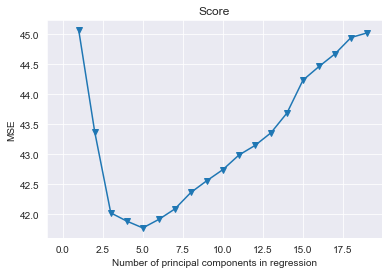

In [123]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [124]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

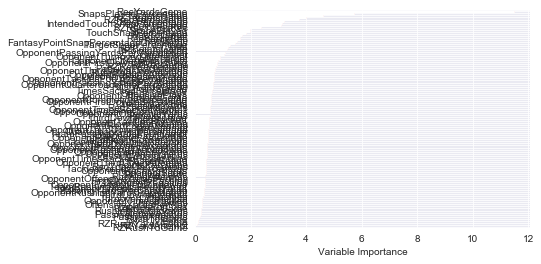

In [125]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [126]:
TE = pd.read_csv('TE/TE.csv')
TE.describe()

,Rank,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.00000,1394.000000,1394.000000
mean,581.432568,8.534433,2.408178,1.551650,43.514491,17.188666,0.138451,9.322095,4.854591,6.565997,0.012195,0.037303,0.034792,0.001435,0.020086,0.01363,4.142970,4.142970
std,276.305869,4.720839,2.766680,1.960262,40.847887,24.670686,0.381066,11.374345,6.484668,7.784817,0.116150,0.654138,0.633795,0.037864,0.140345,0.11599,5.761635,5.761635
min,1.000000,1.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,-3.000000,-3.000000,-3.000000,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.00000,-0.200000,-0.200000
25%,349.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,679.000000,9.000000,1.000000,1.000000,50.000000,7.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.900000,1.900000
75%,829.000000,13.000000,4.000000,2.000000,80.000000,26.000000,0.000000,15.000000,7.700000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.100000,6.100000
max,1394.000000,16.000000,14.000000,12.000000,100.000000,175.000000,3.000000,88.000000,64.000000,64.000000,2.000000,14.000000,14.000000,1.000000,1.000000,1.00000,33.100000,33.100000


In [127]:
TE = TE.set_index(['Name', 'Team'])
TE.head()

,,Rank,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,,,
Jack Doyle,IND,1,TE,8,CIN,14,12,85.7,121,1,17,8.6,10.1,0,0,0.0,0,0,0,33.1,33.1
Rob Gronkowski,NE,2,TE,15,PIT,13,9,69.2,168,0,31,12.9,18.7,0,0,0.0,0,0,0,30.8,30.8
Greg Olsen,CAR,3,TE,15,GB,12,9,75.0,116,1,30,9.7,12.9,0,0,0.0,0,0,0,29.6,29.6
Travis Kelce,KC,4,TE,8,DEN,10,7,70.0,133,1,33,13.3,19.0,0,0,0.0,0,0,0,29.3,29.3
Zach Ertz,PHI,4,TE,12,CHI,12,10,83.3,103,1,22,8.6,10.3,0,0,0.0,0,0,0,29.3,29.3


In [128]:
TEscore = pd.DataFrame()
TEscore = TE.query('Week == 2')
TE2 = TE[TE.Week < 2]
TE2 = TE2.groupby(['Name', 'Team']).mean()
TE2 = TE2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw2 = pd.DataFrame()
TEw2['Opponent'] = TEscore.Opponent
TEw2['Score'] = TEscore.FantasyPointsDraftKings
TEw2['Week'] = TEscore.Week
TEw2 = TEw2.join(TE2)
TEw2 = TEw2.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 3')
TE3 = TE[TE.Week < 3]
TE3 = TE3.groupby(['Name', 'Team']).mean()
TE3 = TE3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw3 = pd.DataFrame()
TEw3['Opponent'] = TEscore.Opponent
TEw3['Score'] = TEscore.FantasyPointsDraftKings
TEw3['Week'] = TEscore.Week
TEw3 = TEw3.join(TE3)
TEw3 = TEw3.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 4')
TE4 = TE[TE.Week < 4]
TE4 = TE4.groupby(['Name', 'Team']).mean()
TE4 = TE4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw4 = pd.DataFrame()
TEw4['Opponent'] = TEscore.Opponent
TEw4['Score'] = TEscore.FantasyPointsDraftKings
TEw4['Week'] = TEscore.Week
TEw4 = TEw4.join(TE4)
TEw4 = TEw4.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 5')
TE5 = TE[TE.Week < 5]
TE5 = TE5.groupby(['Name', 'Team']).mean()
TE5 = TE5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw5 = pd.DataFrame()
TEw5['Opponent'] = TEscore.Opponent
TEw5['Score'] = TEscore.FantasyPointsDraftKings
TEw5['Week'] = TEscore.Week
TEw5 = TEw5.join(TE5)
TEw5 = TEw5.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 6')
TE6 = TE[TE.Week < 6]
TE6 = TE6.groupby(['Name', 'Team']).mean()
TE6 = TE6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw6 = pd.DataFrame()
TEw6['Opponent'] = TEscore.Opponent
TEw6['Score'] = TEscore.FantasyPointsDraftKings
TEw6['Week'] = TEscore.Week
TEw6 = TEw6.join(TE6)
TEw6 = TEw6.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 7')
TE7 = TE[TE.Week < 7]
TE7 = TE7.groupby(['Name', 'Team']).mean()
TE7 = TE7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw7 = pd.DataFrame()
TEw7['Opponent'] = TEscore.Opponent
TEw7['Score'] = TEscore.FantasyPointsDraftKings
TEw7['Week'] = TEscore.Week
TEw7 = TEw7.join(TE7)
TEw7 = TEw7.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 8')
TE8 = TE[TE.Week < 8]
TE8 = TE8.groupby(['Name', 'Team']).mean()
TE8 = TE8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw8 = pd.DataFrame()
TEw8['Opponent'] = TEscore.Opponent
TEw8['Score'] = TEscore.FantasyPointsDraftKings
TEw8['Week'] = TEscore.Week
TEw8 = TEw8.join(TE8)
TEw8 = TEw8.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 9')
TE9 = TE[TE.Week < 9]
TE9 = TE9.groupby(['Name', 'Team']).mean()
TE9 = TE9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw9 = pd.DataFrame()
TEw9['Opponent'] = TEscore.Opponent
TEw9['Score'] = TEscore.FantasyPointsDraftKings
TEw9['Week'] = TEscore.Week
TEw9 = TEw9.join(TE9)
TEw9 = TEw9.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 10')
TE10 = TE[TE.Week < 10]
TE10 = TE10.groupby(['Name', 'Team']).mean()
TE10 = TE10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw10 = pd.DataFrame()
TEw10['Opponent'] = TEscore.Opponent
TEw10['Score'] = TEscore.FantasyPointsDraftKings
TEw10['Week'] = TEscore.Week
TEw10 = TEw10.join(TE10)
TEw10 = TEw10.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 11')
TE11 = TE[TE.Week < 11]
TE11 = TE11.groupby(['Name', 'Team']).mean()
TE11 = TE11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw11 = pd.DataFrame()
TEw11['Opponent'] = TEscore.Opponent
TEw11['Score'] = TEscore.FantasyPointsDraftKings
TEw11['Week'] = TEscore.Week
TEw11 = TEw11.join(TE11)
TEw11 = TEw11.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 12')
TE12 = TE[TE.Week < 12]
TE12 = TE12.groupby(['Name', 'Team']).mean()
TE12 = TE12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw12 = pd.DataFrame()
TEw12['Opponent'] = TEscore.Opponent
TEw12['Score'] = TEscore.FantasyPointsDraftKings
TEw12['Week'] = TEscore.Week
TEw12 = TEw12.join(TE12)
TEw12 = TEw12.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 13')
TE13 = TE[TE.Week < 13]
TE13 = TE13.groupby(['Name', 'Team']).mean()
TE13 = TE13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw13 = pd.DataFrame()
TEw13['Opponent'] = TEscore.Opponent
TEw13['Score'] = TEscore.FantasyPointsDraftKings
TEw13['Week'] = TEscore.Week
TEw13 = TEw13.join(TE13)
TEw13 = TEw13.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 14')
TE14 = TE[TE.Week < 14]
TE14 = TE14.groupby(['Name', 'Team']).mean()
TE14 = TE14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw14 = pd.DataFrame()
TEw14['Opponent'] = TEscore.Opponent
TEw14['Score'] = TEscore.FantasyPointsDraftKings
TEw14['Week'] = TEscore.Week
TEw14 = TEw14.join(TE14)
TEw14 = TEw14.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 15')
TE15 = TE[TE.Week < 15]
TE15 = TE15.groupby(['Name', 'Team']).mean()
TE15 = TE15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw15 = pd.DataFrame()
TEw15['Opponent'] = TEscore.Opponent
TEw15['Score'] = TEscore.FantasyPointsDraftKings
TEw15['Week'] = TEscore.Week
TEw15 = TEw15.join(TE15)
TEw15 = TEw15.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 16')
TE16 = TE[TE.Week < 16]
TE16 = TE16.groupby(['Name', 'Team']).mean()
TE16 = TE16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw16 = pd.DataFrame()
TEw16['Opponent'] = TEscore.Opponent
TEw16['Score'] = TEscore.FantasyPointsDraftKings
TEw16['Week'] = TEscore.Week
TEw16 = TEw16.join(TE16)
TEw16 = TEw16.reset_index()

In [129]:
TEws = TEw2.append(TEw3, ignore_index=True, sort=False).append(TEw4, ignore_index=True, sort=False)\
.append(TEw5, ignore_index=True, sort=False).append(TEw6, ignore_index=True, sort=False)\
.append(TEw7, ignore_index=True, sort=False).append(TEw8, ignore_index=True, sort=False)\
.append(TEw9, ignore_index=True, sort=False).append(TEw10, ignore_index=True, sort=False)\
.append(TEw11, ignore_index=True, sort=False)\
.append(TEw12, ignore_index=True, sort=False).append(TEw13, ignore_index=True, sort=False)\
.append(TEw14, ignore_index=True, sort=False).append(TEw15, ignore_index=True, sort=False)\
.append(TEw16, ignore_index=True, sort=False)
TEws = TEws.dropna().drop_duplicates()
TEws.describe()

,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,4.268641,9.068720,2.337543,1.544384,43.081043,17.297548,0.131074,9.518036,5.042202,6.624085,0.011557,0.025565,0.025368,0.001835,0.019267,0.011502,4.102185
std,5.838162,4.398259,2.296920,1.606574,27.286443,18.450514,0.199131,8.398510,4.441374,5.422692,0.058023,0.201904,0.201211,0.021354,0.057061,0.042991,4.302312
min,-0.200000,2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-0.800000,-0.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.500000,0.275974,21.805556,2.666667,0.000000,2.500000,1.982222,2.203571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.689286
50%,1.900000,9.000000,1.400000,1.000000,47.617857,10.225000,0.000000,8.285714,4.961250,6.462500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.441667
75%,6.475000,13.000000,3.851190,2.428571,65.673864,27.979167,0.200000,15.000000,7.143466,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.705208
max,33.100000,16.000000,11.000000,8.500000,100.000000,128.000000,2.000000,88.000000,64.000000,64.000000,1.000000,4.000000,4.000000,0.500000,0.500000,0.400000,23.800000


In [130]:
TEavg = pd.DataFrame()
TEavg['Name'] = TEws['Name']
TEavg['Week'] = TEws['Week']
TEavg['Team'] = TEws['Team']
TEavg['Opponent'] = TEws['Opponent']
TEavg['TargetsGame'] = TEws['ReceivingTargets']
TEavg['RecGame'] = TEws['Receptions']
TEavg['RecPercentage'] = TEws['ReceptionPercentage']
TEavg['RecYardsGame'] = TEws['ReceivingYards']
TEavg['RecTdGame'] = TEws['ReceivingTouchdowns']
TEavg['YardsTarget'] = TEws['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TEws['ReceivingYardsPerReception']
TEavg['RushesGame'] = TEws['RushingAttempts']
TEavg['RushYardsGame'] = TEws['RushingYards']
TEavg['YardAttempt'] = TEws['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TEws['RushingTouchdowns']
TEavg['PointsGame'] = TEws['FantasyPointsPerGameDraftKings']
TEavg['Score'] = TEws['Score']

In [131]:
TERZ = pd.read_csv('TE/TERZ.csv')
TERZ.head()

,Rank,Name,Team,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,...,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Jimmy Graham,SEA,TE,8,HOU,4,3,75.0,28,...,7.0,9.3,0,0,0,0,0,0,17.8,17.8
1,2,Trey Burton,PHI,TE,14,LAR,2,2,100.0,31,...,15.5,15.5,0,0,0,0,0,0,17.1,17.1
2,3,Darren Fells,DET,TE,5,CAR,2,2,100.0,24,...,12.0,12.0,0,0,0,0,0,0,16.4,16.4
3,3,Jimmy Graham,SEA,TE,10,ARI,4,3,75.0,14,...,3.5,4.7,0,0,0,0,0,0,16.4,16.4
4,5,Marcedes Lewis,JAX,TE,3,BAL,3,2,66.7,21,...,7.0,10.5,0,0,0,0,0,0,16.1,16.1


In [132]:
TERZ = TERZ.set_index(['Name', 'Team'])
TERZ.head()

,,Rank,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,,,
Jimmy Graham,SEA,1,TE,8,HOU,4,3,75.0,28,2,18.0,7.0,9.3,0,0,0,0,0,0,17.8,17.8
Trey Burton,PHI,2,TE,14,LAR,2,2,100.0,31,2,20.0,15.5,15.5,0,0,0,0,0,0,17.1,17.1
Darren Fells,DET,3,TE,5,CAR,2,2,100.0,24,2,20.0,12.0,12.0,0,0,0,0,0,0,16.4,16.4
Jimmy Graham,SEA,3,TE,10,ARI,4,3,75.0,14,2,6.0,3.5,4.7,0,0,0,0,0,0,16.4,16.4
Marcedes Lewis,JAX,5,TE,3,BAL,3,2,66.7,21,2,17.0,7.0,10.5,0,0,0,0,0,0,16.1,16.1


In [133]:
TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 2')
TERZ2 = TERZ[TERZ.Week < 2]
TERZ2 = TERZ2.groupby(['Name', 'Team']).mean()
TERZ2 = TERZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw2 = pd.DataFrame()
TERZw2['Opponent'] = TERZscore.Opponent
TERZw2['Score'] = TERZscore.FantasyPointsDraftKings
TERZw2['Week'] = TERZscore.Week
TERZw2 = TERZw2.join(TERZ2)
TERZw2 = TERZw2.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 3')
TERZ3 = TERZ[TERZ.Week < 3]
TERZ3 = TERZ3.groupby(['Name', 'Team']).mean()
TERZ3 = TERZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw3 = pd.DataFrame()
TERZw3['Opponent'] = TERZscore.Opponent
TERZw3['Score'] = TERZscore.FantasyPointsDraftKings
TERZw3['Week'] = TERZscore.Week
TERZw3 = TERZw3.join(TERZ3)
TERZw3 = TERZw3.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 4')
TERZ4 = TERZ[TERZ.Week < 4]
TERZ4 = TERZ4.groupby(['Name', 'Team']).mean()
TERZ4 = TERZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw4 = pd.DataFrame()
TERZw4['Opponent'] = TERZscore.Opponent
TERZw4['Score'] = TERZscore.FantasyPointsDraftKings
TERZw4['Week'] = TERZscore.Week
TERZw4 = TERZw4.join(TERZ4)
TERZw4 = TERZw4.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 5')
TERZ5 = TERZ[TERZ.Week < 5]
TERZ5 = TERZ5.groupby(['Name', 'Team']).mean()
TERZ5 = TERZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw5 = pd.DataFrame()
TERZw5['Opponent'] = TERZscore.Opponent
TERZw5['Score'] = TERZscore.FantasyPointsDraftKings
TERZw5['Week'] = TERZscore.Week
TERZw5 = TERZw5.join(TERZ5)
TERZw5 = TERZw5.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 6')
TERZ6 = TERZ[TERZ.Week < 6]
TERZ6 = TERZ6.groupby(['Name', 'Team']).mean()
TERZ6 = TERZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw6 = pd.DataFrame()
TERZw6['Opponent'] = TERZscore.Opponent
TERZw6['Score'] = TERZscore.FantasyPointsDraftKings
TERZw6['Week'] = TERZscore.Week
TERZw6 = TERZw6.join(TERZ6)
TERZw6 = TERZw6.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 7')
TERZ7 = TERZ[TERZ.Week < 7]
TERZ7 = TERZ7.groupby(['Name', 'Team']).mean()
TERZ7 = TERZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw7 = pd.DataFrame()
TERZw7['Opponent'] = TERZscore.Opponent
TERZw7['Score'] = TERZscore.FantasyPointsDraftKings
TERZw7['Week'] = TERZscore.Week
TERZw7 = TERZw7.join(TERZ7)
TERZw7 = TERZw7.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 8')
TERZ8 = TERZ[TERZ.Week < 8]
TERZ8 = TERZ8.groupby(['Name', 'Team']).mean()
TERZ8 = TERZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw8 = pd.DataFrame()
TERZw8['Opponent'] = TERZscore.Opponent
TERZw8['Score'] = TERZscore.FantasyPointsDraftKings
TERZw8['Week'] = TERZscore.Week
TERZw8 = TERZw8.join(TERZ8)
TERZw8 = TERZw8.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 9')
TERZ9 = TERZ[TERZ.Week < 9]
TERZ9 = TERZ9.groupby(['Name', 'Team']).mean()
TERZ9 = TERZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw9 = pd.DataFrame()
TERZw9['Opponent'] = TERZscore.Opponent
TERZw9['Score'] = TERZscore.FantasyPointsDraftKings
TERZw9['Week'] = TERZscore.Week
TERZw9 = TERZw9.join(TERZ9)
TERZw9 = TERZw9.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 10')
TERZ10 = TERZ[TERZ.Week < 10]
TERZ10 = TERZ10.groupby(['Name', 'Team']).mean()
TERZ10 = TERZ10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw10 = pd.DataFrame()
TERZw10['Opponent'] = TERZscore.Opponent
TERZw10['Score'] = TERZscore.FantasyPointsDraftKings
TERZw10['Week'] = TERZscore.Week
TERZw10 = TERZw10.join(TERZ10)
TERZw10 = TERZw10.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 11')
TERZ11 = TERZ[TERZ.Week < 11]
TERZ11 = TERZ11.groupby(['Name', 'Team']).mean()
TERZ11 = TERZ11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw11 = pd.DataFrame()
TERZw11['Opponent'] = TERZscore.Opponent
TERZw11['Score'] = TERZscore.FantasyPointsDraftKings
TERZw11['Week'] = TERZscore.Week
TERZw11 = TERZw11.join(TERZ11)
TERZw11 = TERZw11.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 12')
TERZ12 = TERZ[TERZ.Week < 12]
TERZ12 = TERZ12.groupby(['Name', 'Team']).mean()
TERZ12 = TERZ12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw12 = pd.DataFrame()
TERZw12['Opponent'] = TERZscore.Opponent
TERZw12['Score'] = TERZscore.FantasyPointsDraftKings
TERZw12['Week'] = TERZscore.Week
TERZw12 = TERZw12.join(TERZ12)
TERZw12 = TERZw12.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 13')
TERZ13 = TERZ[TERZ.Week < 13]
TERZ13 = TERZ13.groupby(['Name', 'Team']).mean()
TERZ13 = TERZ13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw13 = pd.DataFrame()
TERZw13['Opponent'] = TERZscore.Opponent
TERZw13['Score'] = TERZscore.FantasyPointsDraftKings
TERZw13['Week'] = TERZscore.Week
TERZw13 = TERZw13.join(TERZ13)
TERZw13 = TERZw13.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 14')
TERZ14 = TERZ[TERZ.Week < 14]
TERZ14 = TERZ14.groupby(['Name', 'Team']).mean()
TERZ14 = TERZ14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw14 = pd.DataFrame()
TERZw14['Opponent'] = TERZscore.Opponent
TERZw14['Score'] = TERZscore.FantasyPointsDraftKings
TERZw14['Week'] = TERZscore.Week
TERZw14 = TERZw14.join(TERZ14)
TERZw14 = TERZw14.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 15')
TERZ15 = TERZ[TERZ.Week < 15]
TERZ15 = TERZ15.groupby(['Name', 'Team']).mean()
TERZ15 = TERZ15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw15 = pd.DataFrame()
TERZw15['Opponent'] = TERZscore.Opponent
TERZw15['Score'] = TERZscore.FantasyPointsDraftKings
TERZw15['Week'] = TERZscore.Week
TERZw15 = TERZw15.join(TERZ15)
TERZw15 = TERZw15.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 16')
TERZ16 = TERZ[TERZ.Week < 16]
TERZ16 = TERZ16.groupby(['Name', 'Team']).mean()
TERZ16 = TERZ16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw16 = pd.DataFrame()
TERZw16['Opponent'] = TERZscore.Opponent
TERZw16['Score'] = TERZscore.FantasyPointsDraftKings
TERZw16['Week'] = TERZscore.Week
TERZw16 = TERZw16.join(TERZ16)
TERZw16 = TERZw16.reset_index()

In [134]:
TERZws = TERZw2.append(TERZw3, ignore_index=True, sort=False).append(TERZw4, ignore_index=True, sort=False)\
.append(TERZw5, ignore_index=True, sort=False).append(TERZw6, ignore_index=True, sort=False)\
.append(TERZw7, ignore_index=True, sort=False).append(TERZw8, ignore_index=True, sort=False)\
.append(TERZw9, ignore_index=True, sort=False).append(TERZw10, ignore_index=True, sort=False)\
.append(TERZw11, ignore_index=True, sort=False)\
.append(TERZw12, ignore_index=True, sort=False).append(TERZw13, ignore_index=True, sort=False)\
.append(TERZw14, ignore_index=True, sort=False).append(TERZw15, ignore_index=True, sort=False)\
.append(TERZw16, ignore_index=True, sort=False)
TERZws = TERZws.dropna().drop_duplicates()
TERZws.describe()

,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.281273,10.064871,0.558556,0.302091,21.614839,2.164746,0.158137,4.455462,1.575881,1.777264,0.005189,-0.002048,-0.002048,0.002756,0.002208,0.002208,1.487266
std,2.978309,4.054404,0.453511,0.305551,19.040909,2.640894,0.195002,4.226253,1.732904,1.986581,0.035572,0.035890,0.035890,0.026425,0.017449,0.017449,1.617553
min,-0.300000,2.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-1.000000,-2.000000,-4.000000,0.000000,-0.333333,-0.333333,0.000000,0.000000,0.000000,-0.020000
25%,0.000000,7.000000,0.200000,0.090909,7.692308,0.181818,0.000000,1.000000,0.125000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000
50%,0.000000,10.000000,0.500000,0.230769,16.675000,1.400000,0.100000,3.500000,1.142857,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.027273
75%,0.000000,14.000000,0.800000,0.428571,33.333333,3.200000,0.230769,7.000000,2.545455,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.061538
max,17.800000,16.000000,3.000000,3.000000,100.000000,25.000000,2.000000,20.000000,13.000000,13.000000,0.500000,0.500000,0.500000,0.500000,0.250000,0.250000,14.600000


In [135]:
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZws['Name']
TERZavg['Week'] = TERZws['Week'] 
TERZavg['RZTargetsGame'] = TERZws['ReceivingTargets']
TERZavg['RZRecGame'] = TERZws['Receptions']
TERZavg['RZRecPercentage'] = TERZws['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZws['ReceivingYards']
TERZavg['RZRecTdGame'] = TERZws['ReceivingTouchdowns']
TERZavg['RZYardsTarget'] = TERZws['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZws['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZws['RushingAttempts']
TERZavg['RZRushYardsGame'] = TERZws['RushingYards']
TERZavg['RZYardAttempt'] = TERZws['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZws['RushingTouchdowns']
TERZavg['RZPointsGame'] = TERZws['FantasyPointsPerGameDraftKings']

In [136]:
TEsnaps = pd.read_csv('TE/TEsnaps.csv')

TEsnaps = TEsnaps.set_index(['Name', 'Team'])

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 2')
TEsnaps2 = TEsnaps[TEsnaps.Week < 2]
TEsnaps2 = TEsnaps2.groupby(['Name', 'Team']).mean()
TEsnaps2 = TEsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw2 = pd.DataFrame()
TEsnapsw2['Opponent'] = TEsnapsscore.Opponent
TEsnapsw2['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw2['Week'] = TEsnapsscore.Week
TEsnapsw2 = TEsnapsw2.join(TEsnaps2)
TEsnapsw2 = TEsnapsw2.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 3')
TEsnaps3 = TEsnaps[TEsnaps.Week < 3]
TEsnaps3 = TEsnaps3.groupby(['Name', 'Team']).mean()
TEsnaps3 = TEsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw3 = pd.DataFrame()
TEsnapsw3['Opponent'] = TEsnapsscore.Opponent
TEsnapsw3['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw3['Week'] = TEsnapsscore.Week
TEsnapsw3 = TEsnapsw3.join(TEsnaps3)
TEsnapsw3 = TEsnapsw3.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 4')
TEsnaps4 = TEsnaps[TEsnaps.Week < 4]
TEsnaps4 = TEsnaps4.groupby(['Name', 'Team']).mean()
TEsnaps4 = TEsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw4 = pd.DataFrame()
TEsnapsw4['Opponent'] = TEsnapsscore.Opponent
TEsnapsw4['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw4['Week'] = TEsnapsscore.Week
TEsnapsw4 = TEsnapsw4.join(TEsnaps4)
TEsnapsw4 = TEsnapsw4.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 5')
TEsnaps5 = TEsnaps[TEsnaps.Week < 5]
TEsnaps5 = TEsnaps5.groupby(['Name', 'Team']).mean()
TEsnaps5 = TEsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw5 = pd.DataFrame()
TEsnapsw5['Opponent'] = TEsnapsscore.Opponent
TEsnapsw5['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw5['Week'] = TEsnapsscore.Week
TEsnapsw5 = TEsnapsw5.join(TEsnaps5)
TEsnapsw5 = TEsnapsw5.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 6')
TEsnaps6 = TEsnaps[TEsnaps.Week < 6]
TEsnaps6 = TEsnaps6.groupby(['Name', 'Team']).mean()
TEsnaps6 = TEsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw6 = pd.DataFrame()
TEsnapsw6['Opponent'] = TEsnapsscore.Opponent
TEsnapsw6['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw6['Week'] = TEsnapsscore.Week
TEsnapsw6 = TEsnapsw6.join(TEsnaps6)
TEsnapsw6 = TEsnapsw6.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 7')
TEsnaps7 = TEsnaps[TEsnaps.Week < 7]
TEsnaps7 = TEsnaps7.groupby(['Name', 'Team']).mean()
TEsnaps7 = TEsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw7 = pd.DataFrame()
TEsnapsw7['Opponent'] = TEsnapsscore.Opponent
TEsnapsw7['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw7['Week'] = TEsnapsscore.Week
TEsnapsw7 = TEsnapsw7.join(TEsnaps7)
TEsnapsw7 = TEsnapsw7.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 8')
TEsnaps8 = TEsnaps[TEsnaps.Week < 8]
TEsnaps8 = TEsnaps8.groupby(['Name', 'Team']).mean()
TEsnaps8 = TEsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw8 = pd.DataFrame()
TEsnapsw8['Opponent'] = TEsnapsscore.Opponent
TEsnapsw8['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw8['Week'] = TEsnapsscore.Week
TEsnapsw8 = TEsnapsw8.join(TEsnaps8)
TEsnapsw8 = TEsnapsw8.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 9')
TEsnaps9 = TEsnaps[TEsnaps.Week < 9]
TEsnaps9 = TEsnaps9.groupby(['Name', 'Team']).mean()
TEsnaps9 = TEsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw9 = pd.DataFrame()
TEsnapsw9['Opponent'] = TEsnapsscore.Opponent
TEsnapsw9['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw9['Week'] = TEsnapsscore.Week
TEsnapsw9 = TEsnapsw9.join(TEsnaps9)
TEsnapsw9 = TEsnapsw9.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 10')
TEsnaps10 = TEsnaps[TEsnaps.Week < 10]
TEsnaps10 = TEsnaps10.groupby(['Name', 'Team']).mean()
TEsnaps10 = TEsnaps10.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw10 = pd.DataFrame()
TEsnapsw10['Opponent'] = TEsnapsscore.Opponent
TEsnapsw10['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw10['Week'] = TEsnapsscore.Week
TEsnapsw10 = TEsnapsw10.join(TEsnaps10)
TEsnapsw10 = TEsnapsw10.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 11')
TEsnaps11 = TEsnaps[TEsnaps.Week < 11]
TEsnaps11 = TEsnaps11.groupby(['Name', 'Team']).mean()
TEsnaps11 = TEsnaps11.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw11 = pd.DataFrame()
TEsnapsw11['Opponent'] = TEsnapsscore.Opponent
TEsnapsw11['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw11['Week'] = TEsnapsscore.Week
TEsnapsw11 = TEsnapsw11.join(TEsnaps11)
TEsnapsw11 = TEsnapsw11.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 12')
TEsnaps12 = TEsnaps[TEsnaps.Week < 12]
TEsnaps12 = TEsnaps12.groupby(['Name', 'Team']).mean()
TEsnaps12 = TEsnaps12.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw12 = pd.DataFrame()
TEsnapsw12['Opponent'] = TEsnapsscore.Opponent
TEsnapsw12['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw12['Week'] = TEsnapsscore.Week
TEsnapsw12 = TEsnapsw12.join(TEsnaps12)
TEsnapsw12 = TEsnapsw12.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 13')
TEsnaps13 = TEsnaps[TEsnaps.Week < 13]
TEsnaps13 = TEsnaps13.groupby(['Name', 'Team']).mean()
TEsnaps13 = TEsnaps13.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw13 = pd.DataFrame()
TEsnapsw13['Opponent'] = TEsnapsscore.Opponent
TEsnapsw13['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw13['Week'] = TEsnapsscore.Week
TEsnapsw13 = TEsnapsw13.join(TEsnaps13)
TEsnapsw13 = TEsnapsw13.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 14')
TEsnaps14 = TEsnaps[TEsnaps.Week < 14]
TEsnaps14 = TEsnaps14.groupby(['Name', 'Team']).mean()
TEsnaps14 = TEsnaps14.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw14 = pd.DataFrame()
TEsnapsw14['Opponent'] = TEsnapsscore.Opponent
TEsnapsw14['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw14['Week'] = TEsnapsscore.Week
TEsnapsw14 = TEsnapsw14.join(TEsnaps14)
TEsnapsw14 = TEsnapsw14.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 15')
TEsnaps15 = TEsnaps[TEsnaps.Week < 15]
TEsnaps15 = TEsnaps15.groupby(['Name', 'Team']).mean()
TEsnaps15 = TEsnaps15.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw15 = pd.DataFrame()
TEsnapsw15['Opponent'] = TEsnapsscore.Opponent
TEsnapsw15['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw15['Week'] = TEsnapsscore.Week
TEsnapsw15 = TEsnapsw15.join(TEsnaps15)
TEsnapsw15 = TEsnapsw15.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 16')
TEsnaps16 = TEsnaps[TEsnaps.Week < 16]
TEsnaps16 = TEsnaps16.groupby(['Name', 'Team']).mean()
TEsnaps16 = TEsnaps16.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw16 = pd.DataFrame()
TEsnapsw16['Opponent'] = TEsnapsscore.Opponent
TEsnapsw16['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw16['Week'] = TEsnapsscore.Week
TEsnapsw16 = TEsnapsw16.join(TEsnaps16)
TEsnapsw16 = TEsnapsw16.reset_index()

TEsnapsws = TEsnapsw2.append(TEsnapsw3, ignore_index=True, sort=False).append(TEsnapsw4, ignore_index=True, sort=False)\
.append(TEsnapsw5, ignore_index=True, sort=False).append(TEsnapsw6, ignore_index=True, sort=False)\
.append(TEsnapsw7, ignore_index=True, sort=False).append(TEsnapsw8, ignore_index=True, sort=False)\
.append(TEsnapsw9, ignore_index=True, sort=False).append(TEsnapsw10, ignore_index=True, sort=False)\
.append(TEsnapsw11, ignore_index=True, sort=False)\
.append(TEsnapsw12, ignore_index=True, sort=False).append(TEsnapsw13, ignore_index=True, sort=False)\
.append(TEsnapsw14, ignore_index=True, sort=False).append(TEsnapsw15, ignore_index=True, sort=False)\
.append(TEsnapsw16, ignore_index=True, sort=False)
TEsnapsws = TEsnapsws.dropna().drop_duplicates()
TEsnapsws.describe()

,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,4.268641,9.068720,30.041488,45.317922,0.057043,7.212882,4.675009,7.276477,12.699125
std,5.838162,4.398259,18.041754,27.088503,0.400869,6.623352,5.160389,6.621001,16.570057
min,-0.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,14.833333,22.963750,0.000000,2.966667,1.667857,3.038095,4.090625
50%,1.900000,9.000000,27.846591,41.550000,0.000000,5.944286,3.791987,6.081667,9.812500
75%,6.475000,13.000000,44.912500,68.187500,0.000000,10.328750,6.787500,10.422917,17.427500
max,33.100000,16.000000,78.000000,100.000000,6.250000,100.000000,100.000000,100.000000,280.000000


In [137]:
TEsnaps = TEsnapsws.drop(['Team', 'Opponent', 'Score'], axis=1)

In [138]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
TEd2 = pd.DataFrame()
TEd2['Opponent'] = Defense2['Team']
TEd2['Week'] = 2
TEd2['DPointsAllowed'] = Defense2.DraftKingsTightEndFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
TEd3 = pd.DataFrame()
TEd3['Opponent'] = Defense3['Team']
TEd3['Week'] = 3
TEd3['DPointsAllowed'] = Defense3.DraftKingsTightEndFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
TEd4 = pd.DataFrame()
TEd4['Opponent'] = Defense4['Team']
TEd4['Week'] = 4
TEd4['DPointsAllowed'] = Defense4.DraftKingsTightEndFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
TEd5 = pd.DataFrame()
TEd5['Opponent'] = Defense5['Team']
TEd5['Week'] = 5
TEd5['DPointsAllowed'] = Defense5.DraftKingsTightEndFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
TEd6 = pd.DataFrame()
TEd6['Opponent'] = Defense6['Team']
TEd6['Week'] = 6
TEd6['DPointsAllowed'] = Defense6.DraftKingsTightEndFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
TEd7 = pd.DataFrame()
TEd7['Opponent'] = Defense7['Team']
TEd7['Week'] = 7
TEd7['DPointsAllowed'] = Defense7.DraftKingsTightEndFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
TEd8 = pd.DataFrame()
TEd8['Opponent'] = Defense8['Team']
TEd8['Week'] = 8
TEd8['DPointsAllowed'] = Defense8.DraftKingsTightEndFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
TEd9 = pd.DataFrame()
TEd9['Opponent'] = Defense9['Team']
TEd9['Week'] = 9
TEd9['DPointsAllowed'] = Defense9.DraftKingsTightEndFantasyPointsAllowedAverage

Defense10 = Defense[Defense.Week < 10]
Defense10 = Defense10.groupby('Team').mean()
Defense10 = Defense10.drop('Week', axis = 1)
Defense10 = Defense10.reset_index()
TEd10 = pd.DataFrame()
TEd10['Opponent'] = Defense10['Team']
TEd10['Week'] = 10
TEd10['DPointsAllowed'] = Defense10.DraftKingsTightEndFantasyPointsAllowedAverage

Defense11 = Defense[Defense.Week < 11]
Defense11 = Defense11.groupby('Team').mean()
Defense11 = Defense11.drop('Week', axis = 1)
Defense11 = Defense11.reset_index()
TEd11 = pd.DataFrame()
TEd11['Opponent'] = Defense11['Team']
TEd11['Week'] = 11
TEd11['DPointsAllowed'] = Defense11.DraftKingsTightEndFantasyPointsAllowedAverage

Defense12 = Defense[Defense.Week < 12]
Defense12 = Defense12.groupby('Team').mean()
Defense12 = Defense12.drop('Week', axis = 1)
Defense12 = Defense12.reset_index()
TEd12 = pd.DataFrame()
TEd12['Opponent'] = Defense12['Team']
TEd12['Week'] = 12
TEd12['DPointsAllowed'] = Defense12.DraftKingsTightEndFantasyPointsAllowedAverage

Defense13 = Defense[Defense.Week < 13]
Defense13 = Defense13.groupby('Team').mean()
Defense13 = Defense13.drop('Week', axis = 1)
Defense13 = Defense13.reset_index()
TEd13 = pd.DataFrame()
TEd13['Opponent'] = Defense13['Team']
TEd13['Week'] = 13
TEd13['DPointsAllowed'] = Defense13.DraftKingsTightEndFantasyPointsAllowedAverage

Defense14 = Defense[Defense.Week < 14]
Defense14 = Defense14.groupby('Team').mean()
Defense14 = Defense14.drop('Week', axis = 1)
Defense14 = Defense14.reset_index()
TEd14 = pd.DataFrame()
TEd14['Opponent'] = Defense14['Team']
TEd14['Week'] = 14
TEd14['DPointsAllowed'] = Defense14.DraftKingsTightEndFantasyPointsAllowedAverage

Defense15 = Defense[Defense.Week < 15]
Defense15 = Defense15.groupby('Team').mean()
Defense15 = Defense15.drop('Week', axis = 1)
Defense15 = Defense15.reset_index()
TEd15 = pd.DataFrame()
TEd15['Opponent'] = Defense15['Team']
TEd15['Week'] = 15
TEd15['DPointsAllowed'] = Defense15.DraftKingsTightEndFantasyPointsAllowedAverage

Defense16 = Defense[Defense.Week < 16]
Defense16 = Defense16.groupby('Team').mean()
Defense16 = Defense16.drop('Week', axis = 1)
Defense16 = Defense16.reset_index()
TEd16 = pd.DataFrame()
TEd16['Opponent'] = Defense16['Team']
TEd16['Week'] = 16
TEd16['DPointsAllowed'] = Defense16.DraftKingsTightEndFantasyPointsAllowedAverage

In [139]:
TEds = TEd2.append(TEd3, ignore_index=True, sort=False).append(TEd4, ignore_index=True, sort=False)\
.append(TEd5, ignore_index=True, sort=False).append(TEd6, ignore_index=True, sort=False)\
.append(TEd7, ignore_index=True, sort=False).append(TEd8, ignore_index=True, sort=False)\
.append(TEd9, ignore_index=True, sort=False).append(TEd10, ignore_index=True, sort=False)\
.append(TEd11, ignore_index=True, sort=False)\
.append(TEd12, ignore_index=True, sort=False).append(TEd13, ignore_index=True, sort=False)\
.append(TEd14, ignore_index=True, sort=False).append(TEd15, ignore_index=True, sort=False)\
.append(TEd16, ignore_index=True, sort=False)


In [140]:
TEavg = TEavg.set_index(['Name', 'Week'])
TERZavg = TERZavg.set_index(['Name', 'Week'])
TEs = TEavg.join(TERZavg, lsuffix='avg', rsuffix='rzavg')
TEs = TEs.drop_duplicates().dropna()
TEs.describe()


,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,3.195601,2.112067,52.694162,23.139943,0.196198,5.907801,7.978613,0.016745,0.036221,0.036221,...,21.614839,2.164746,0.158137,1.575881,1.777264,0.005189,-0.002048,-0.002048,0.002756,1.487266
std,2.300350,1.624491,21.429057,18.456254,0.215114,3.332920,4.316614,0.070366,0.247443,0.247443,...,19.040909,2.640894,0.195002,1.732904,1.986581,0.035572,0.035890,0.035890,0.026425,1.617553
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-0.800000,...,0.000000,-4.000000,0.000000,-2.000000,-4.000000,0.000000,-0.333333,-0.333333,0.000000,-0.020000
25%,1.142857,0.750000,37.500000,7.307692,0.000000,4.130000,5.000000,0.000000,0.000000,0.000000,...,7.692308,0.181818,0.000000,0.125000,0.181818,0.000000,0.000000,0.000000,0.000000,0.350000
50%,2.800000,1.800000,55.664286,20.384615,0.142857,5.780000,8.125000,0.000000,0.000000,0.000000,...,16.675000,1.400000,0.100000,1.142857,1.250000,0.000000,0.000000,0.000000,0.000000,1.027273
75%,4.636364,3.200000,68.611111,34.600000,0.300000,7.516667,10.800000,0.000000,0.000000,0.000000,...,33.333333,3.200000,0.230769,2.545455,2.666667,0.000000,0.000000,0.000000,0.000000,2.061538
max,11.000000,8.500000,100.000000,95.000000,2.000000,33.750000,33.750000,1.000000,4.000000,4.000000,...,100.000000,25.000000,2.000000,13.000000,13.000000,0.500000,0.500000,0.500000,0.500000,14.600000


In [141]:
TEs = TEs.reset_index()

In [142]:
TEsnaps = TEsnaps.set_index(['Name', 'Week'])
TEs = TEs.set_index(['Name', 'Week'])
TEs = TEs.join(TEsnaps, lsuffix='avg', rsuffix='rzavg')
TEs = TEs.drop_duplicates().dropna()
TEs.describe()


,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,3.195601,2.112067,52.694162,23.139943,0.196198,5.907801,7.978613,0.016745,0.036221,0.036221,...,-0.002048,0.002756,1.487266,36.191016,54.477660,0.045404,8.401523,5.389887,8.447551,14.682340
std,2.300350,1.624491,21.429057,18.456254,0.215114,3.332920,4.316614,0.070366,0.247443,0.247443,...,0.035890,0.026425,1.617553,15.931880,23.969489,0.179378,5.155778,3.185750,5.172037,9.751988
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-0.800000,...,-0.333333,0.000000,-0.020000,3.000000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.142857,0.750000,37.500000,7.307692,0.000000,4.130000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.350000,23.888889,34.228571,0.000000,4.950000,2.900000,4.964286,7.923077
50%,2.800000,1.800000,55.664286,20.384615,0.142857,5.780000,8.125000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.027273,35.600000,53.071429,0.000000,7.633333,4.891667,7.633333,13.675000
75%,4.636364,3.200000,68.611111,34.600000,0.300000,7.516667,10.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.061538,47.857143,75.436364,0.000000,11.600000,7.550000,11.633333,19.733333
max,11.000000,8.500000,100.000000,95.000000,2.000000,33.750000,33.750000,1.000000,4.000000,4.000000,...,0.500000,0.500000,14.600000,78.000000,100.000000,1.800000,54.166667,16.950000,54.166667,89.050000


In [143]:
TEs = TEs.reset_index()

In [144]:
TEtest = TEs.set_index(['Week', 'Opponent'])
TEdtest = TEds.set_index(['Week', 'Opponent'])
TEho = TEtest.join(TEdtest, lsuffix='norm', rsuffix='d')
TEho = TEho.reset_index()
TEhope = TEho.dropna().drop_duplicates()
TEhope.describe()


,Week,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,...,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DPointsAllowed
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,10.074755,3.192164,2.109754,52.676998,23.120507,0.196439,5.907075,7.976381,0.016766,0.036266,...,0.002759,1.486515,36.186348,54.471260,0.045459,8.393437,5.384238,8.439521,14.676068,12.187815
std,4.047030,2.299662,1.624139,21.436579,18.459205,0.215136,3.334899,4.318790,0.070407,0.247592,...,0.026441,1.618403,15.941093,23.983492,0.179481,5.153754,3.183606,5.170111,9.756320,3.143044
min,2.000000,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,...,0.000000,-0.020000,3.000000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000
25%,7.000000,1.142857,0.744318,37.500000,7.280769,0.000000,4.122500,5.000000,0.000000,0.000000,...,0.000000,0.350000,23.880952,34.201429,0.000000,4.933333,2.900000,4.960714,7.922308,10.323077
50%,10.000000,2.775000,1.788889,55.615476,20.358974,0.142857,5.770000,8.120192,0.000000,0.000000,...,0.000000,1.024351,35.585714,53.060714,0.000000,7.630952,4.879167,7.630952,13.606250,11.759341
75%,14.000000,4.627841,3.186364,68.620833,34.587500,0.300000,7.520833,10.800000,0.000000,0.000000,...,0.000000,2.060385,47.892857,75.439773,0.000000,11.600000,7.547115,11.629762,19.686905,13.777137
max,16.000000,11.000000,8.500000,100.000000,95.000000,2.000000,33.750000,33.750000,1.000000,4.000000,...,0.500000,14.600000,78.000000,100.000000,1.800000,54.166667,16.950000,54.166667,89.050000,22.225000


In [145]:
TEhope1 = TEhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
TEfi = TEhope1.join(Vegashope)

In [146]:
TEs = TEfi.reset_index()

In [147]:
TEs = TEs.set_index('Team')
TEs = TEs.join(Offense)
TEs.columns

Index(['Week', 'Opponent', 'Name', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'SnapsPlayed', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'FantasyPointSnapPercentageDraftKings',
       'DPointsAllowed', 'Home', 'PointSpread', 'OverUnder', 'total',
       'PointsPerGame', 'OffensivePlays', 'OffensiveYards',
       'OffensiveYardsPerPlay', 'FirstDowns', 'ThirdDownConversions',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneConversions',
       'RedZoneAttempts', 'RedZonePercentage', 'Penalties', 'PenaltyYar

In [148]:
TEs = TEs.reset_index()

In [149]:
TEs = TEs.set_index('Opponent')
TEs = TEs.join(Def)
TEs = TEs.reset_index()

In [150]:
TEs = TEs.drop(['Opponent', 'Team', 'Week'], axis=1)

In [151]:
TEtrain = TEs.dropna().drop_duplicates()
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPassingInterceptions,OpponentFirstDownsByPassing,OpponentTimesSackedYards,OpponentTimesSackedYards.1
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,3.192164,2.109754,52.676998,23.120507,0.196439,5.907075,7.976381,0.016766,0.036266,0.036266,...,34.131434,62.050613,224.211703,6.567525,10.595956,1.447687,0.846354,11.530867,244.191176,244.191176
std,2.299662,1.624139,21.436579,18.459205,0.215136,3.334899,4.318790,0.070407,0.247592,0.247592,...,1.765322,3.350015,19.512104,0.579982,0.779568,0.297221,0.263938,1.085741,63.426961,63.426961
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-0.800000,...,30.687500,56.800000,169.875000,5.300000,9.200000,0.812500,0.312500,8.937500,137.000000,137.000000
25%,1.142857,0.744318,37.500000,7.280769,0.000000,4.122500,5.000000,0.000000,0.000000,0.000000,...,32.812500,59.000000,211.187500,6.100000,10.000000,1.250000,0.625000,10.953125,179.000000,179.000000
50%,2.775000,1.788889,55.615476,20.358974,0.142857,5.770000,8.120192,0.000000,0.000000,0.000000,...,34.625000,61.900000,225.187500,6.400000,10.600000,1.437500,0.812500,11.687500,255.000000,255.000000
75%,4.627841,3.186364,68.620833,34.587500,0.300000,7.520833,10.800000,0.000000,0.000000,0.000000,...,35.062500,64.200000,237.437500,6.900000,11.000000,1.687500,1.125000,12.312500,280.000000,280.000000
max,11.000000,8.500000,100.000000,95.000000,2.000000,33.750000,33.750000,1.000000,4.000000,4.000000,...,37.812500,68.600000,260.562500,7.700000,12.300000,2.000000,1.375000,14.437500,393.000000,393.000000


In [152]:
TEtrain.to_csv('2015TE.csv')

In [153]:
X_train = TEtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = TEtrain.Score

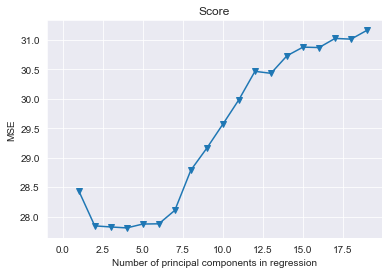

In [154]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [155]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

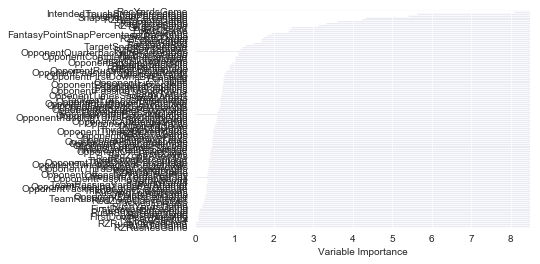

In [156]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None